Libraries

In [1]:
!pip install wordcloud

from collections import Counter
from wordcloud import WordCloud
from scipy import stats
from itertools import combinations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
from collections import defaultdict


Data formatted

In [2]:
data = pd.read_csv('data.csv')

questions = [
    "ChatGPT helps me find accurate information and answers to academic queries." ,
    "ChatGPT enhances my academic performance.",
    "ChatGPT is time-saving when it comes to academic work.",
    "I trust ChatGPT as a reliable tool to generate code for programming tasks.",
    "ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, objects and classes).",
    "ChatGPT helps me debug code and fix mistakes in programming tasks.",
    "ChatGPT is overall a useful tool for academic work.",
    "I believe ChatGPT's reliability and accuracy are equivalent to search engines' (e.g., Google Search, Mozilla Firefox).",
    "ChatGPT is fun to use in my academic work.",
    "ChatGPT helps me come up with creative ideas for my academic work.",
    "Learning how to write ChatGPT prompts to get reliable answers is easy.",
    "I have access to adequate resources (e.g., internet, devices) to use ChatGPT effectively.",
    "Teachers and other teaching staff believe I should use ChatGPT for academic purposes.",
    "My peers believe I should use ChatGPT for academic purposes.",
    "I feel comfortable telling others that I am using ChatGPT for academic purposes.",
    "I believe ChatGPT usage can have a positive impact on my studying process.",
    "I believe ChatGPT usage can have a negative impact on my studying process."
]

question5 = [
"ChatGPT helps me find accurate information and answers to academic queries.",
"ChatGPT enhances my academic performance.",
"ChatGPT is time-saving when it comes to academic work.",
"I trust ChatGPT as a reliable tool to generate code for programming tasks.",
"ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, objects and classes).",
"ChatGPT helps me debug code and fix mistakes in programming tasks.",
"ChatGPT is overall a useful tool for academic work.",
"I believe ChatGPT's reliability and accuracy are equivalent to search engines' (e.g., Google Search, Mozilla Firefox).",
"Learning how to write ChatGPT prompts to get reliable answers is easy.",
"I have access to adequate resources (e.g., internet, devices) to use ChatGPT effectively.",
"Teachers and other teaching staff believe I should use ChatGPT for academic purposes.",
"My peers believe I should use ChatGPT for academic purposes.",
"I feel comfortable telling others that I am using ChatGPT for academic purposes.",
"ChatGPT is fun to use in my academic work.",
"ChatGPT helps me come up with creative ideas for my academic work.",
"I believe ChatGPT usage can have a positive impact on my studying process.",
"I believe ChatGPT usage can have a negative impact on my studying process.",
]

summary_data = {
    'Which version(s) of ChatGPT have you used?': [
        'Chat GPT 4o', 'ChatGPT 3.5', 'ChatGPT 4'
    ],
    'ChatGPT helps me find accurate information and answers to academic queries.': [3.595238, 3.48, 3.595745],
    'ChatGPT enhances my academic performance.': [4.170732, 3.945946, 3.956522],
    'ChatGPT is time-saving when it comes to academic work.': [4.547619, 4.386667, 4.425532],
    'I trust ChatGPT as a reliable tool to generate code for programming tasks.': [3.380952, 3.053333, 3.191489],
    'ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, objects and classes).': [4.190476, 3.946667, 3.914894],
    'ChatGPT helps me debug code and fix mistakes in programming tasks.': [3.857143, 3.626667, 3.723404],
    'ChatGPT is overall a useful tool for academic work.': [4.428571, 4.351351, 4.382979],
    'I believe ChatGPT\'s reliability and accuracy are equivalent to search engines\' (e.g., Google Search, Mozilla Firefox).': [3.266667, 3.035088, 3.194444],
    'Learning how to write ChatGPT prompts to get reliable answers is easy.': [3.829268, 3.635135, 3.680851],
    'I have access to adequate resources (e.g., internet, devices) to use ChatGPT effectively.': [4.0, 3.870968, 3.882353],
    'Teachers and other teaching staff believe I should use ChatGPT for academic purposes.': [2.857143, 2.904762, 3.0],
    'My peers believe I should use ChatGPT for academic purposes.': [3.451613, 3.407407, 3.432432],
    'I feel comfortable telling others that I am using ChatGPT for academic purposes.': [3.46875, 3.4, 3.555556],
    'ChatGPT is fun to use in my academic work.': [3.6875, 3.542373, 3.710526],
    'ChatGPT helps me come up with creative ideas for my academic work.': [3.454545, 3.333333, 3.25641],
    'I believe ChatGPT usage can have a positive impact on my studying process.': [3.65, 3.697674, 3.75],
    'I believe ChatGPT usage can have a negative impact on my studying process.': [3.2, 3.354839, 3.297297]
}

# Define a dictionary to map Likert scale responses to numeric values
likert_scale = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neither agree nor disagree': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

likert_scale2 = {
    'Rarely': 1,
    'Occasionally': 2,
    'Frequently': 3,
    'Always': 4
}

Summary of results represented as pie charts

Results for ChatGPT helps me find accurate information and answers to academic queries.:
Agree: 42
Neither agree nor disagree: 17
Disagree: 11
Strongly Agree: 6
Strongly Disagree: 3




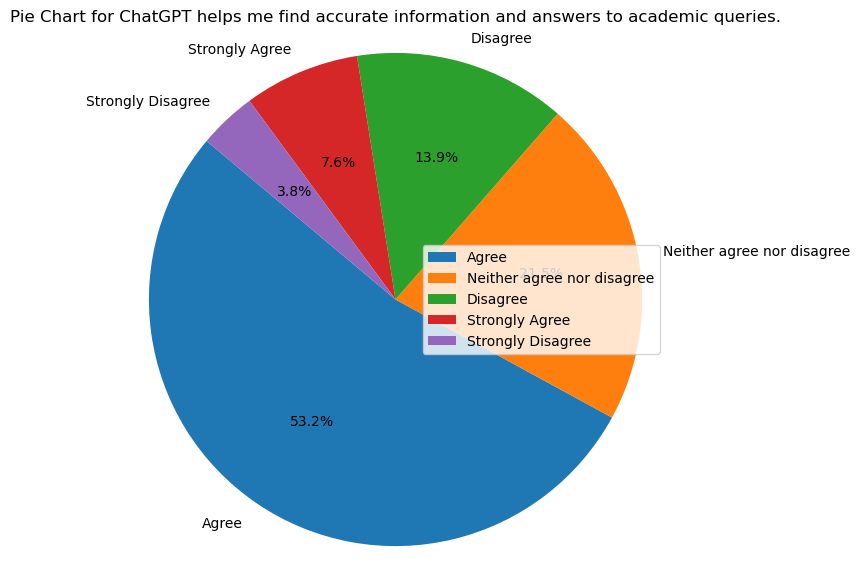

Results for ChatGPT enhances my academic performance.:
Agree: 31
Strongly Agree: 26
Neither agree nor disagree: 15
Disagree: 4
Strongly Disagree: 2




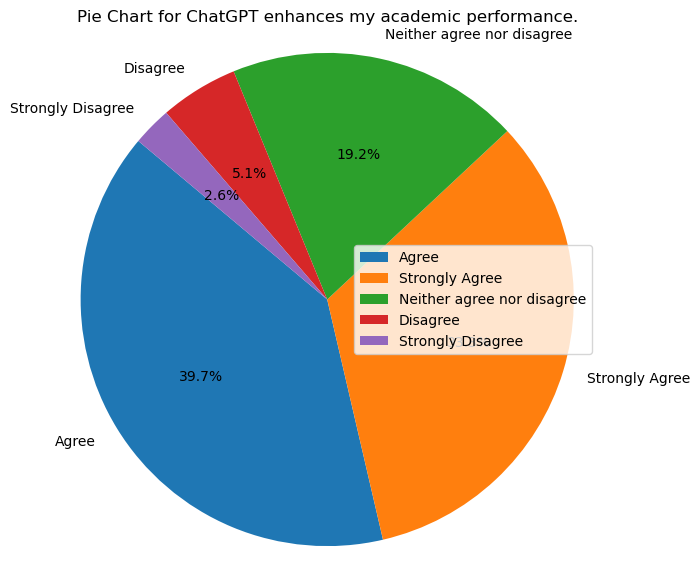

Results for ChatGPT is time-saving when it comes to academic work.:
Strongly Agree: 43
Agree: 27
Neither agree nor disagree: 6
Disagree: 3




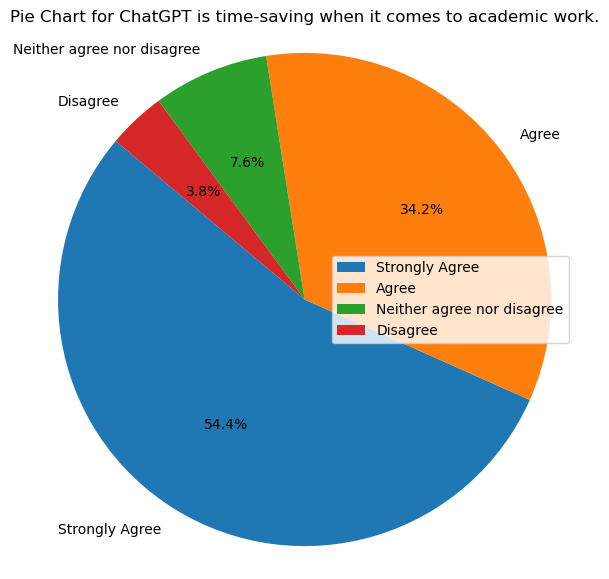

Results for I trust ChatGPT as a reliable tool to generate code for programming tasks.:
Agree: 25
Neither agree nor disagree: 22
Disagree: 19
Strongly Disagree: 7
Strongly Agree: 6




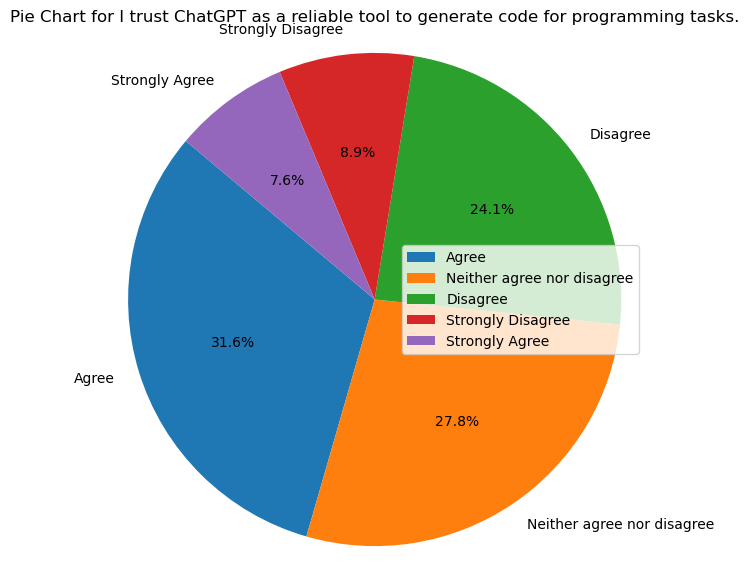

Results for ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, objects and classes).:
Agree: 34
Strongly Agree: 27
Disagree: 7
Neither agree nor disagree: 7
Strongly Disagree: 4




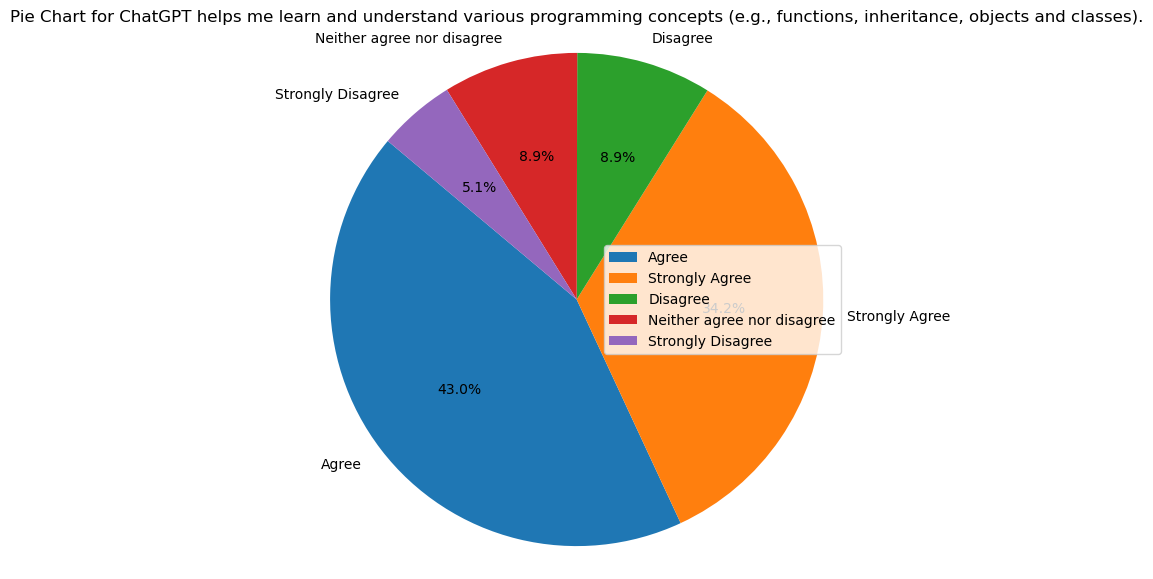

Results for ChatGPT helps me debug code and fix mistakes in programming tasks.:
Agree: 29
Strongly Agree: 21
Neither agree nor disagree: 16
Strongly Disagree: 9
Disagree: 4




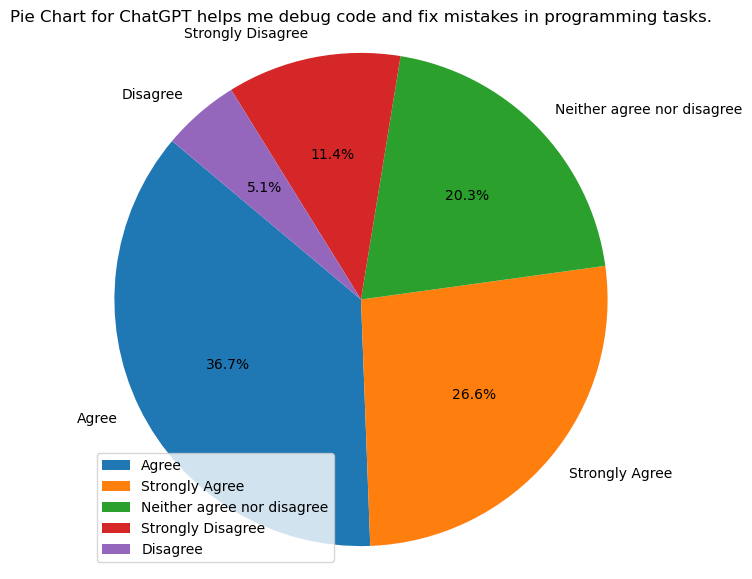

Results for ChatGPT is overall a useful tool for academic work.:
Strongly Agree: 36
Agree: 36
Neither agree nor disagree: 4
Strongly Disagree: 1
Disagree: 1




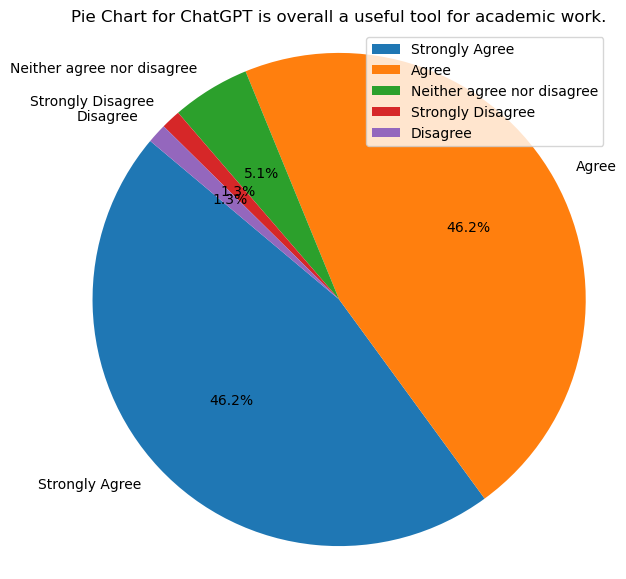

Results for I believe ChatGPT's reliability and accuracy are equivalent to search engines' (e.g., Google Search, Mozilla Firefox).:
Agree: 26
Disagree: 22
Strongly disagree: 13
Neither agree nor disagree: 12
Strongly agree: 5




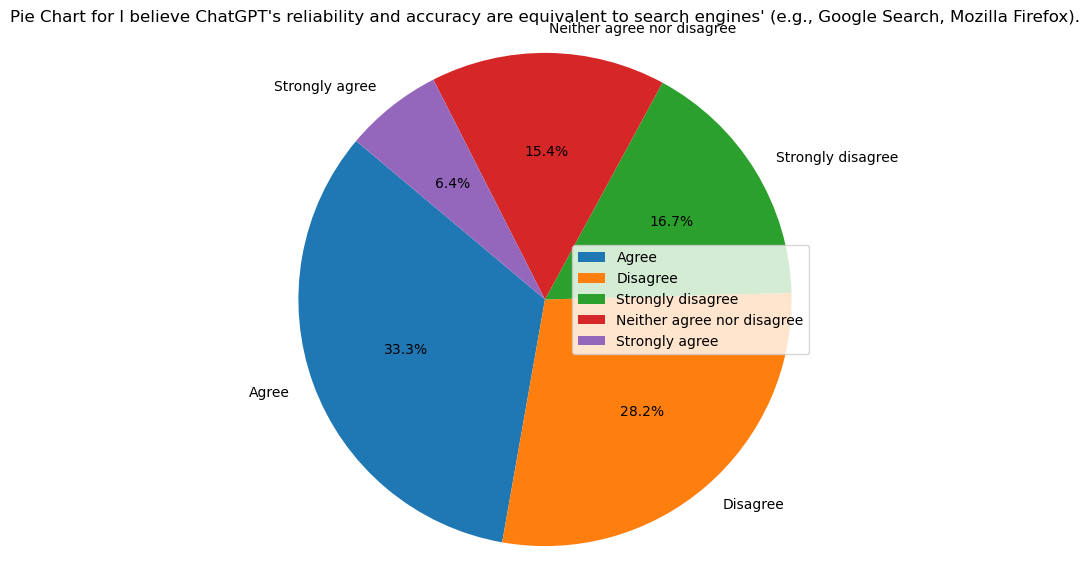

Results for ChatGPT is fun to use in my academic work.:
Agree: 39
Neither agree nor disagree: 18
Strongly agree: 15
Disagree: 5
Strongly disagree: 2




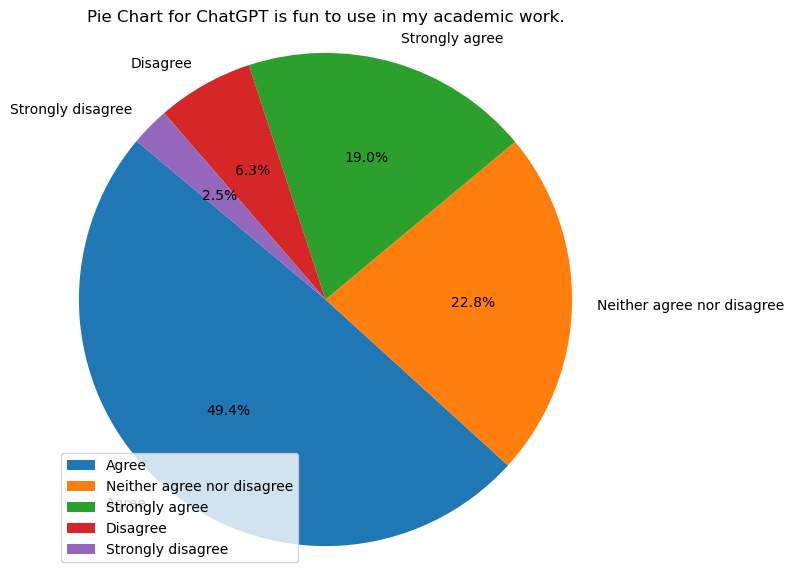

Results for ChatGPT helps me come up with creative ideas for my academic work.:
Agree: 31
Neither agree nor disagree: 17
Strongly agree: 14
Disagree: 12
Strongly disagree: 5




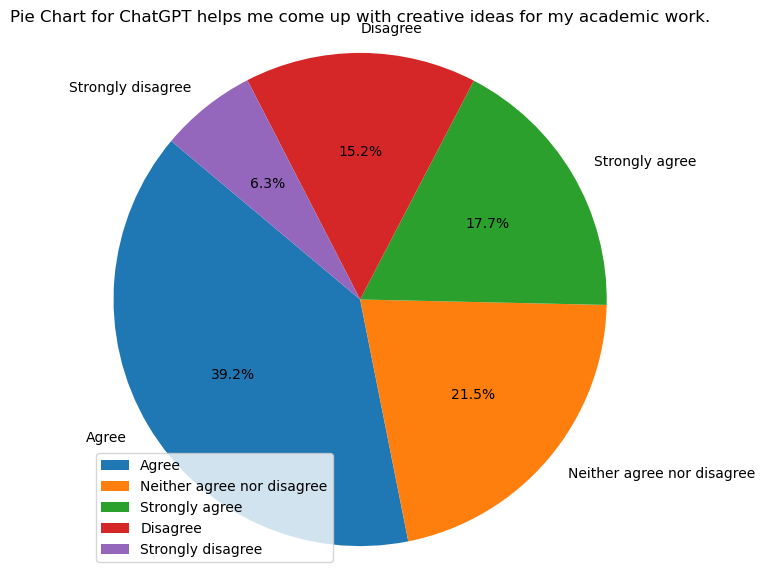

Results for Learning how to write ChatGPT prompts to get reliable answers is easy.:
Agree: 39
Neither agree nor disagree: 17
Strongly Agree: 12
Disagree: 8
Strongly Disagree: 2




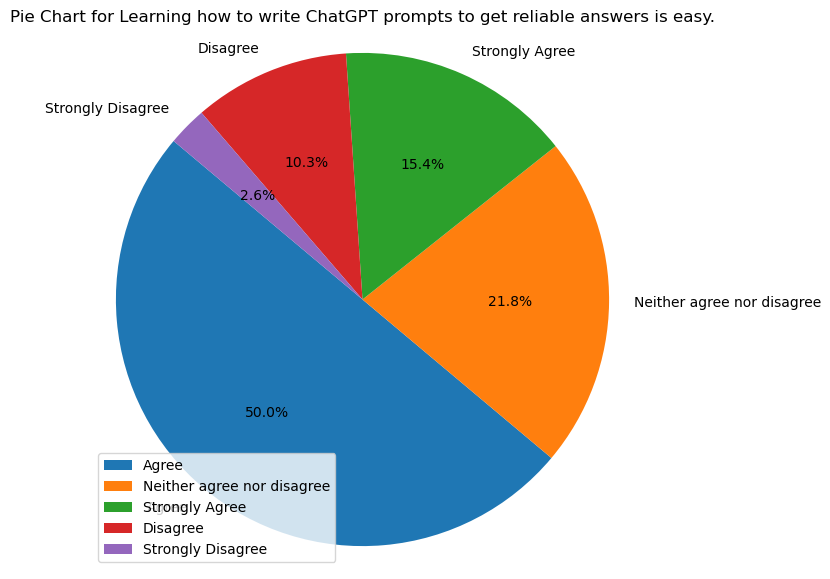

Results for I have access to adequate resources (e.g., internet, devices) to use ChatGPT effectively.:
Strongly agree: 46
Agree: 28
Neither agree nor disagree: 4




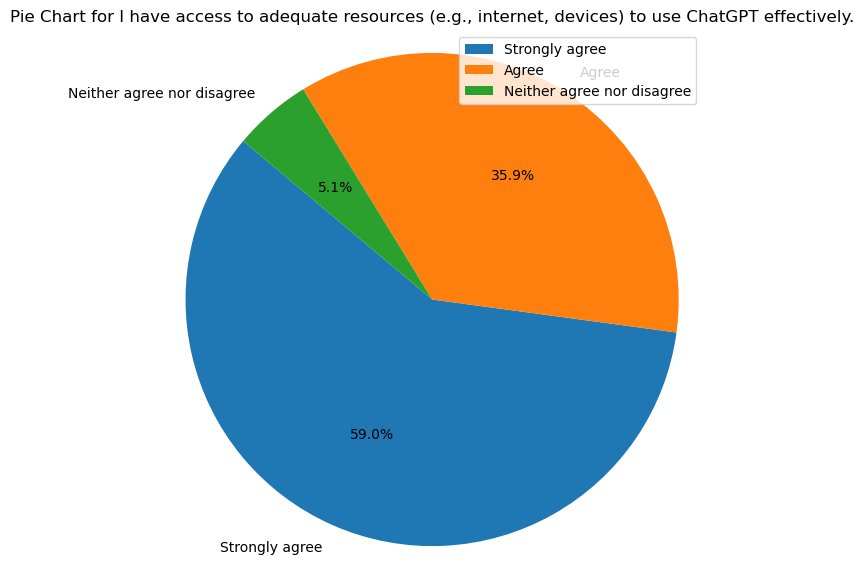

Results for Teachers and other teaching staff believe I should use ChatGPT for academic purposes.:
Neither agree nor disagree: 32
Disagree: 21
Agree: 14
Strongly disagree: 9
Strongly agree: 2




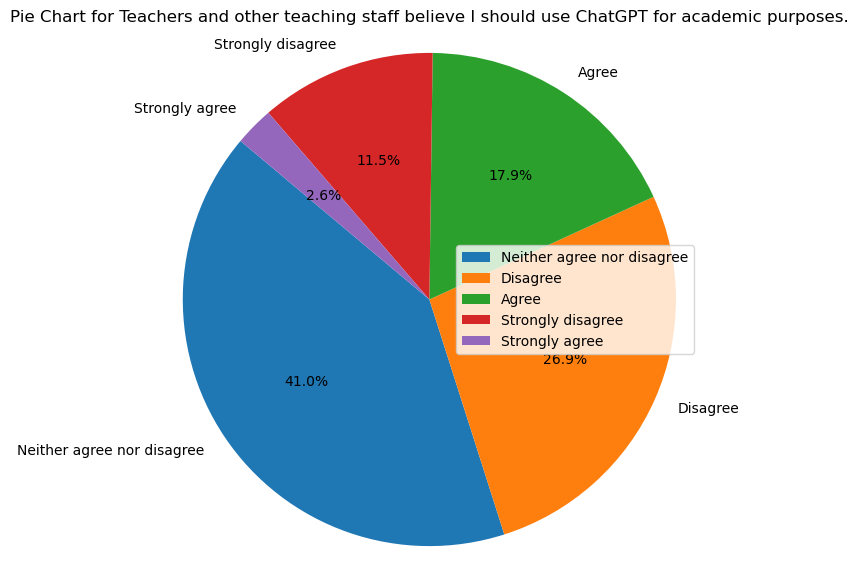

Results for My peers believe I should use ChatGPT for academic purposes.:
Agree: 28
Neither agree nor disagree: 26
Strongly agree: 19
Disagree: 4
Strongly disagree: 1




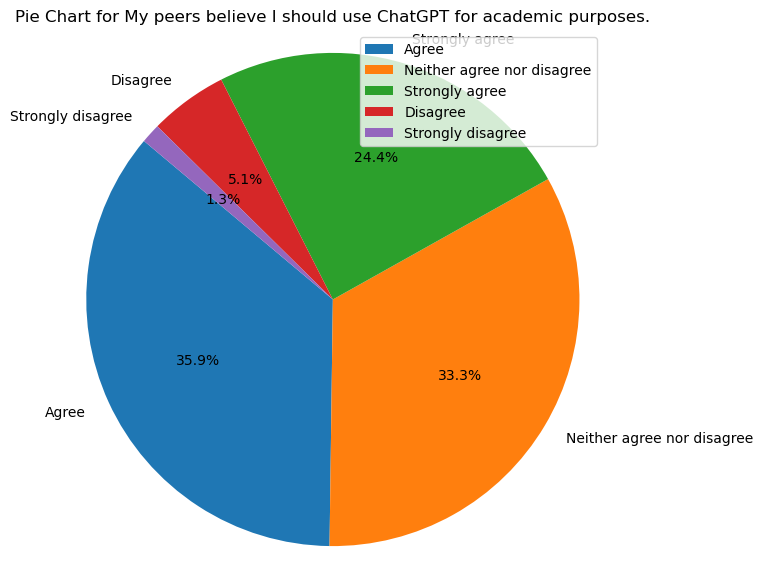

Results for I feel comfortable telling others that I am using ChatGPT for academic purposes.:
Agree: 36
Strongly agree: 19
Neither agree nor disagree: 13
Disagree: 10
Strongly disagree: 1




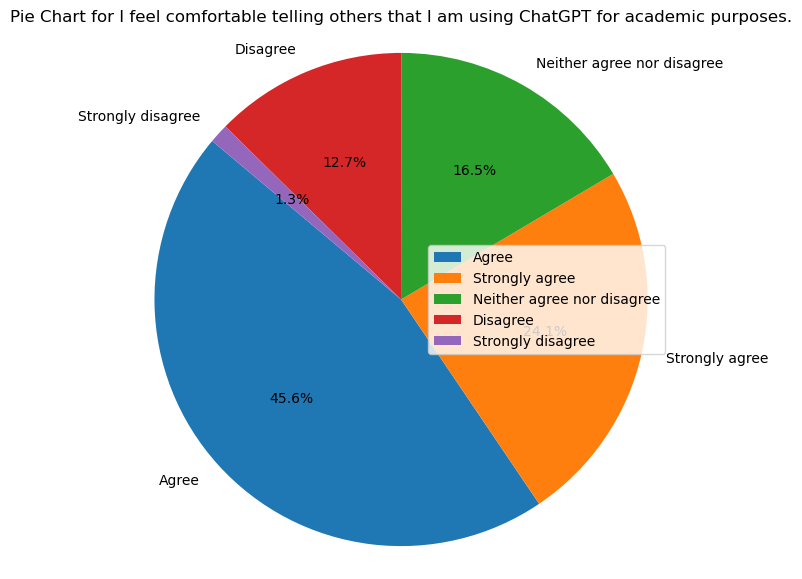

Results for I believe ChatGPT usage can have a positive impact on my studying process.:
Agree: 33
Strongly agree: 32
Neither agree nor disagree: 10
Strongly disagree: 2
Disagree: 2




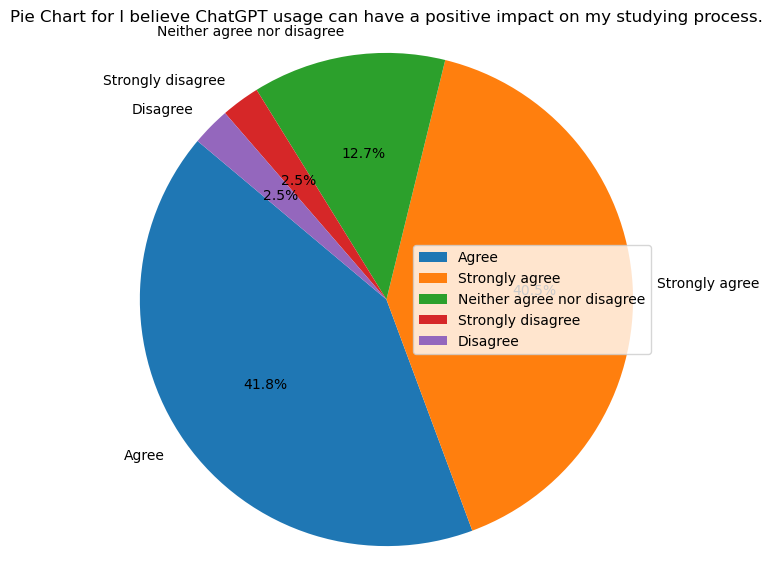

Results for I believe ChatGPT usage can have a negative impact on my studying process.:
Agree: 37
Disagree: 16
Neither agree nor disagree: 12
Strongly disagree: 10
Strongly agree: 4




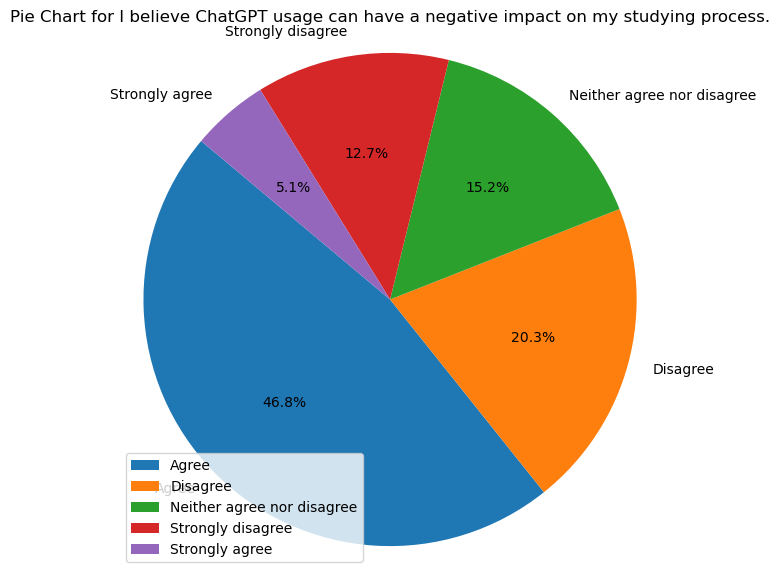

In [3]:

def print_pie_chart_data(data, column_name):
    response_counts = data[column_name].value_counts()
    print(f"Results for {column_name}:")
    for response, count in response_counts.items():
        print(f"{response}: {count}")
    print("\n")
    
def create_pie_chart(data, column_name, title):
    # Count the frequency of each unique response
    response_counts = data[column_name].value_counts()

    plt.figure(figsize=(7, 7))
    plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
    
    plt.title(title)
    plt.legend()
    plt.axis('equal')  
    plt.show()

def main():
    
    for column in questions:
        print_pie_chart_data(data, column)
        create_pie_chart(data, column, f'Pie Chart for {column}')

if __name__ == "__main__":
    main()

Linear regression plots comparing average likert scores for different pairs of questions

Linear Regression Coefficients: ChatGPT enhances my academic performance. = -0.0400 * ChatGPT helps me find accurate information and answers to academic queries. + 3.6000


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

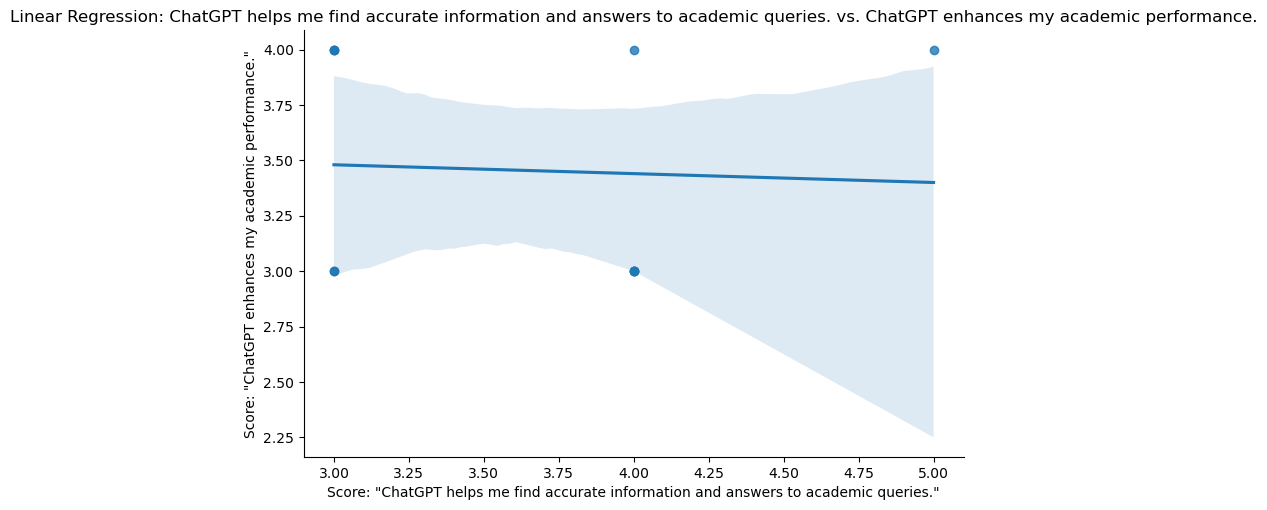

/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Linear Regression Coefficients: ChatGPT is time-saving when it comes to academic work. = 0.2000 * ChatGPT enhances my academic performance. + 3.4000


<Figure size 1000x600 with 0 Axes>

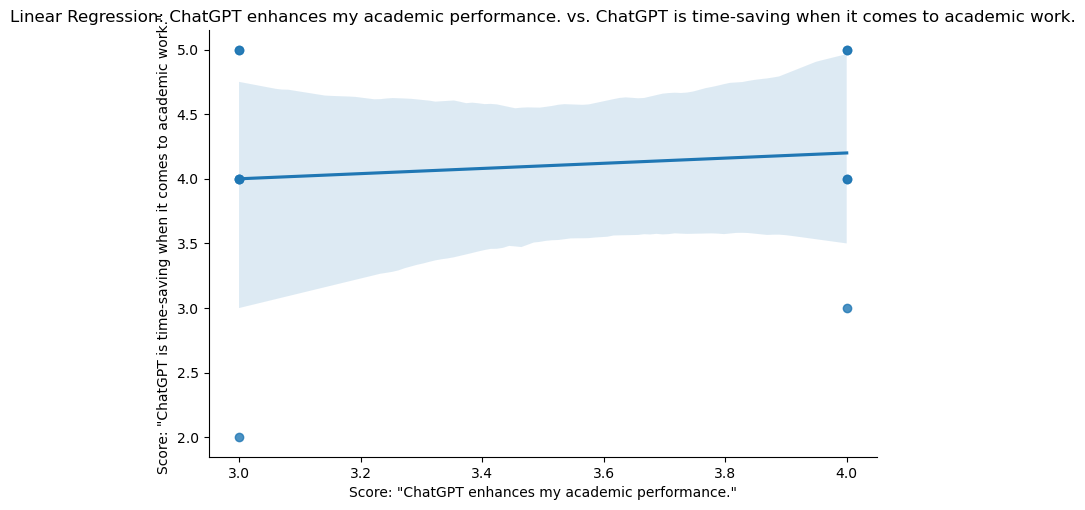

Linear Regression Coefficients: I trust ChatGPT as a reliable tool to generate code for programming tasks. = 0.1122 * ChatGPT is time-saving when it comes to academic work. + 2.5408


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

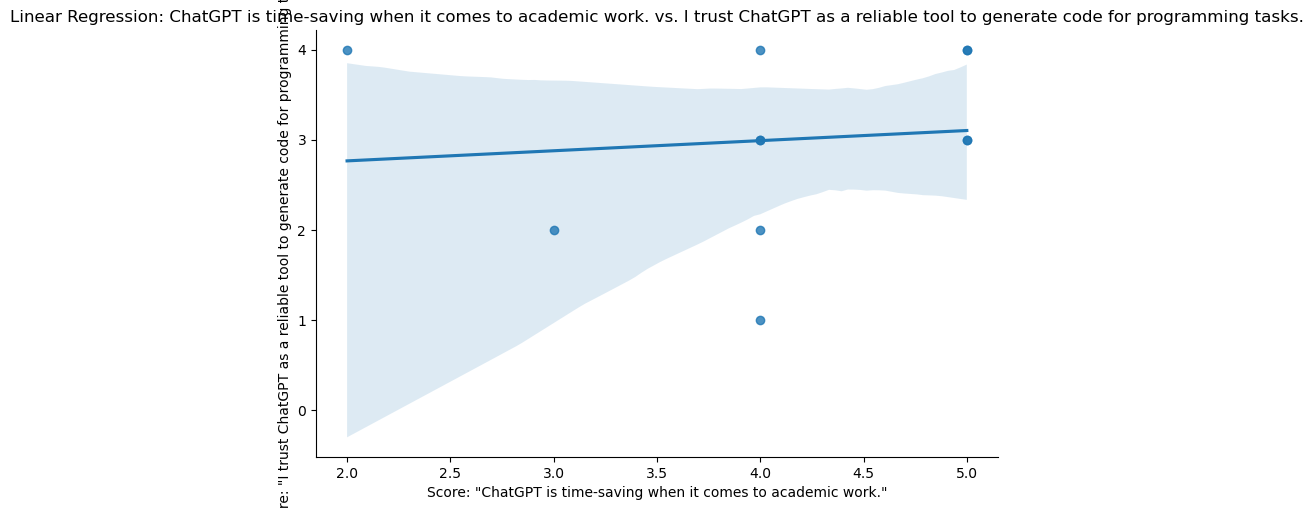

Linear Regression Coefficients: ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, objects and classes). = 0.1000 * I trust ChatGPT as a reliable tool to generate code for programming tasks. + 3.4273


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

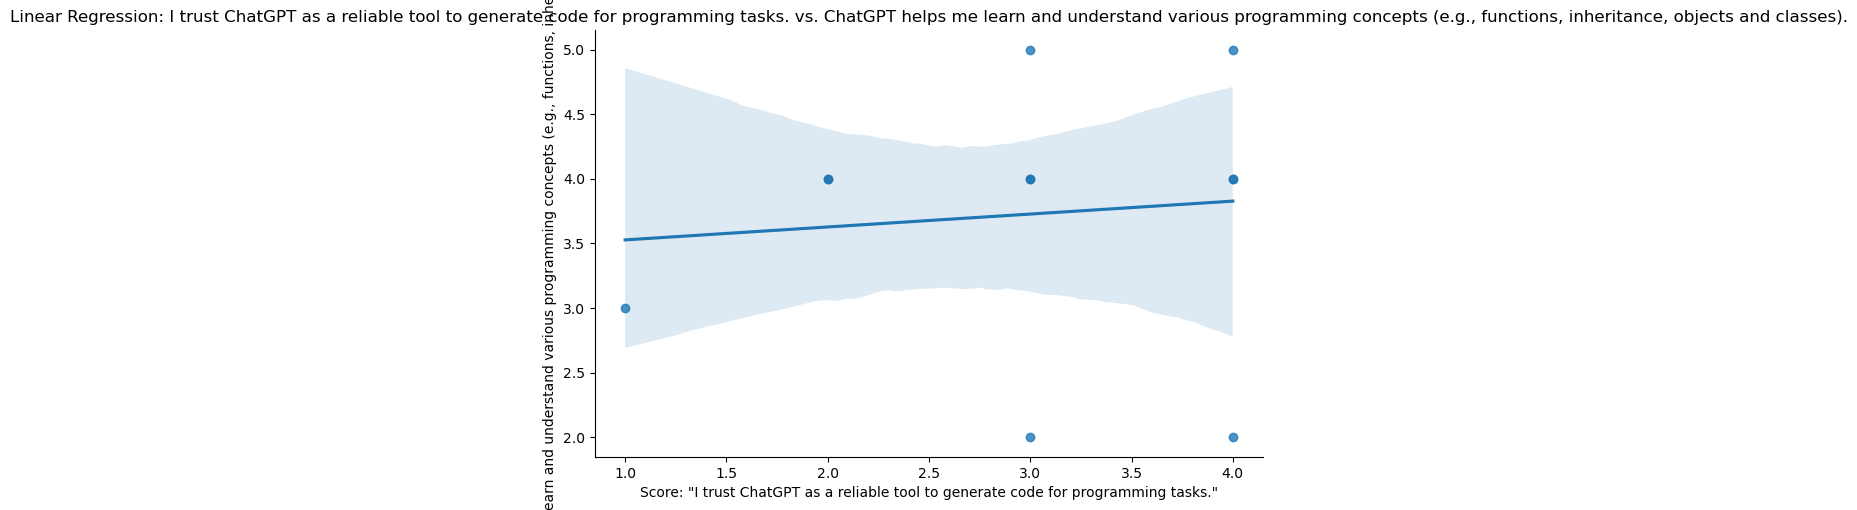

Linear Regression Coefficients: ChatGPT helps me debug code and fix mistakes in programming tasks. = 1.2321 * ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, objects and classes). + -1.4107


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

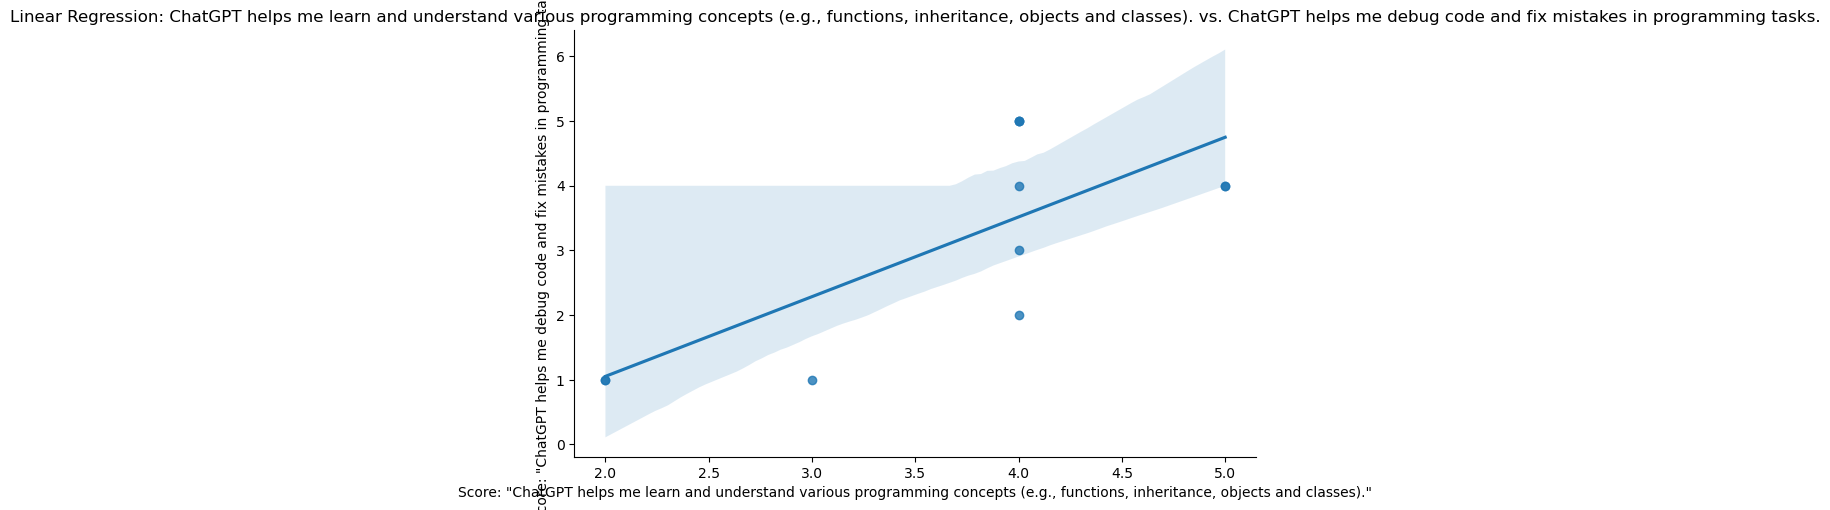

Linear Regression Coefficients: ChatGPT is overall a useful tool for academic work. = 0.1513 * ChatGPT helps me debug code and fix mistakes in programming tasks. + 3.4276


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

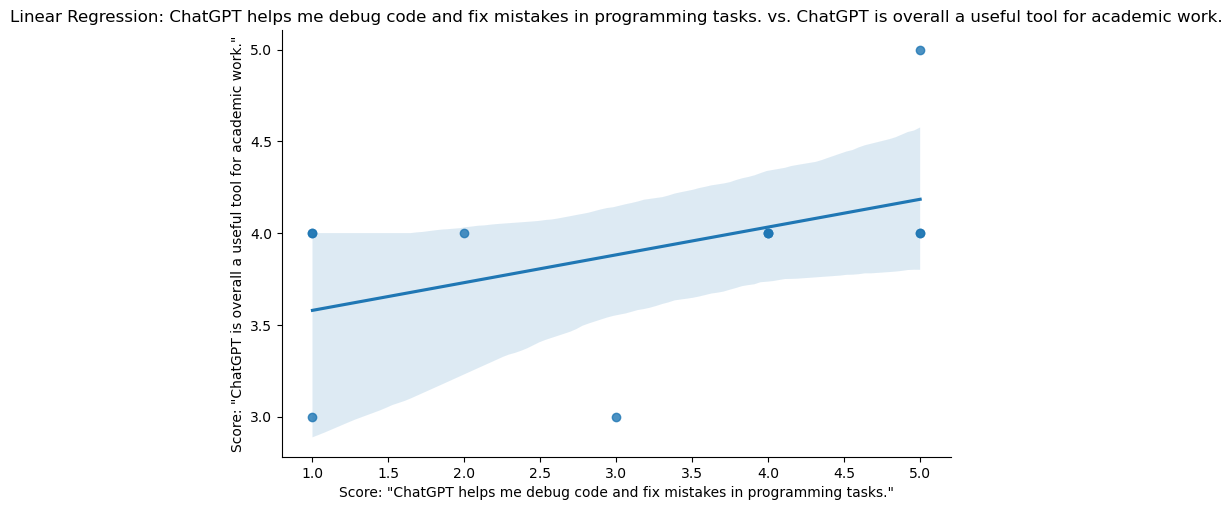

Linear Regression Coefficients: I believe ChatGPT's reliability and accuracy are equivalent to search engines' (e.g., Google Search, Mozilla Firefox). = 1.0312 * ChatGPT is overall a useful tool for academic work. + -1.0313


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

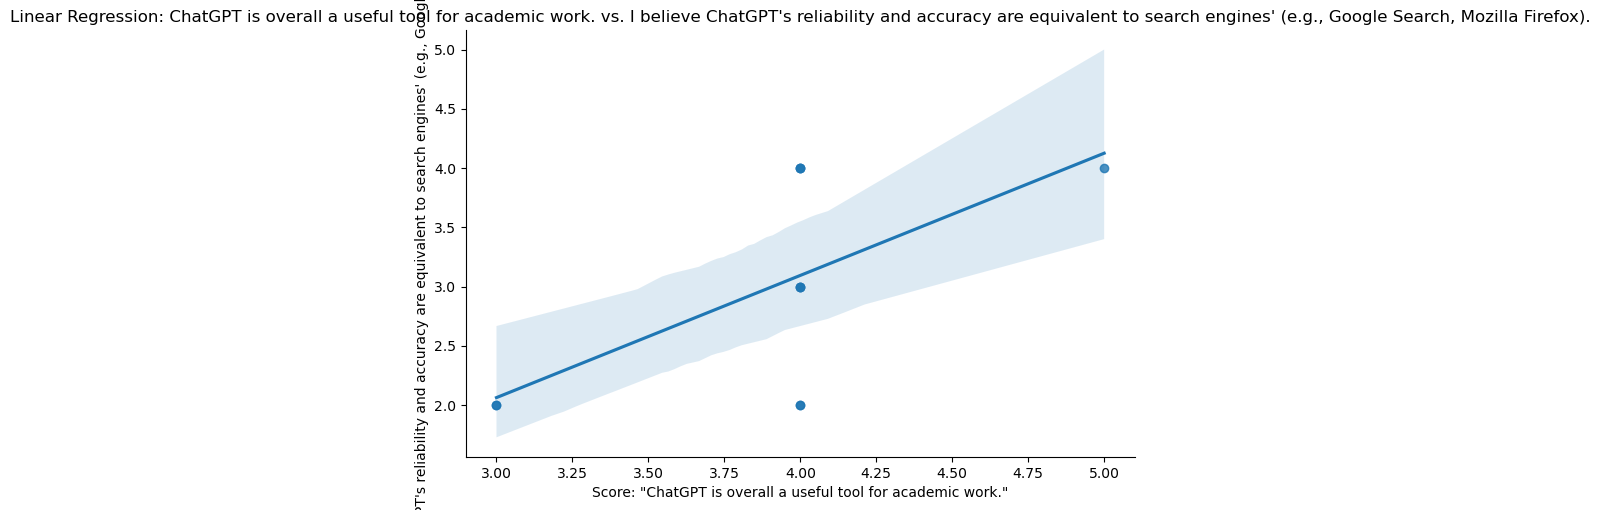

/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Linear Regression Coefficients: Learning how to write ChatGPT prompts to get reliable answers is easy. = 0.2500 * I believe ChatGPT's reliability and accuracy are equivalent to search engines' (e.g., Google Search, Mozilla Firefox). + 2.9773


<Figure size 1000x600 with 0 Axes>

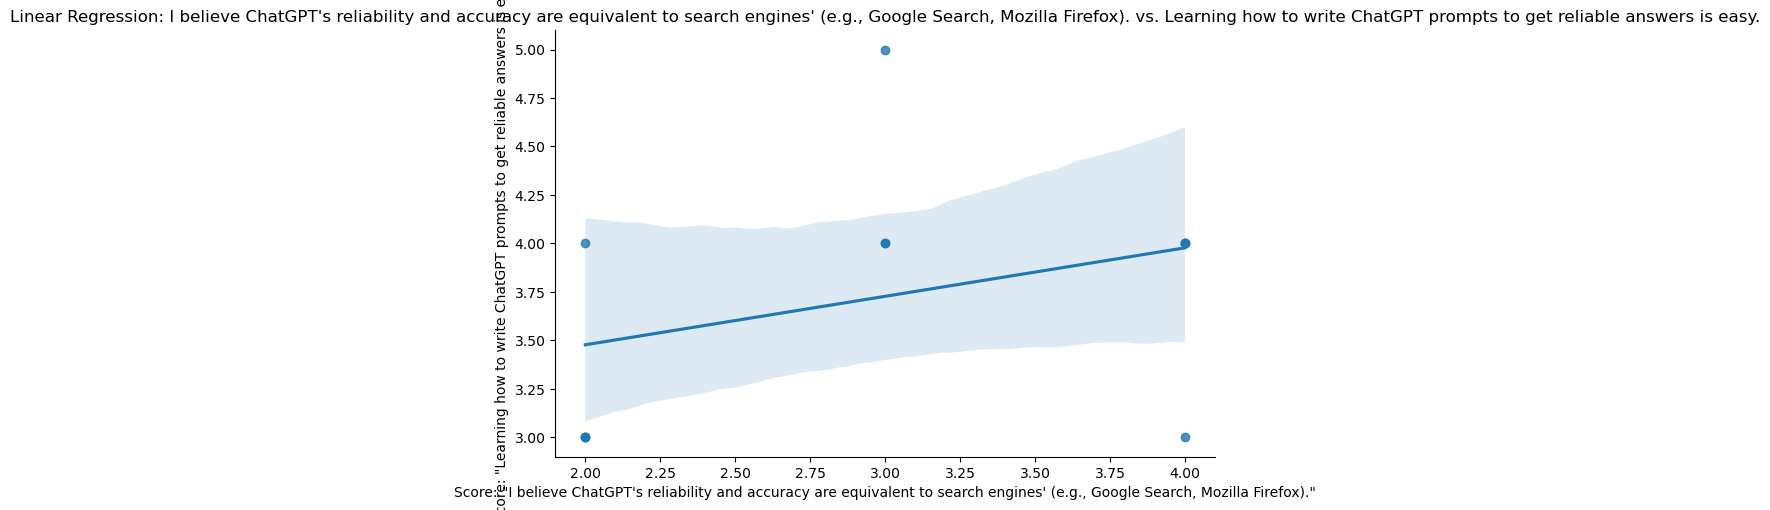

Linear Regression Coefficients: I have access to adequate resources (e.g., internet, devices) to use ChatGPT effectively. = 0.1087 * Learning how to write ChatGPT prompts to get reliable answers is easy. + 3.4130


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

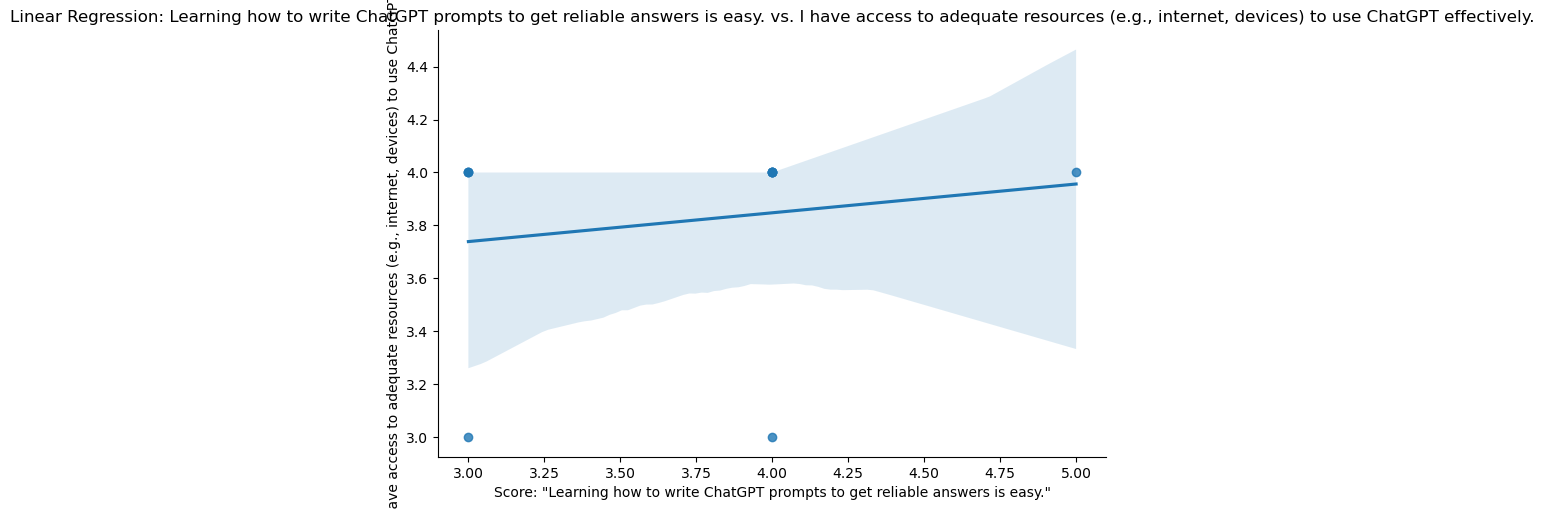

Linear Regression Coefficients: Teachers and other teaching staff believe I should use ChatGPT for academic purposes. = 0.0000 * I have access to adequate resources (e.g., internet, devices) to use ChatGPT effectively. + 3.0000


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

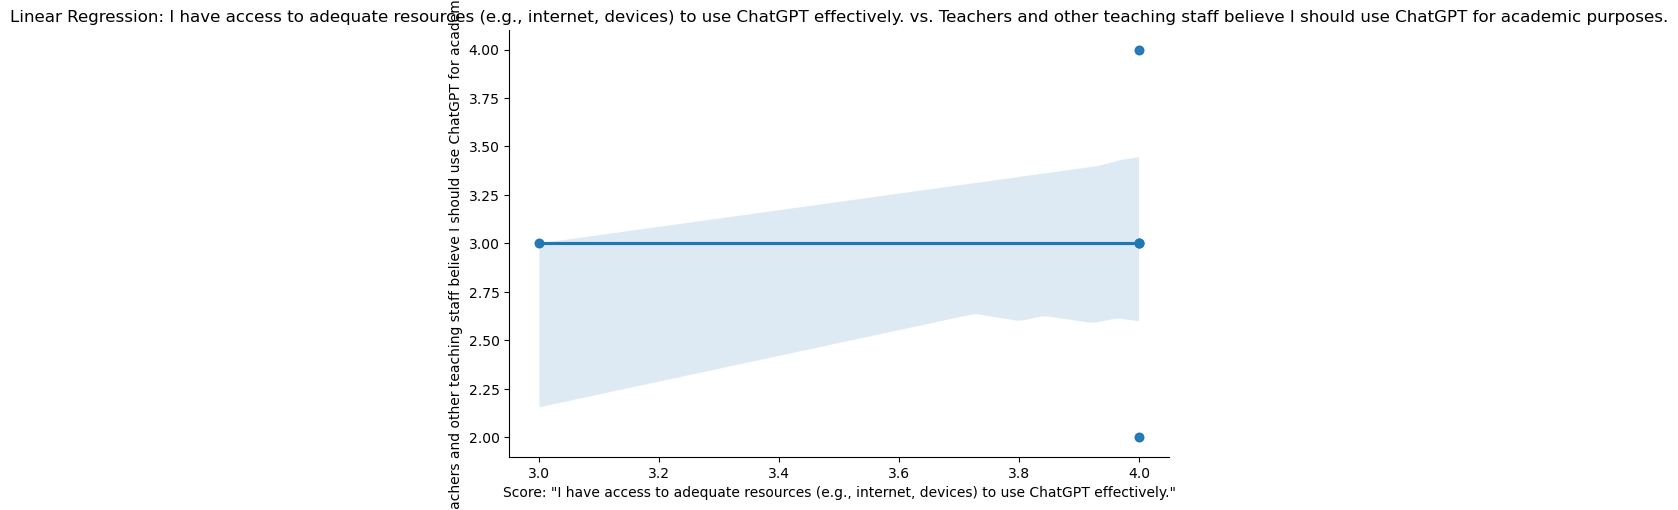

Linear Regression Coefficients: My peers believe I should use ChatGPT for academic purposes. = -0.2500 * Teachers and other teaching staff believe I should use ChatGPT for academic purposes. + 3.9318


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

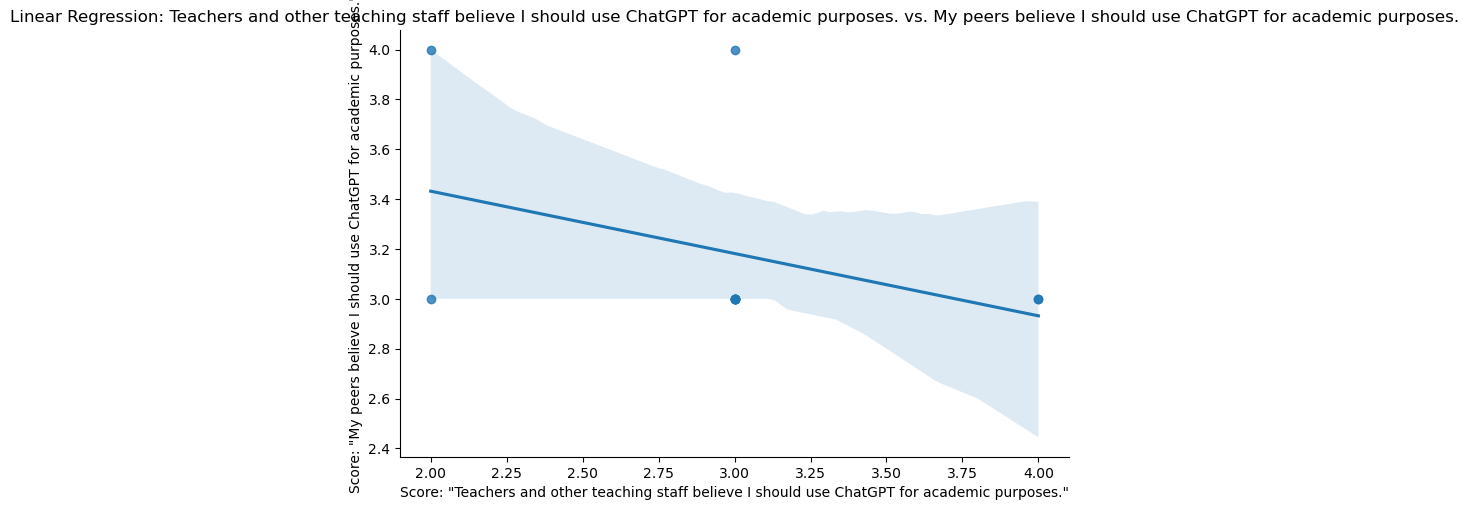

Linear Regression Coefficients: I feel comfortable telling others that I am using ChatGPT for academic purposes. = 0.4444 * My peers believe I should use ChatGPT for academic purposes. + 2.2222


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

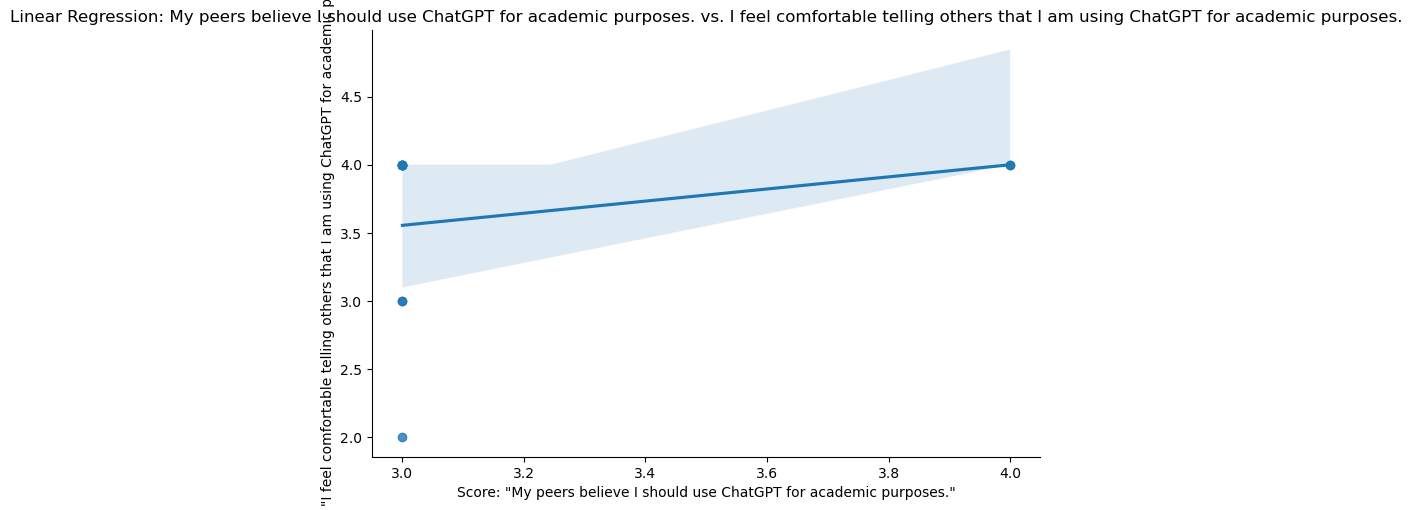

Linear Regression Coefficients: ChatGPT is fun to use in my academic work. = 0.4600 * I feel comfortable telling others that I am using ChatGPT for academic purposes. + 1.6000


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

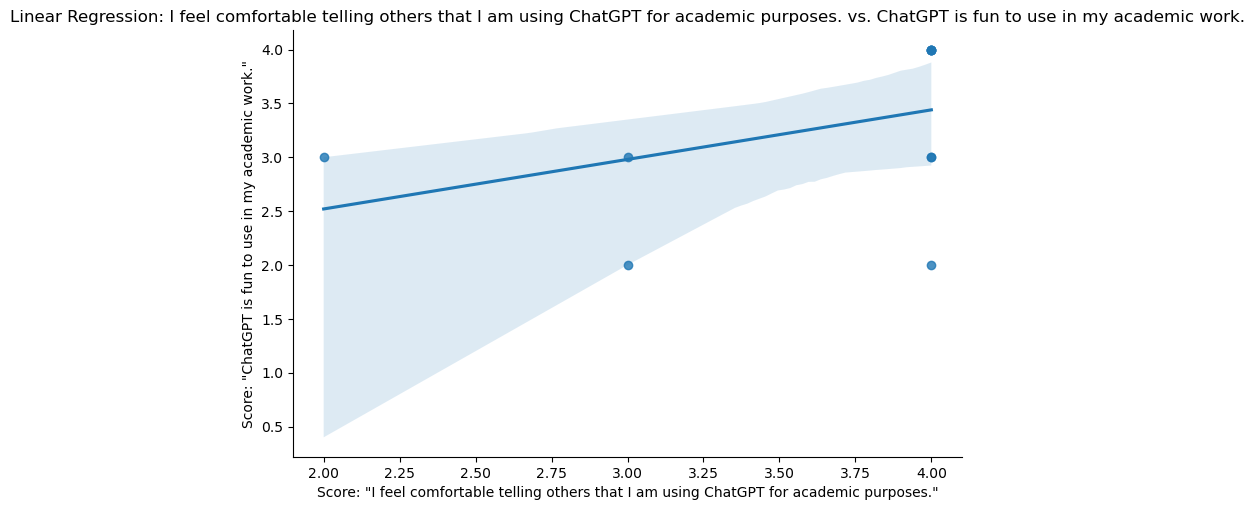

Linear Regression Coefficients: ChatGPT helps me come up with creative ideas for my academic work. = -0.2941 * ChatGPT is fun to use in my academic work. + 4.2353


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

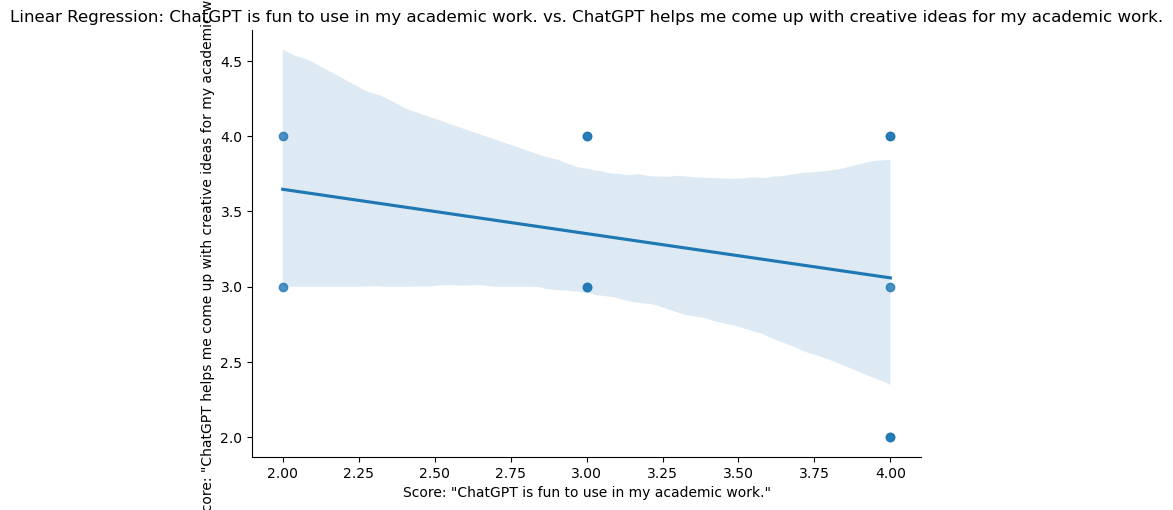

Linear Regression Coefficients: I believe ChatGPT usage can have a positive impact on my studying process. = -0.1912 * ChatGPT helps me come up with creative ideas for my academic work. + 4.3529


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

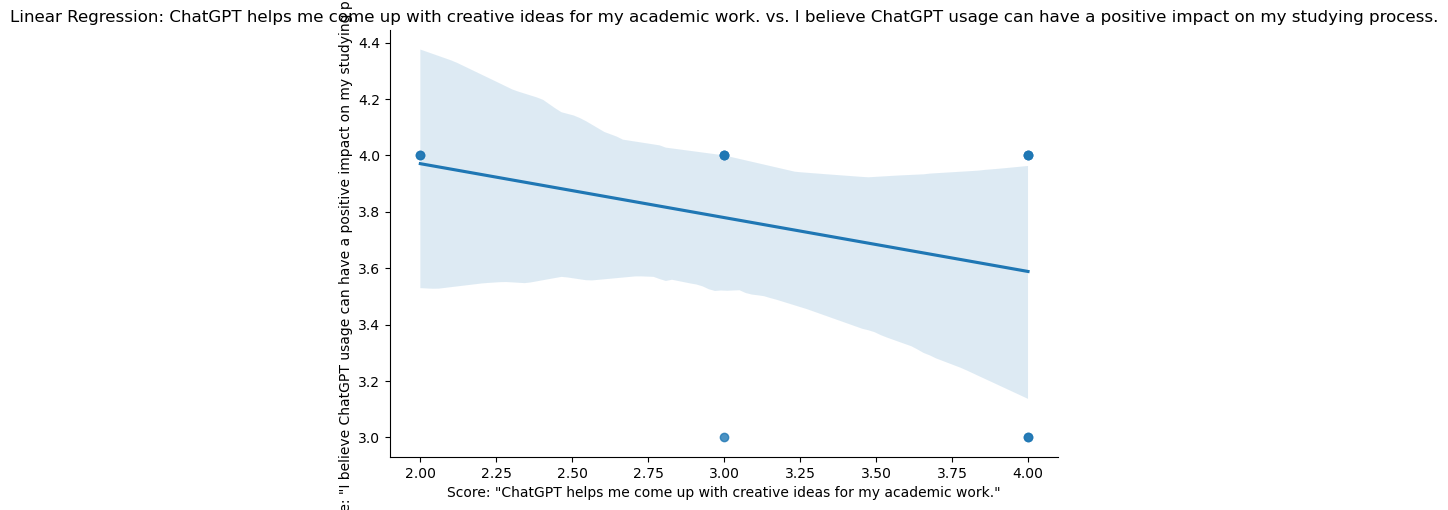

Linear Regression Coefficients: I believe ChatGPT usage can have a negative impact on my studying process. = -0.2083 * I believe ChatGPT usage can have a positive impact on my studying process. + 3.9583


/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

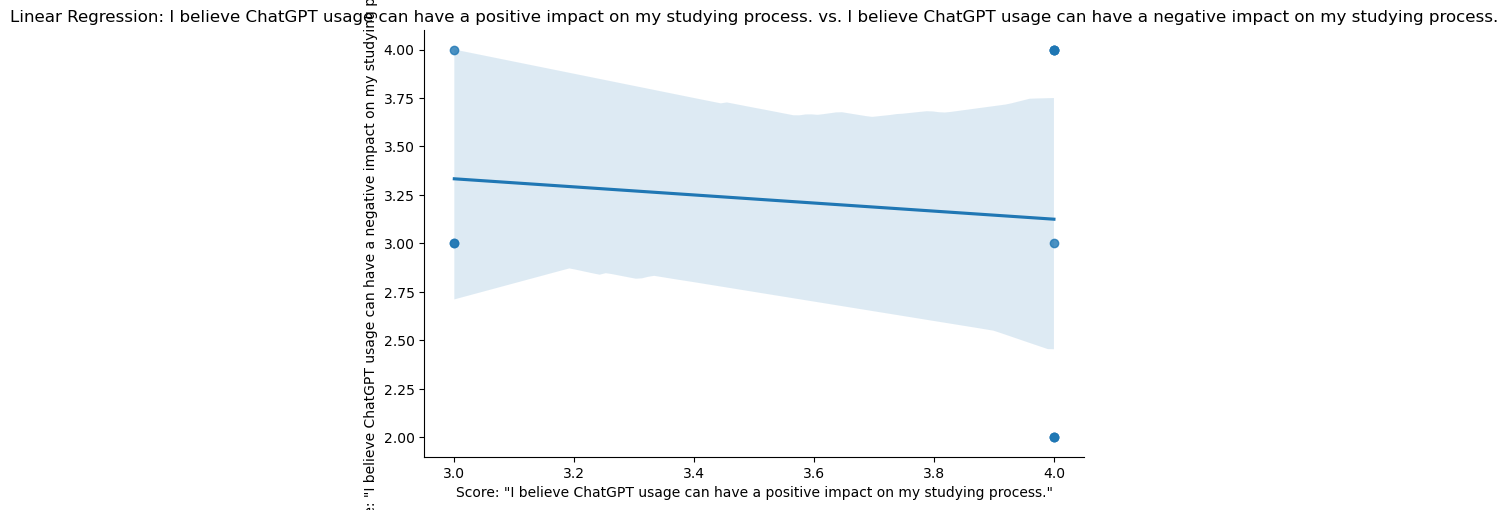

In [4]:
# Map the Likert scale responses to numeric values for all questions
for question in question5:
    data[question + '_Score'] = data[question].map(likert_scale)

# Drop rows with NaN values in any of the score columns
data_clean = data.dropna(subset=[q + '_Score' for q in question5])

# Generate plots for each pair of questions
for i in range(len(question5) - 1):
    q1 = question5[i]
    q2 = question5[i + 1]

    plt.figure(figsize=(10, 6))
    sns.lmplot(x=q1 + '_Score', y=q2 + '_Score', data=data_clean, aspect=1.5)
    X = data_clean[q1 + '_Score']
    y = data_clean[q2 + '_Score']
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit()  
    print(f'Linear Regression Coefficients: {q2} = {model.params[q1 + "_Score"]:.4f} * {q1} + {model.params["const"]:.4f}')

    plt.title(f'Linear Regression: {q1} vs. {q2}')
    plt.xlabel(f'Score: "{q1}"')
    plt.ylabel(f'Score: "{q2}"')

    plt.show()

Barplots of average likert scores depending on gender

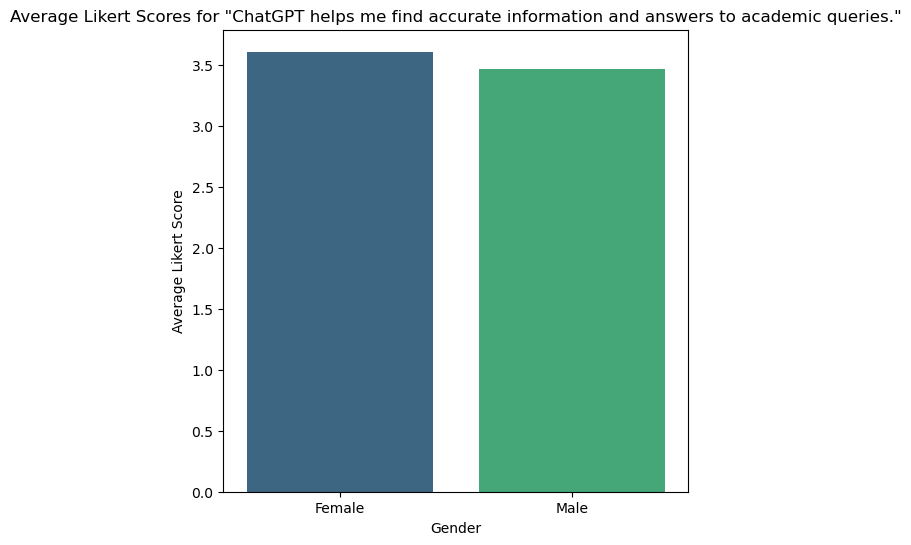

   Gender  Likert_Score
0  Female      3.611111
1    Male      3.471698


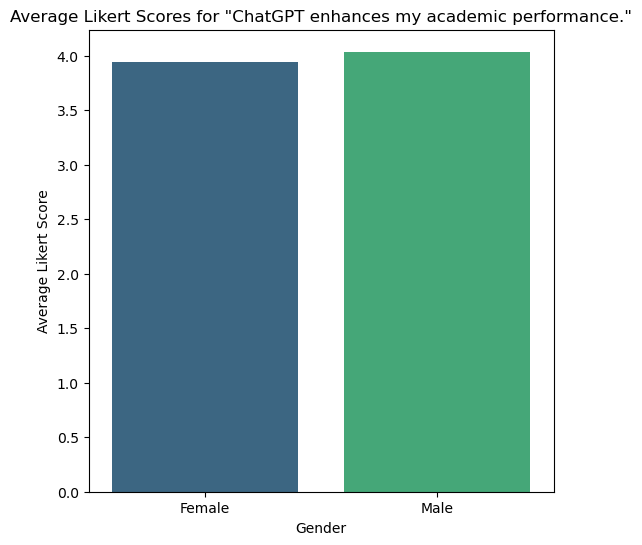

   Gender  Likert_Score
0  Female      3.944444
1    Male      4.037736


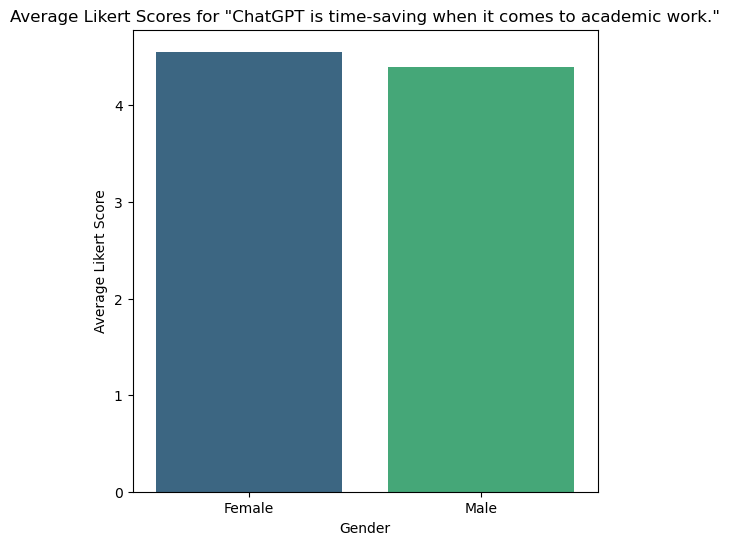

   Gender  Likert_Score
0  Female      4.555556
1    Male      4.396226


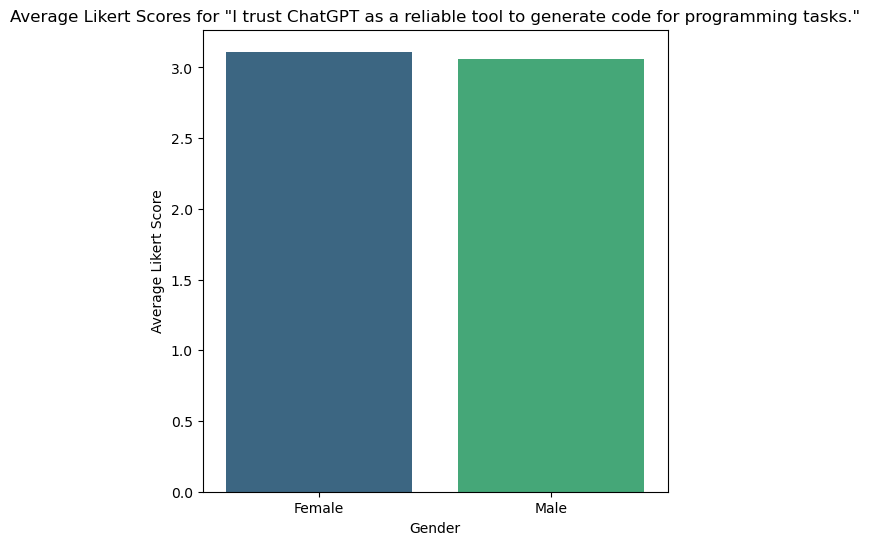

   Gender  Likert_Score
0  Female      3.111111
1    Male      3.056604


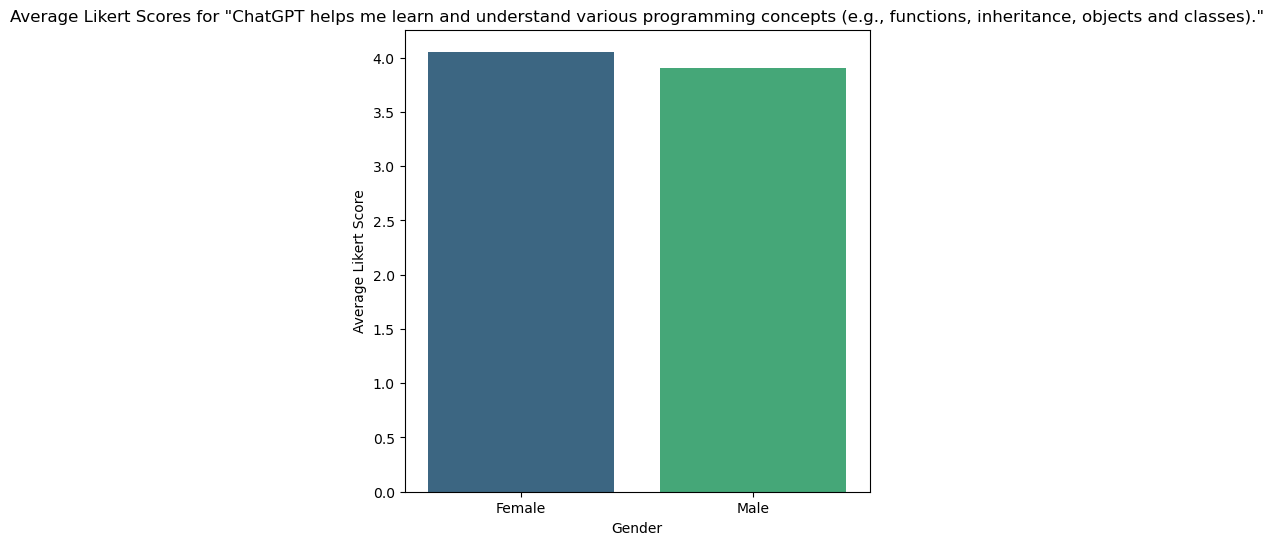

   Gender  Likert_Score
0  Female      4.055556
1    Male      3.905660


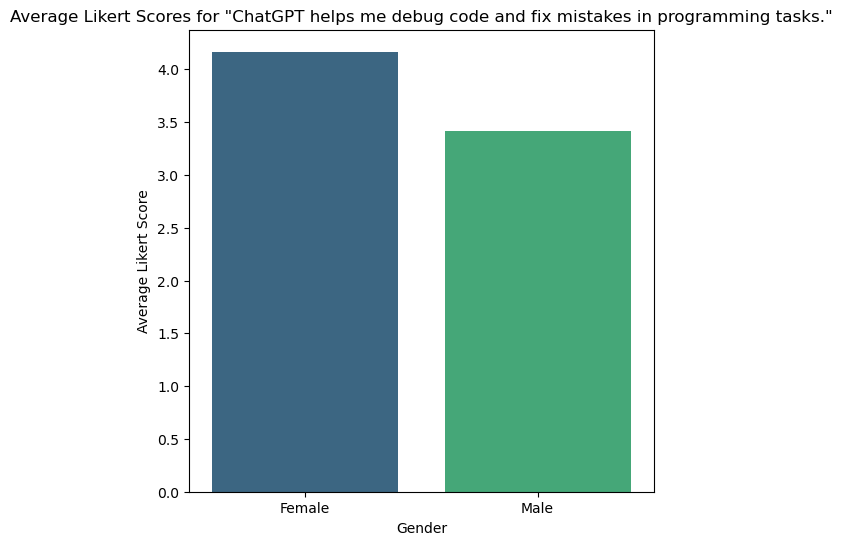

   Gender  Likert_Score
0  Female      4.166667
1    Male      3.415094


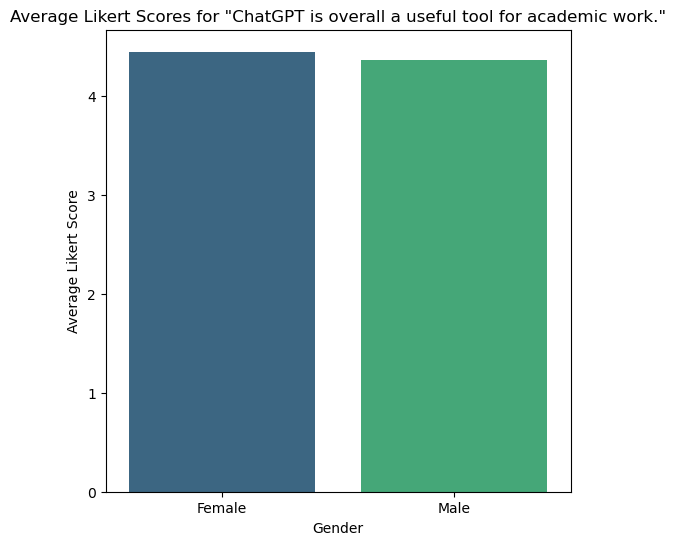

   Gender  Likert_Score
0  Female      4.444444
1    Male      4.365385


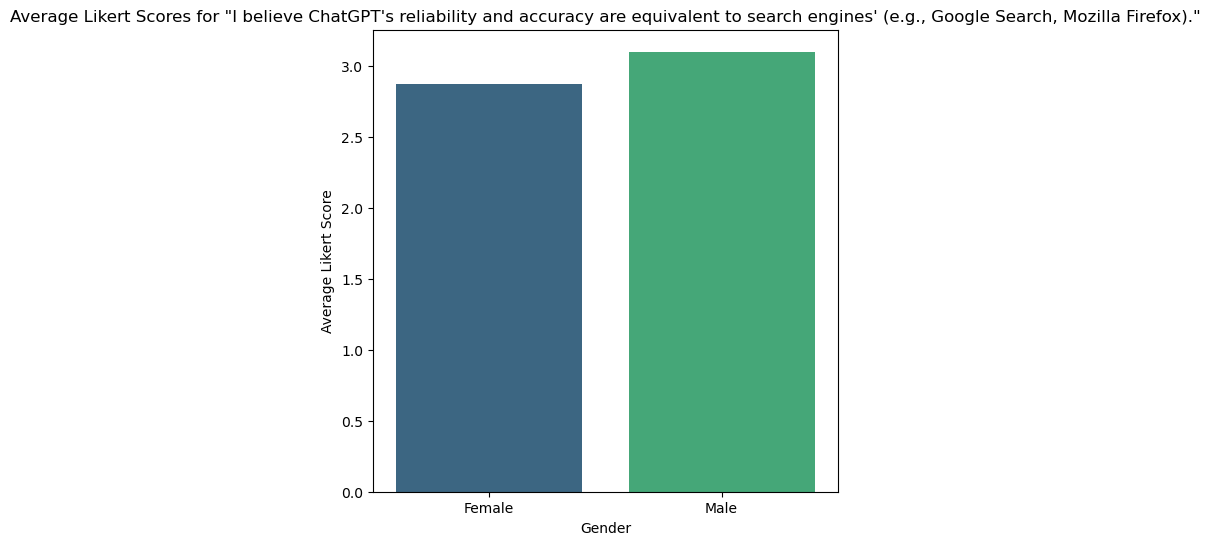

   Gender  Likert_Score
0  Female         2.875
1    Male         3.100


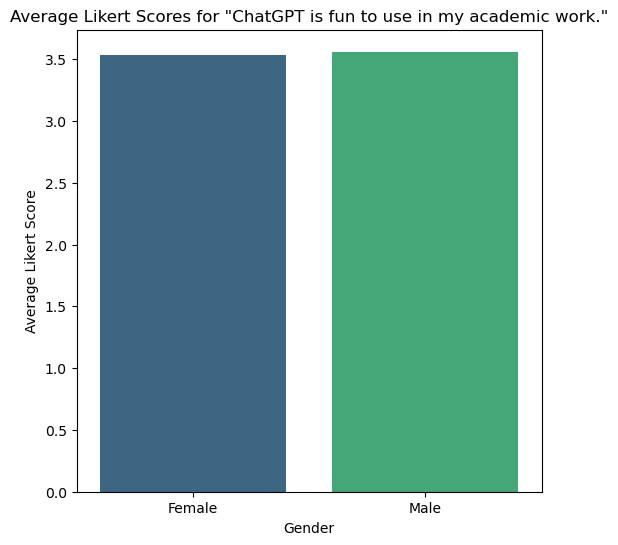

   Gender  Likert_Score
0  Female      3.533333
1    Male      3.560976


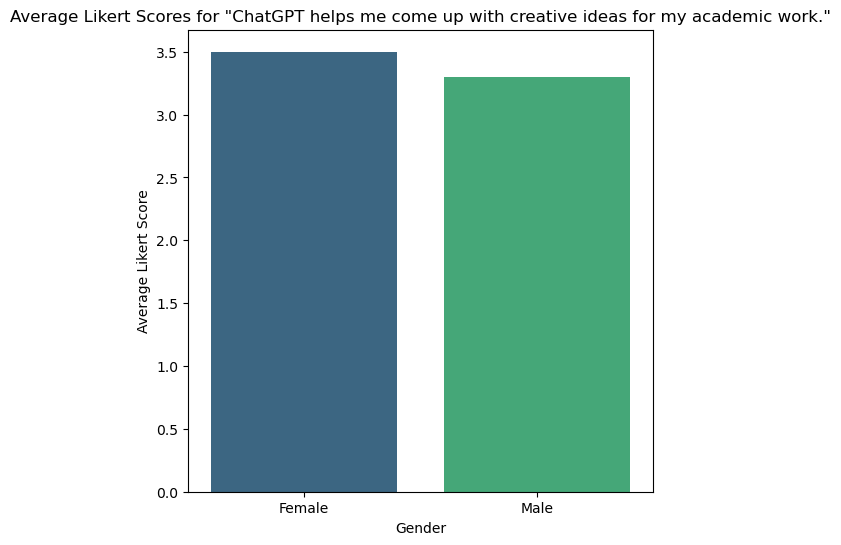

   Gender  Likert_Score
0  Female           3.5
1    Male           3.3


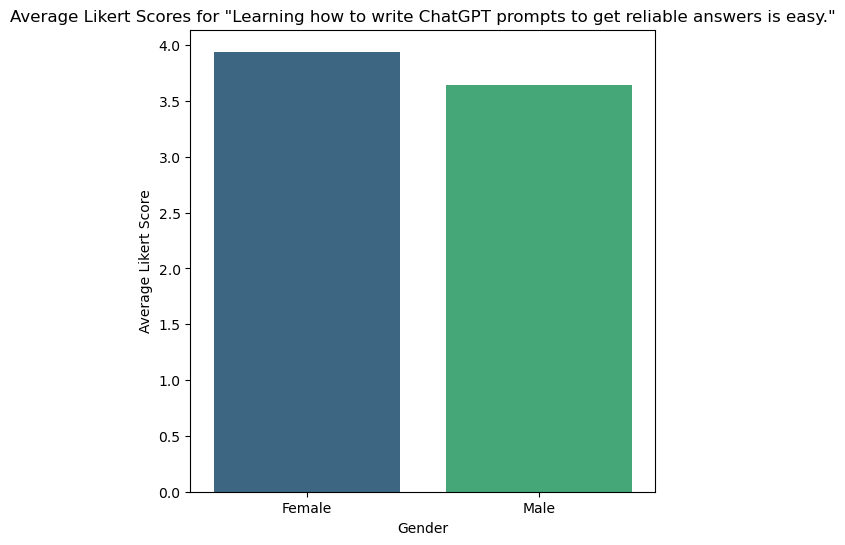

   Gender  Likert_Score
0  Female      3.941176
1    Male      3.641509


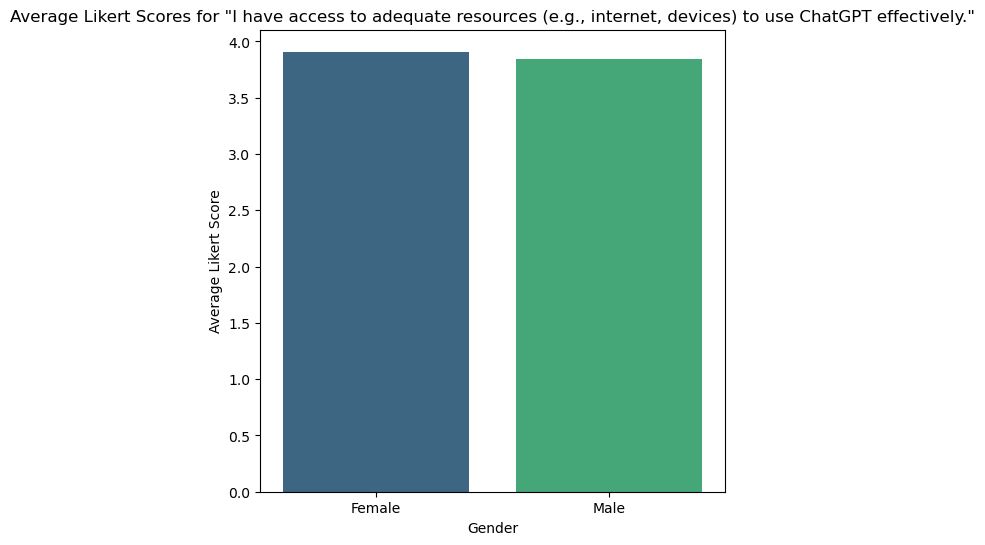

   Gender  Likert_Score
0  Female      3.909091
1    Male      3.842105


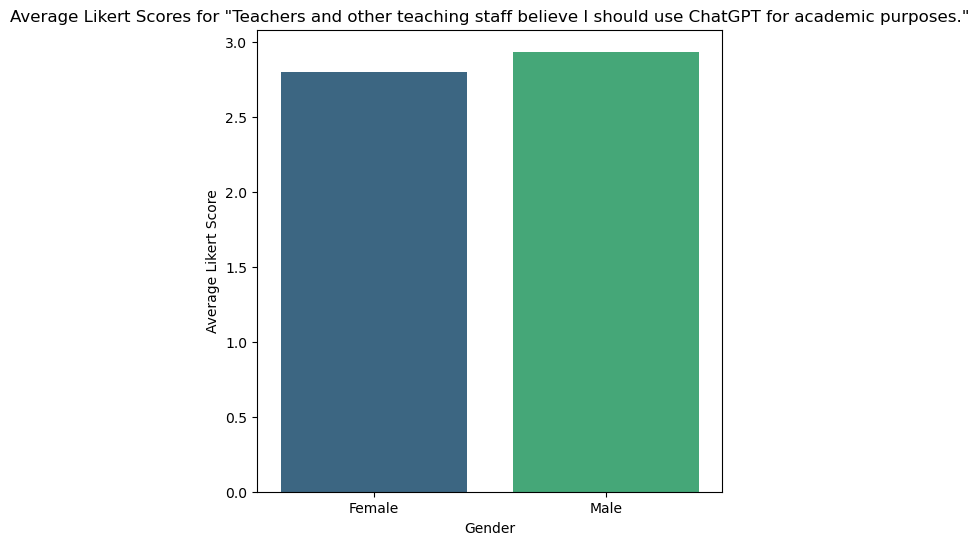

   Gender  Likert_Score
0  Female      2.800000
1    Male      2.934783


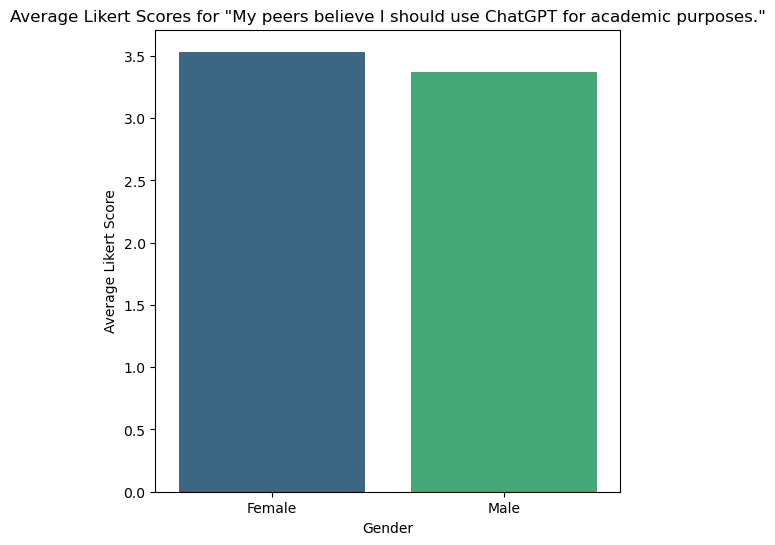

   Gender  Likert_Score
0  Female      3.533333
1    Male      3.368421


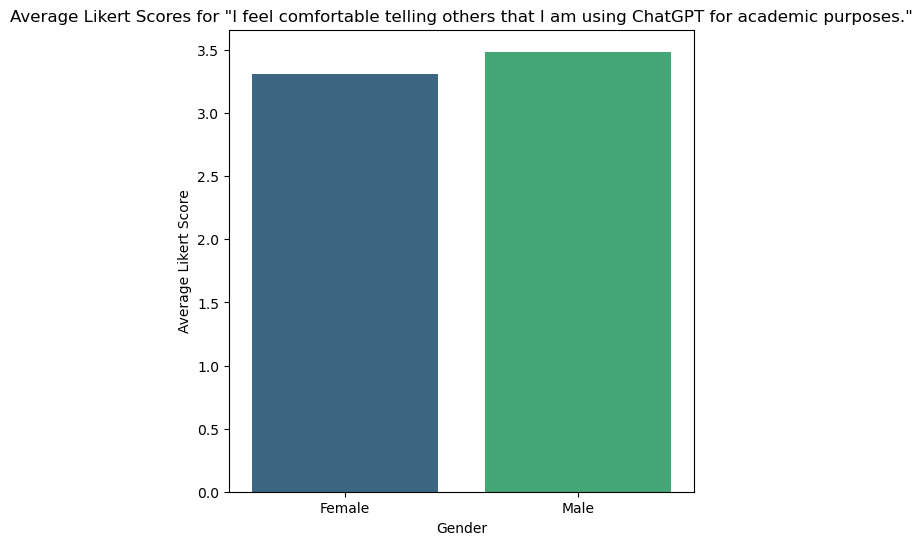

   Gender  Likert_Score
0  Female      3.312500
1    Male      3.486486


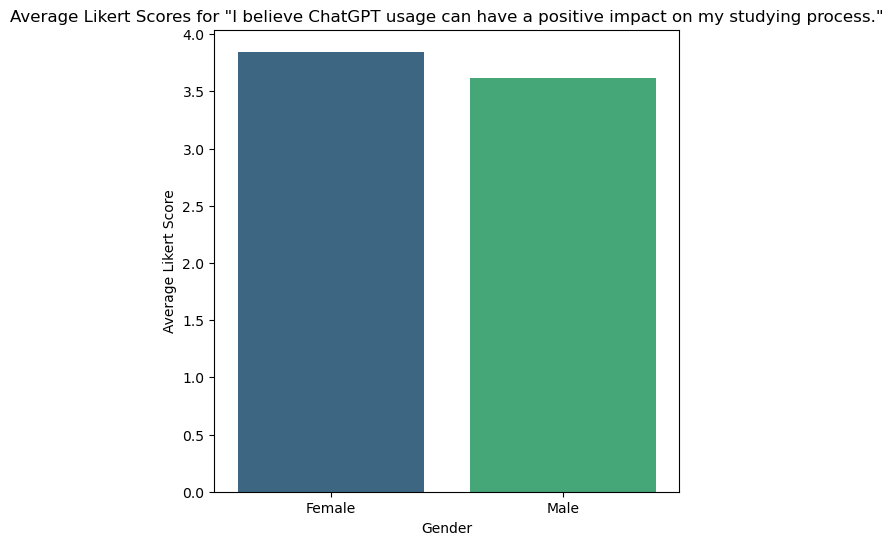

   Gender  Likert_Score
0  Female      3.846154
1    Male      3.620690


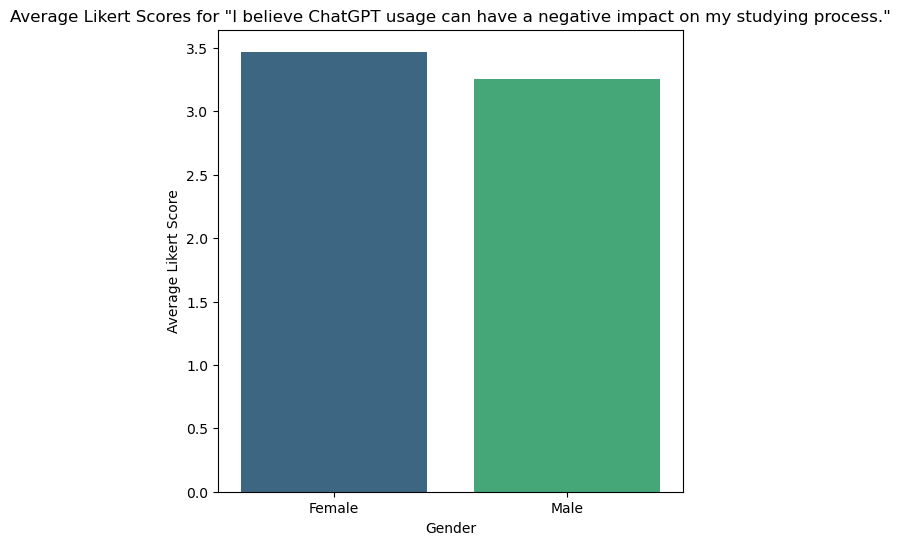

   Gender  Likert_Score
0  Female      3.470588
1    Male      3.255814


In [5]:
# Encode 'Gender' column
data['Gender'] = data['What is your gender?'].map({'Female': 'Female', 'Male': 'Male'})


# Loop through each question and plot the bar plot
for question in questions:
    # Map the Likert scale responses to numeric values
    data['Likert_Score'] = data[question].map(likert_scale)

    # Drop rows with NaN values in 'Gender' or 'Likert_Score'
    data_clean = data.dropna(subset=['Gender', 'Likert_Score'])

    # Calculate the average Likert score for each gender
    average_scores = data_clean.groupby('Gender')['Likert_Score'].mean().reset_index()

    plt.figure(figsize=(6, 6))
    sns.barplot(x='Gender', y='Likert_Score', data=average_scores, palette='viridis')
    plt.title(f'Average Likert Scores for "{question}"')
    plt.xlabel('Gender')
    plt.ylabel('Average Likert Score')

    plt.show()
    print(average_scores)

Barplots of average likert scores depending on education level

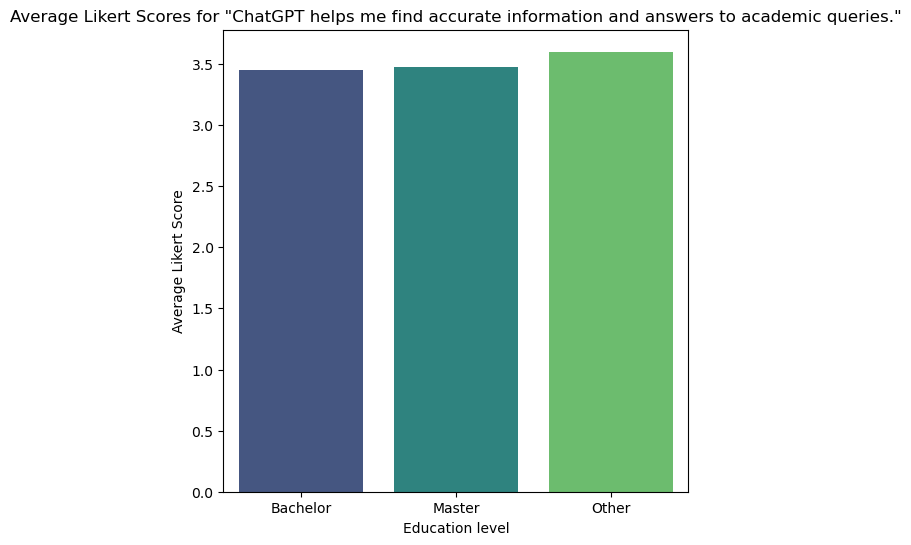

  Education level  Likert_Score
0        Bachelor      3.454545
1          Master      3.473684
2           Other      3.600000


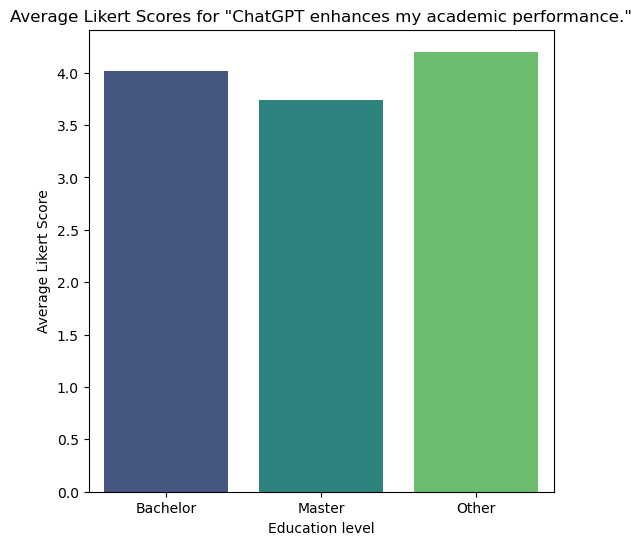

  Education level  Likert_Score
0        Bachelor      4.018519
1          Master      3.736842
2           Other      4.200000


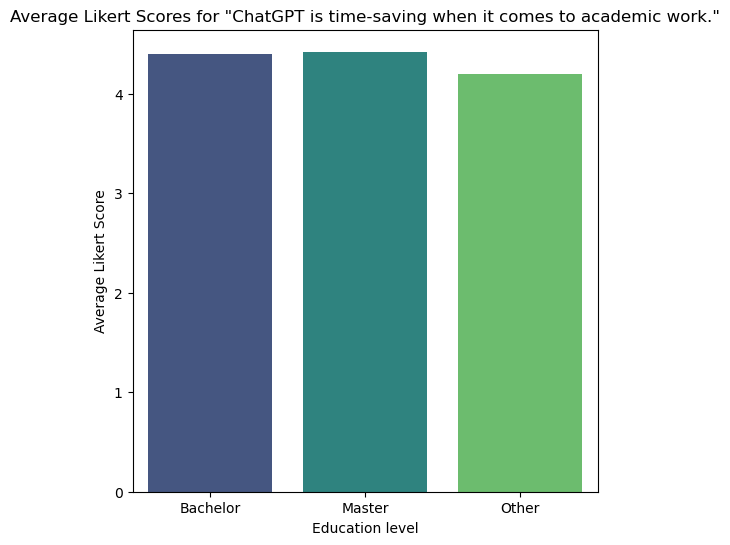

  Education level  Likert_Score
0        Bachelor      4.400000
1          Master      4.421053
2           Other      4.200000


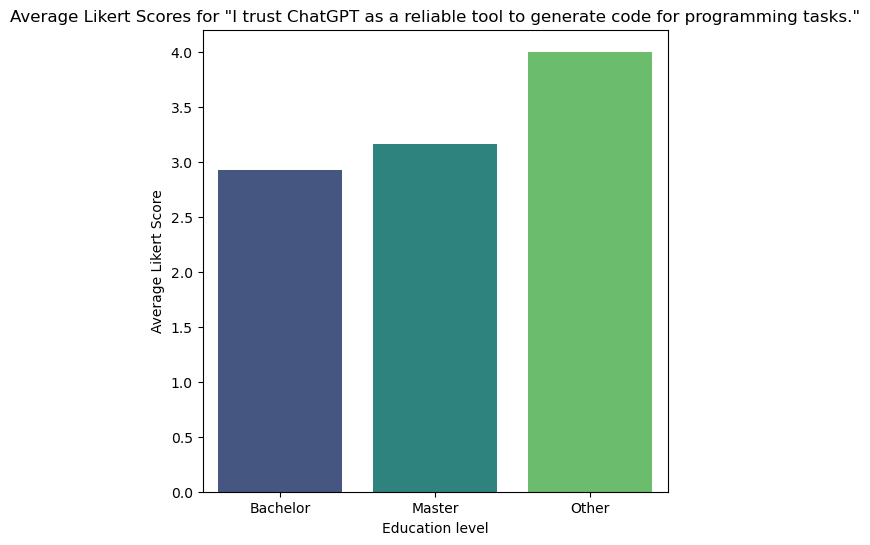

  Education level  Likert_Score
0        Bachelor      2.927273
1          Master      3.157895
2           Other      4.000000


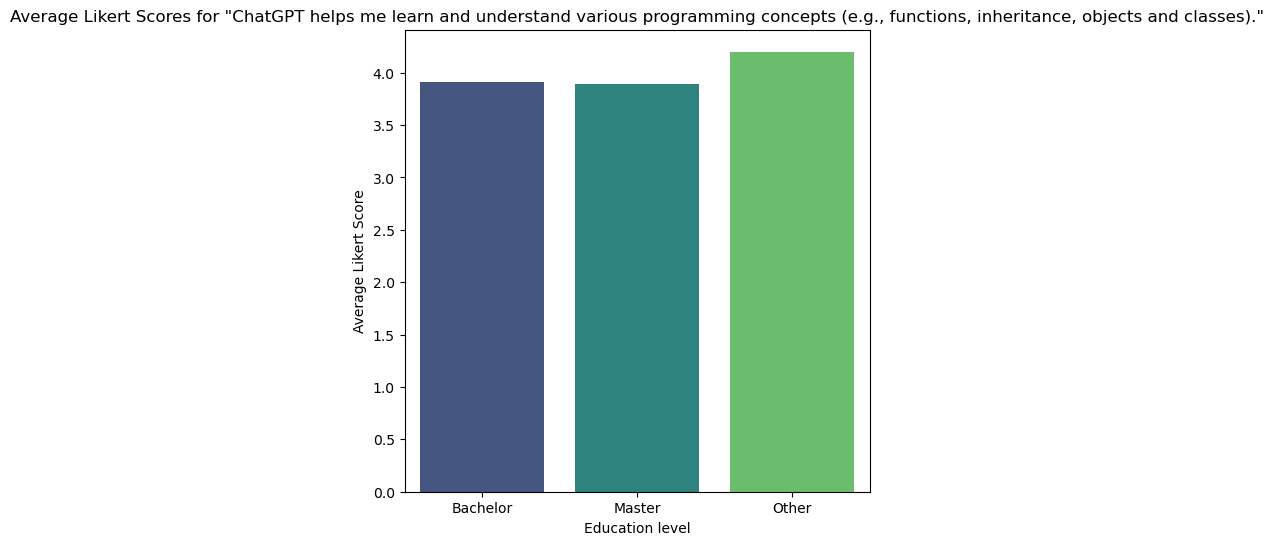

  Education level  Likert_Score
0        Bachelor      3.909091
1          Master      3.894737
2           Other      4.200000


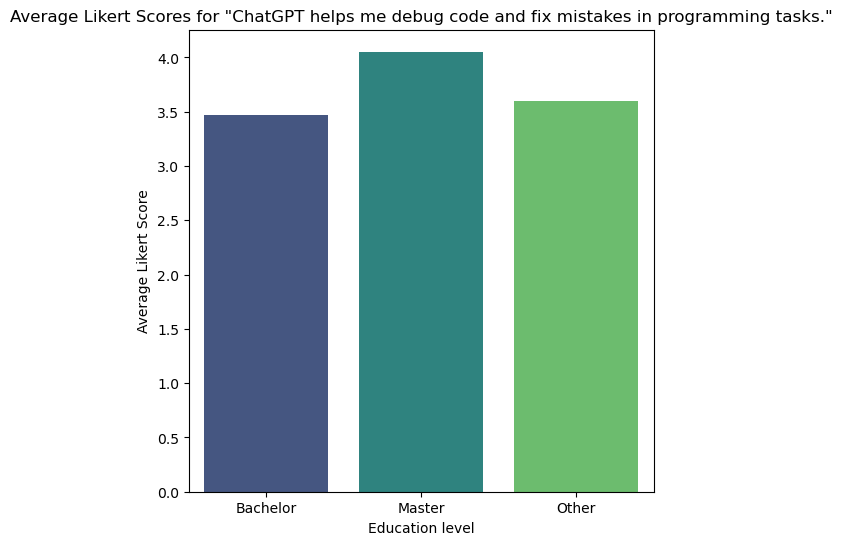

  Education level  Likert_Score
0        Bachelor      3.472727
1          Master      4.052632
2           Other      3.600000


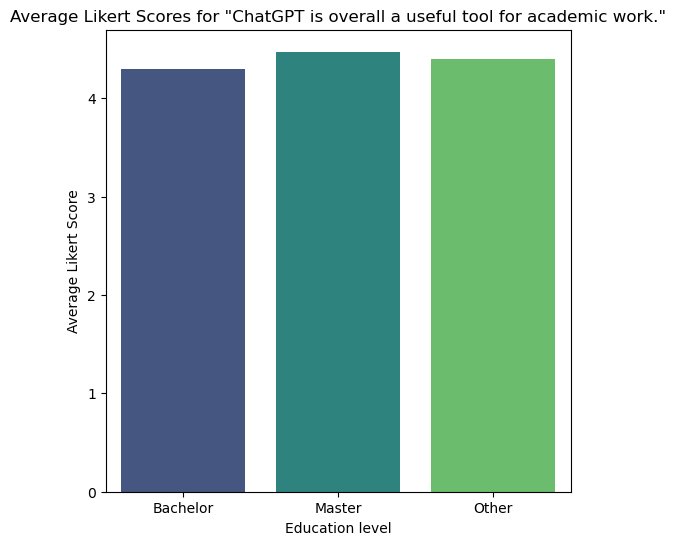

  Education level  Likert_Score
0        Bachelor      4.296296
1          Master      4.473684
2           Other      4.400000


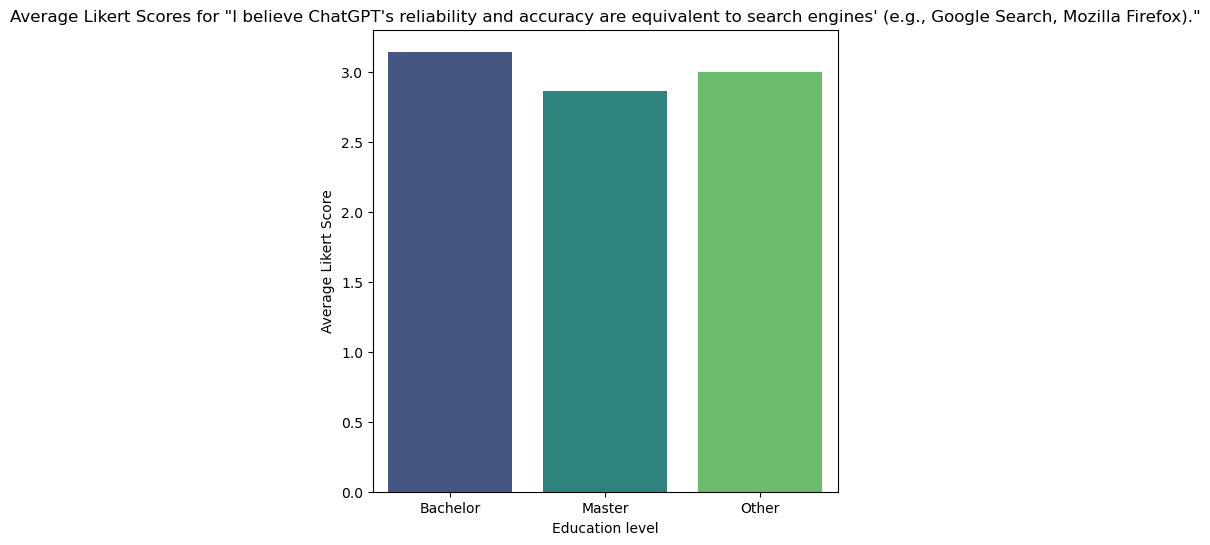

  Education level  Likert_Score
0        Bachelor      3.146341
1          Master      2.866667
2           Other      3.000000


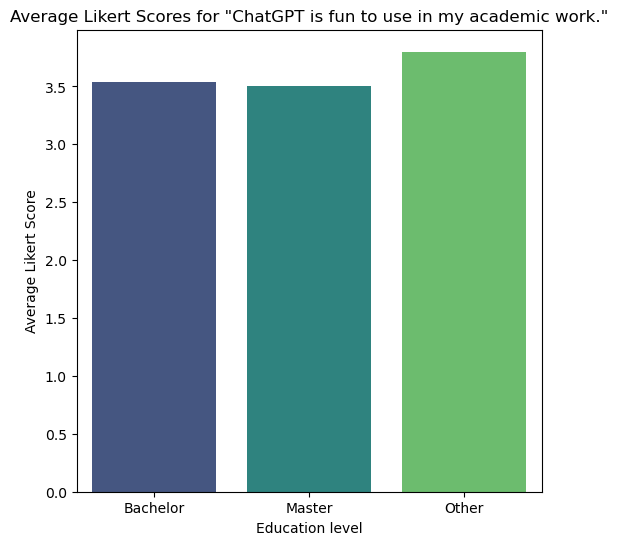

  Education level  Likert_Score
0        Bachelor      3.536585
1          Master      3.500000
2           Other      3.800000


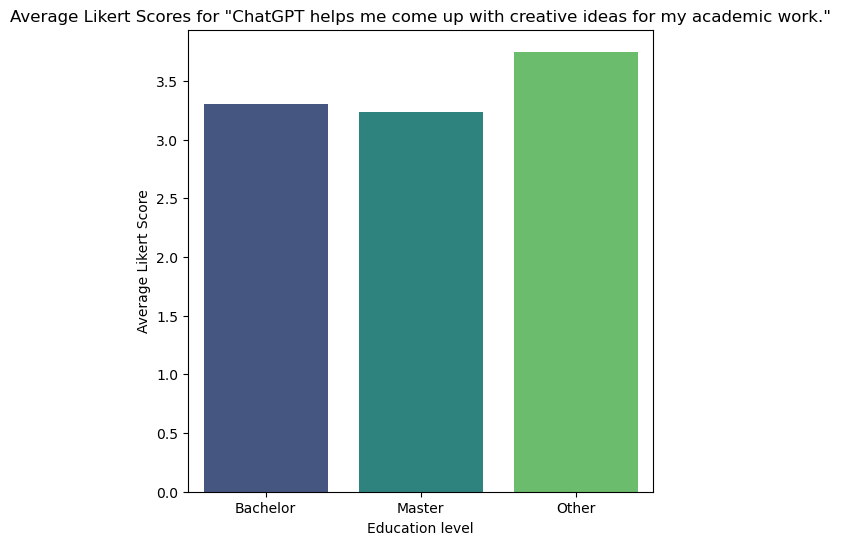

  Education level  Likert_Score
0        Bachelor      3.307692
1          Master      3.235294
2           Other      3.750000


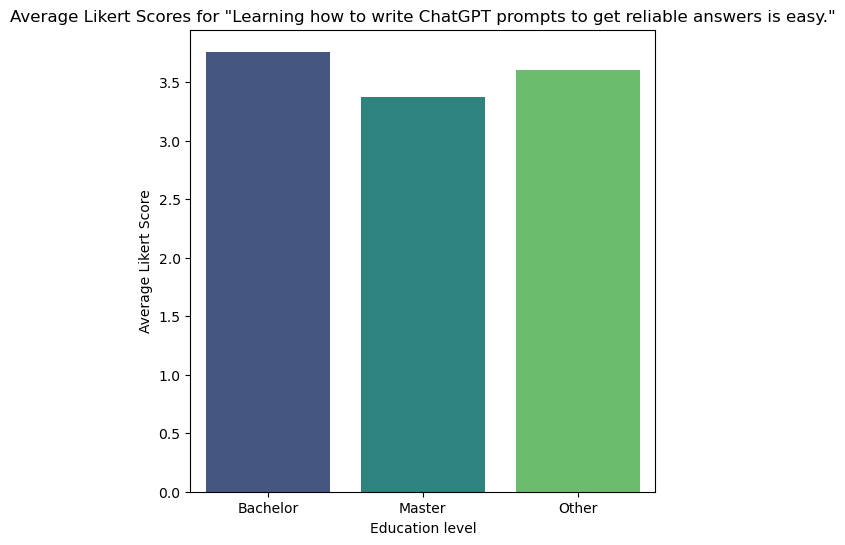

  Education level  Likert_Score
0        Bachelor      3.759259
1          Master      3.368421
2           Other      3.600000


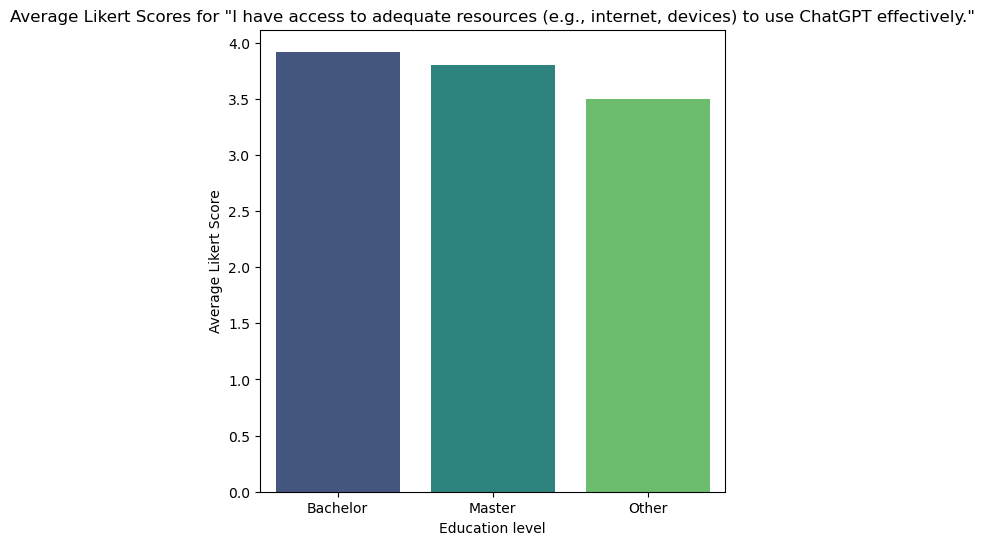

  Education level  Likert_Score
0        Bachelor          3.92
1          Master          3.80
2           Other          3.50


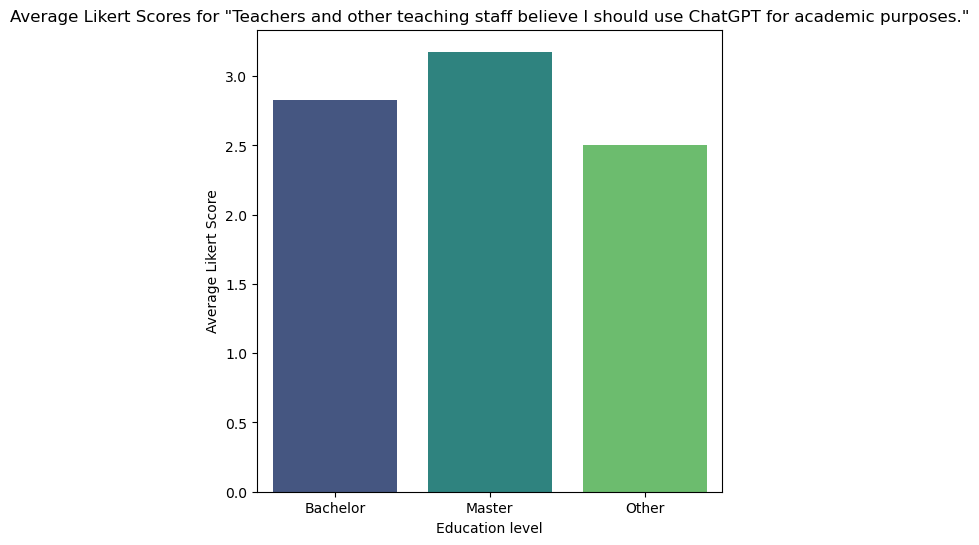

  Education level  Likert_Score
0        Bachelor      2.826087
1          Master      3.176471
2           Other      2.500000


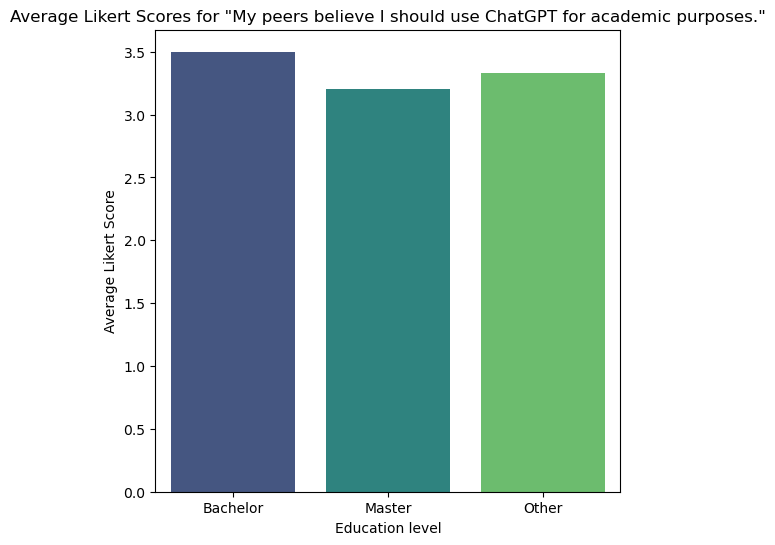

  Education level  Likert_Score
0        Bachelor      3.500000
1          Master      3.200000
2           Other      3.333333


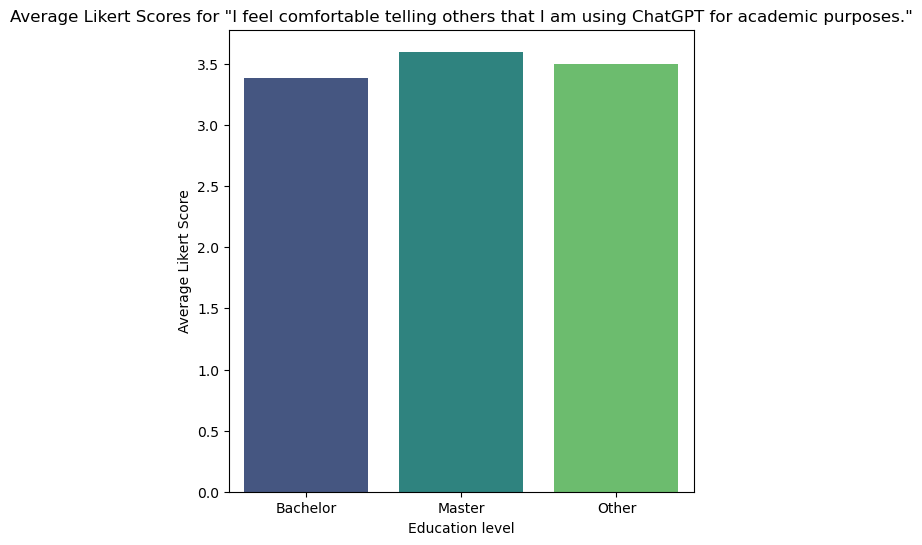

  Education level  Likert_Score
0        Bachelor      3.380952
1          Master      3.600000
2           Other      3.500000


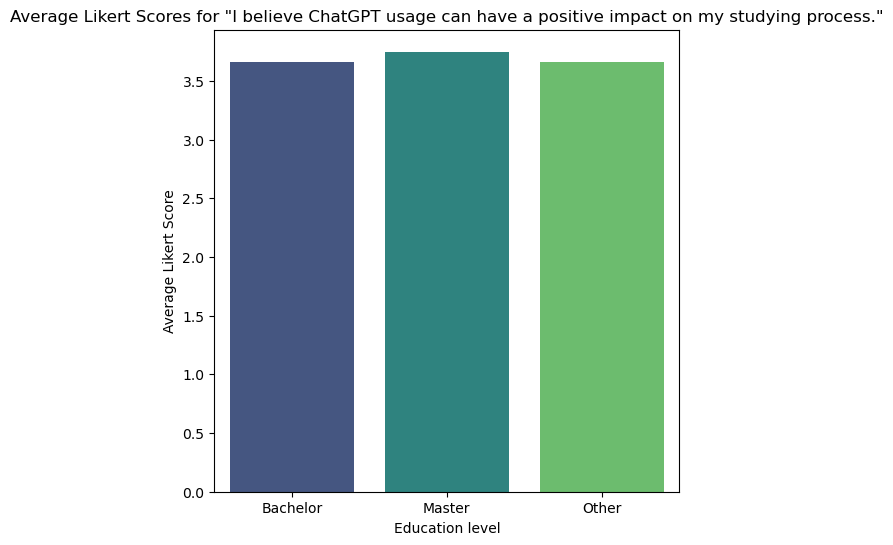

  Education level  Likert_Score
0        Bachelor      3.666667
1          Master      3.750000
2           Other      3.666667


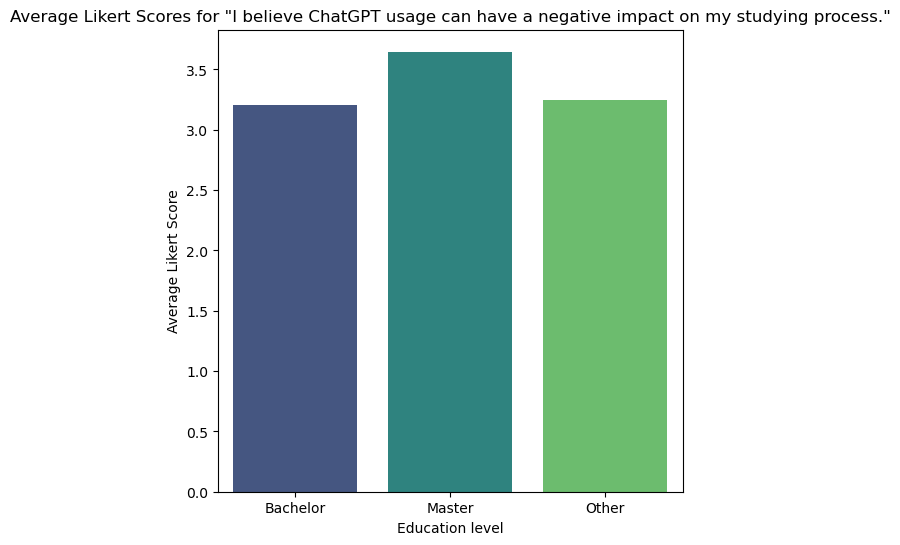

  Education level  Likert_Score
0        Bachelor      3.204545
1          Master      3.647059
2           Other      3.250000


In [6]:
data['Education level'] = data["What degree are you pursuing? "].map({'Bachelor': 'Bachelor', 'Master': 'Master', 'Other': 'Other'})

# Loop through each question and plot the bar plot
for question in questions:
    data['Likert_Score'] = data[question].map(likert_scale)

    data_clean = data.dropna(subset=['Education level', 'Likert_Score'])
    average_scores = data_clean.groupby('Education level')['Likert_Score'].mean().reset_index()

    plt.figure(figsize=(6, 6))
    sns.barplot(x='Education level', y='Likert_Score', data=average_scores, palette='viridis')
    plt.title(f'Average Likert Scores for "{question}"')
    plt.xlabel('Education level')
    plt.ylabel('Average Likert Score')

    plt.show()
    print(average_scores)


Barplots of average likert scores depending on programming experience

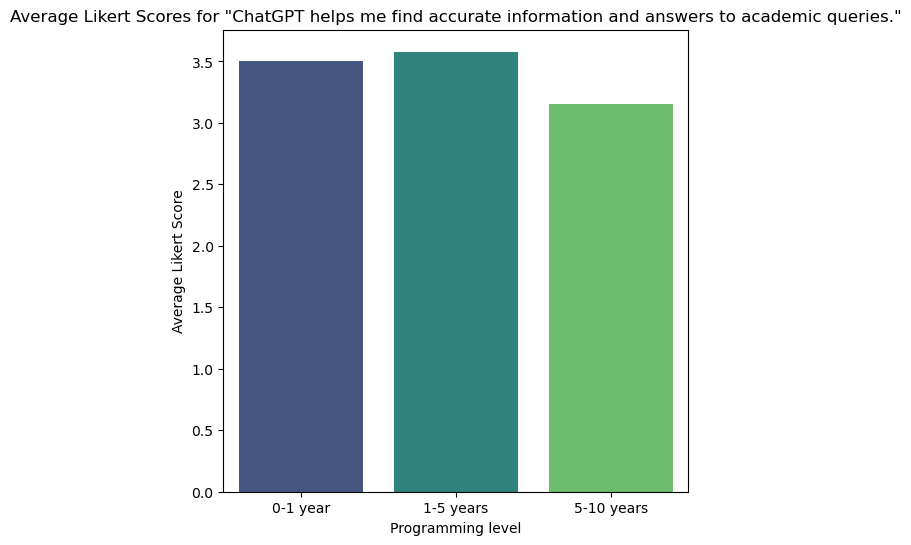

  Programming level  Likert_Score
0          0-1 year      3.500000
1         1-5 years      3.578947
2        5-10 years      3.153846


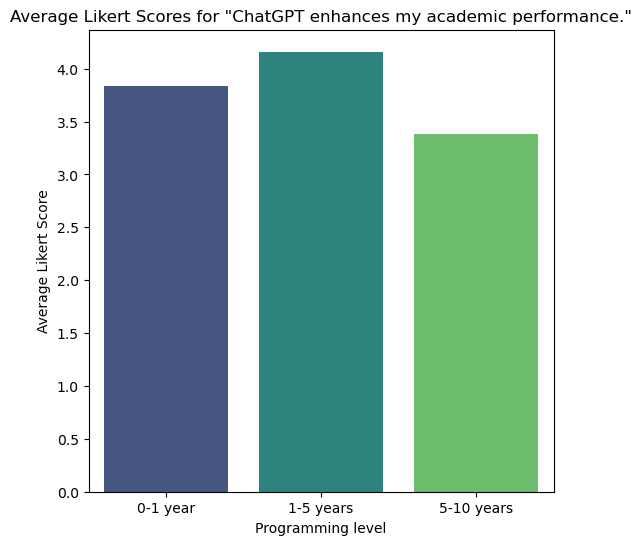

  Programming level  Likert_Score
0          0-1 year      3.833333
1         1-5 years      4.160714
2        5-10 years      3.384615


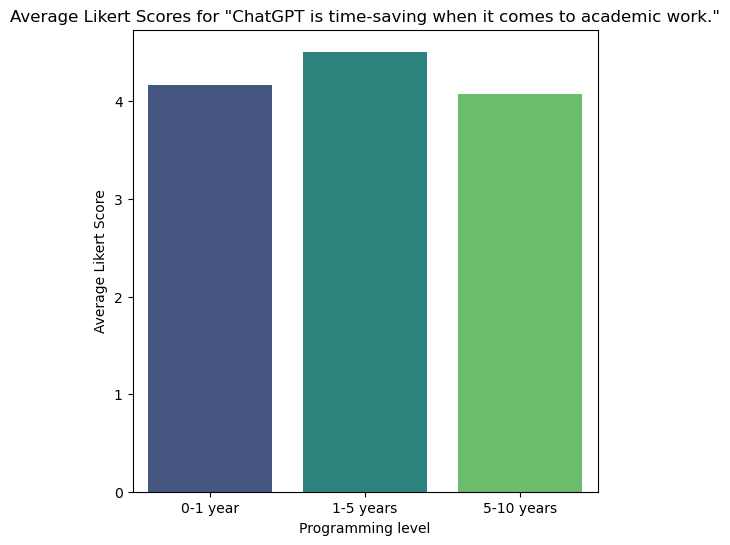

  Programming level  Likert_Score
0          0-1 year      4.166667
1         1-5 years      4.508772
2        5-10 years      4.076923


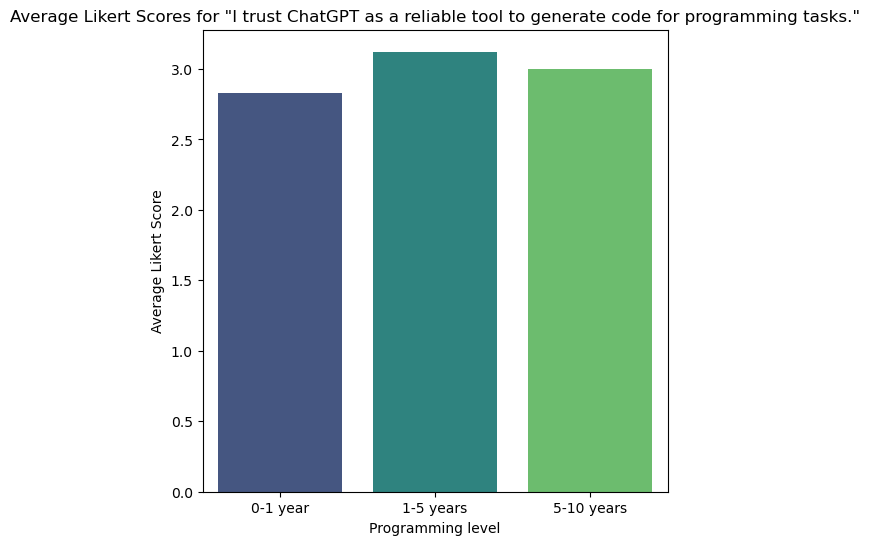

  Programming level  Likert_Score
0          0-1 year      2.833333
1         1-5 years      3.122807
2        5-10 years      3.000000


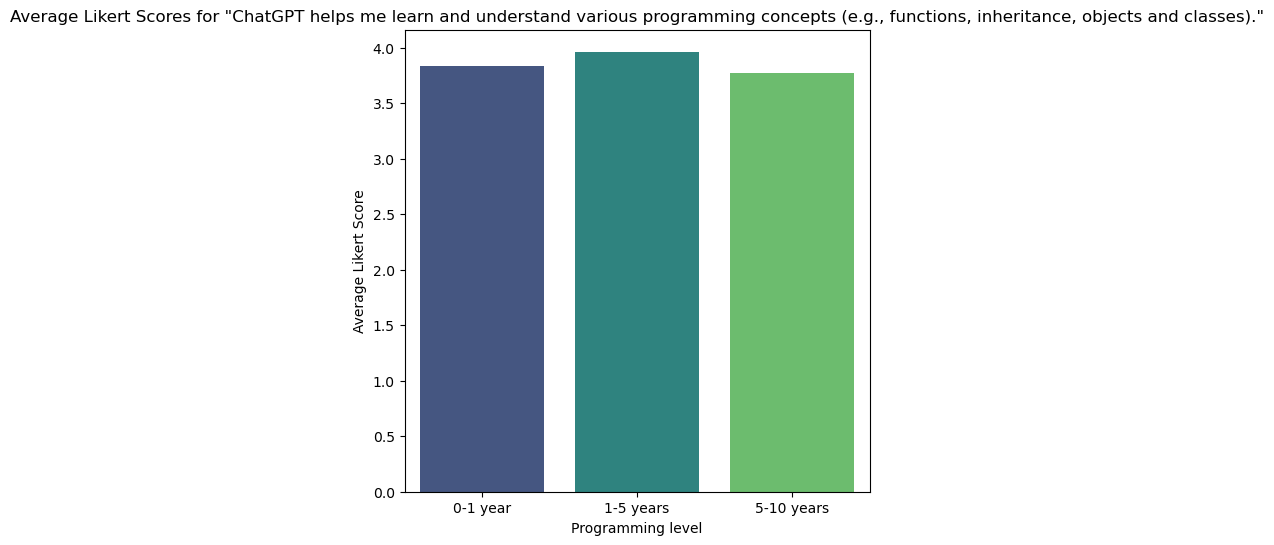

  Programming level  Likert_Score
0          0-1 year      3.833333
1         1-5 years      3.964912
2        5-10 years      3.769231


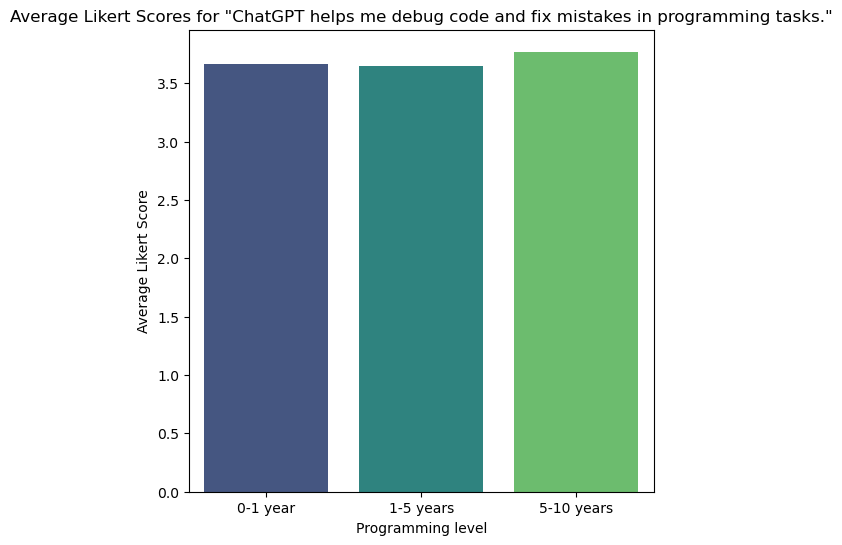

  Programming level  Likert_Score
0          0-1 year      3.666667
1         1-5 years      3.649123
2        5-10 years      3.769231


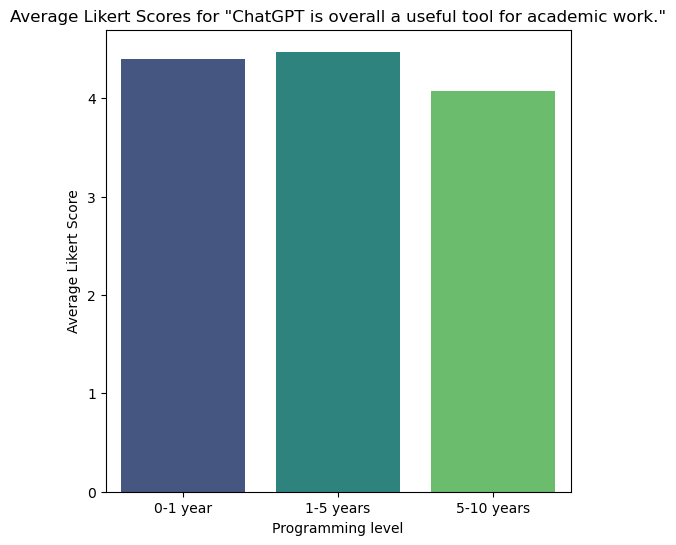

  Programming level  Likert_Score
0          0-1 year      4.400000
1         1-5 years      4.473684
2        5-10 years      4.076923


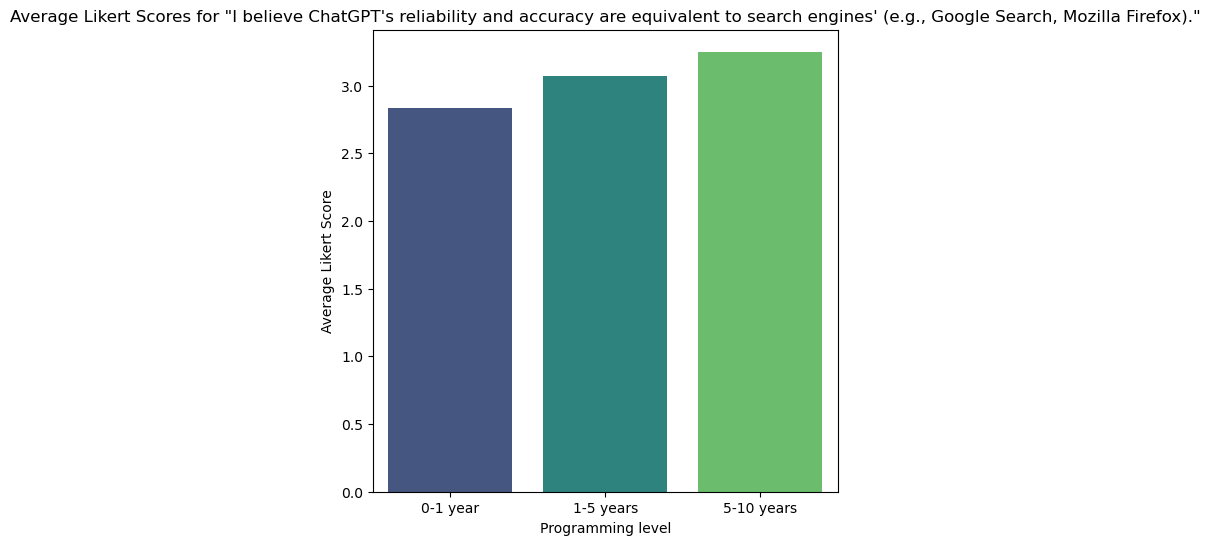

  Programming level  Likert_Score
0          0-1 year      2.833333
1         1-5 years      3.068182
2        5-10 years      3.250000


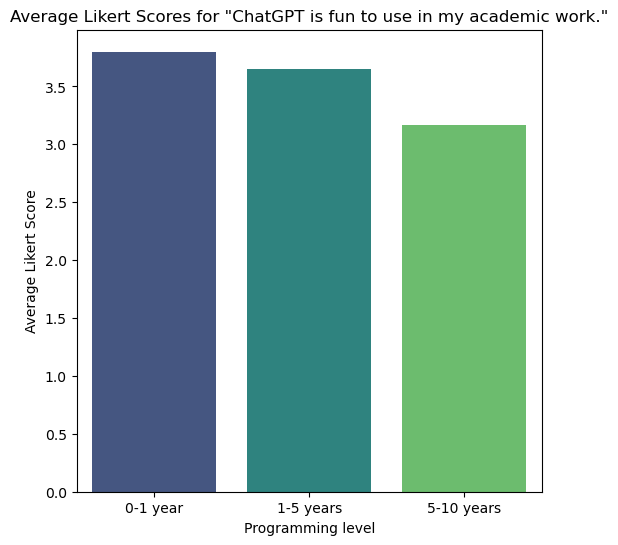

  Programming level  Likert_Score
0          0-1 year      3.800000
1         1-5 years      3.651163
2        5-10 years      3.166667


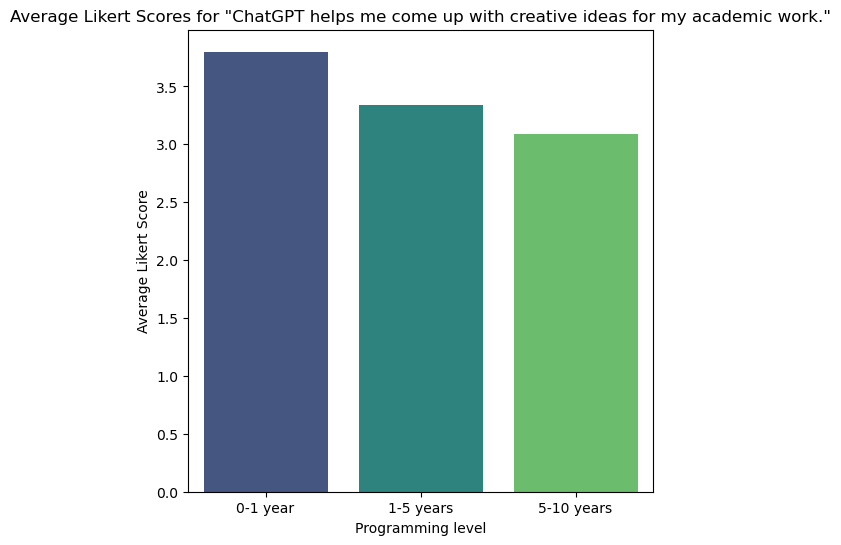

  Programming level  Likert_Score
0          0-1 year      3.800000
1         1-5 years      3.341463
2        5-10 years      3.090909


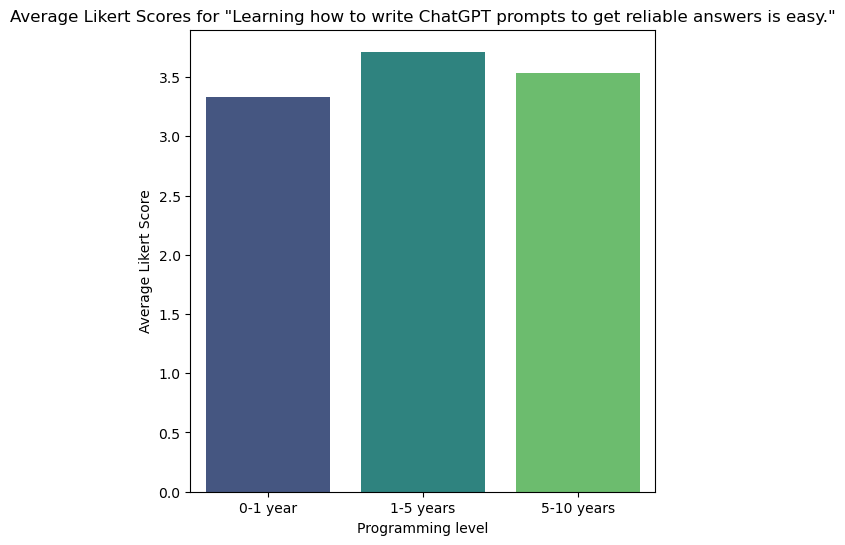

  Programming level  Likert_Score
0          0-1 year      3.333333
1         1-5 years      3.714286
2        5-10 years      3.538462


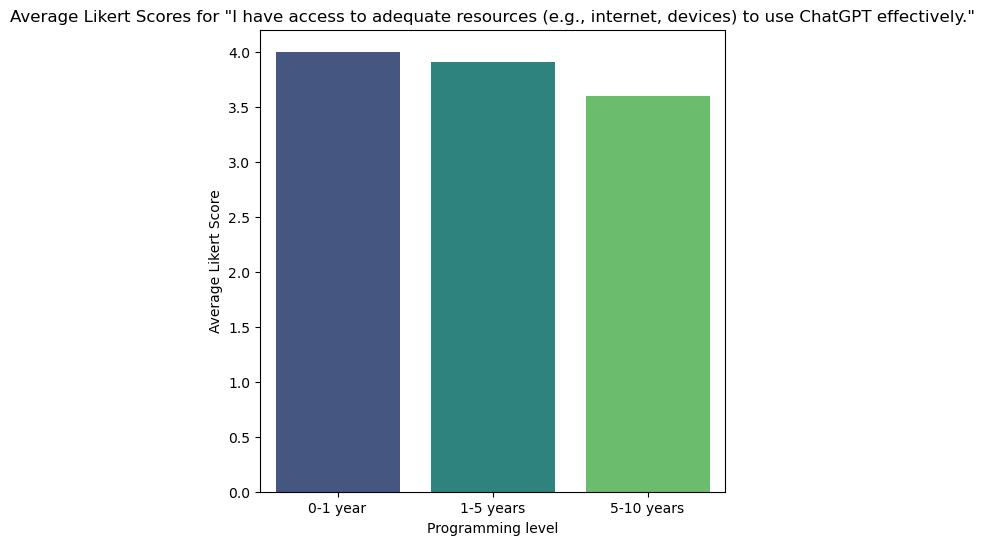

  Programming level  Likert_Score
0          0-1 year      4.000000
1         1-5 years      3.909091
2        5-10 years      3.600000


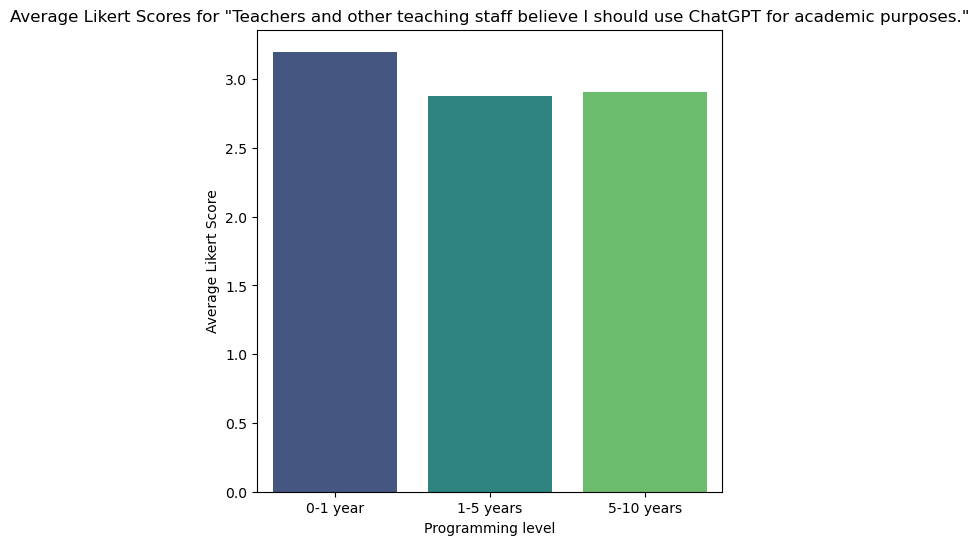

  Programming level  Likert_Score
0          0-1 year      3.200000
1         1-5 years      2.877551
2        5-10 years      2.909091


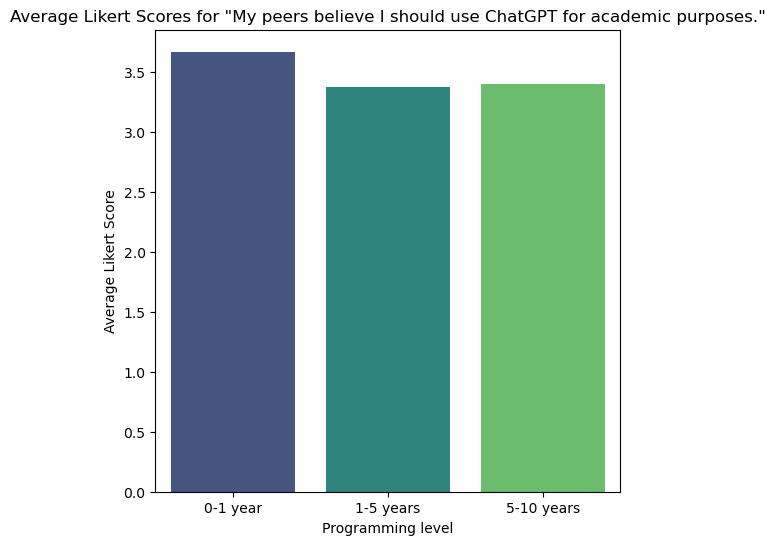

  Programming level  Likert_Score
0          0-1 year      3.666667
1         1-5 years      3.375000
2        5-10 years      3.400000


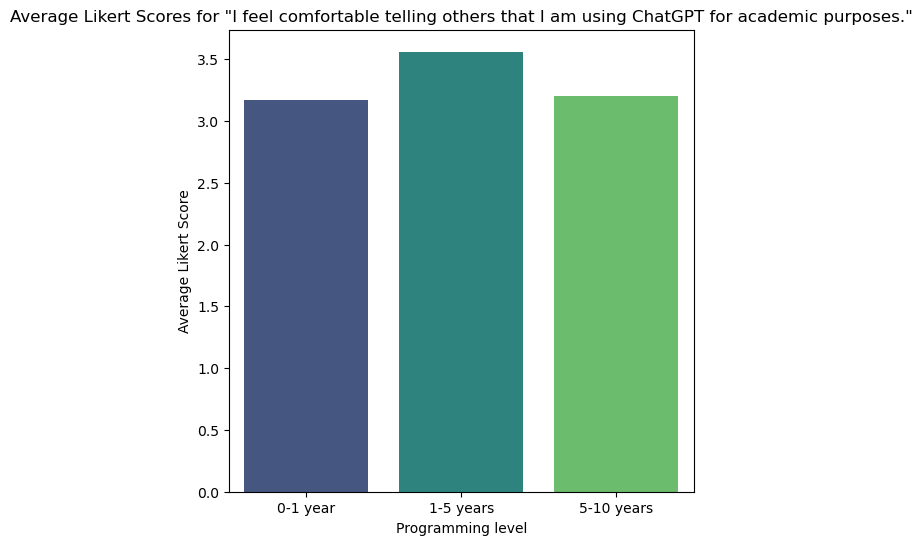

  Programming level  Likert_Score
0          0-1 year      3.166667
1         1-5 years      3.560976
2        5-10 years      3.200000


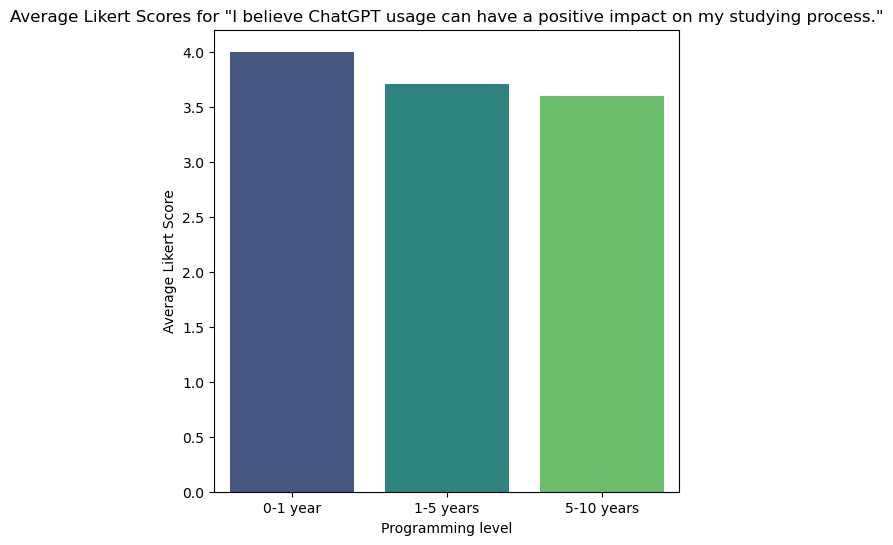

  Programming level  Likert_Score
0          0-1 year      4.000000
1         1-5 years      3.703704
2        5-10 years      3.600000


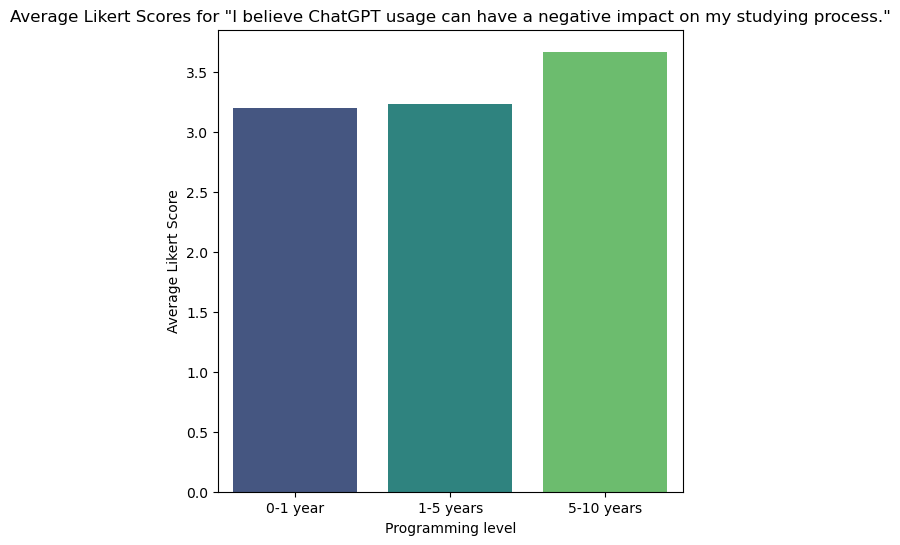

  Programming level  Likert_Score
0          0-1 year      3.200000
1         1-5 years      3.234043
2        5-10 years      3.666667


In [7]:
data['Programming level'] = data['What is your programming experience?'].map({'0-1 year': '0-1 year', '1-5 years': '1-5 years', '5-10 years': '5-10 years'})

for question in questions:
    data['Likert_Score'] = data[question].map(likert_scale)

    data_clean = data.dropna(subset=['Programming level', 'Likert_Score'])
    average_scores = data_clean.groupby('Programming level')['Likert_Score'].mean().reset_index()

    plt.figure(figsize=(6, 6))
    sns.barplot(x='Programming level', y='Likert_Score', data=average_scores, palette='viridis')
    plt.title(f'Average Likert Scores for "{question}"')
    plt.xlabel('Programming level')
    plt.ylabel('Average Likert Score')

    plt.show()
    print(average_scores)

Barplots of average likert scores depending on age

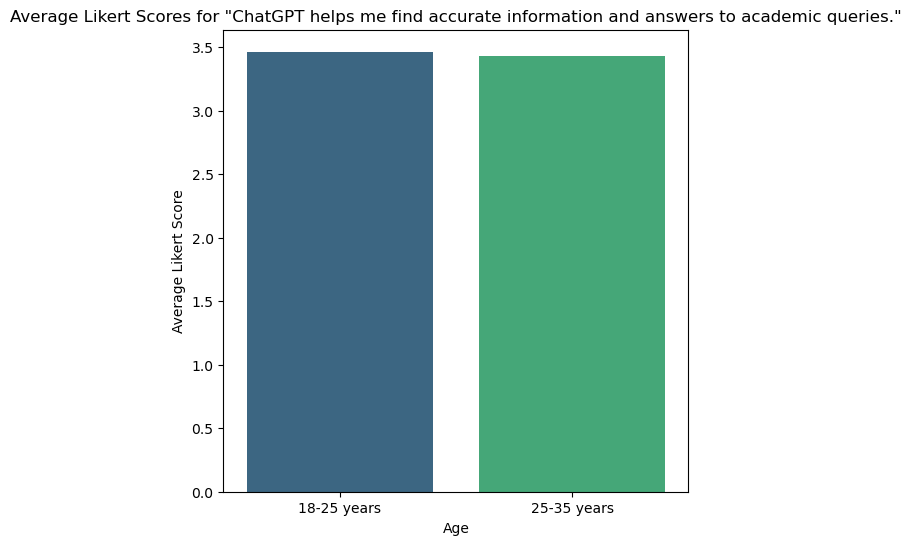

           Age  Likert_Score
0  18-25 years      3.464789
1  25-35 years      3.428571


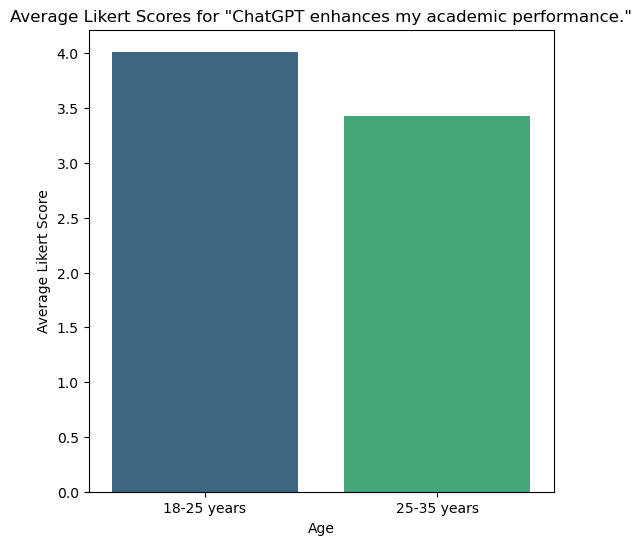

           Age  Likert_Score
0  18-25 years      4.014286
1  25-35 years      3.428571


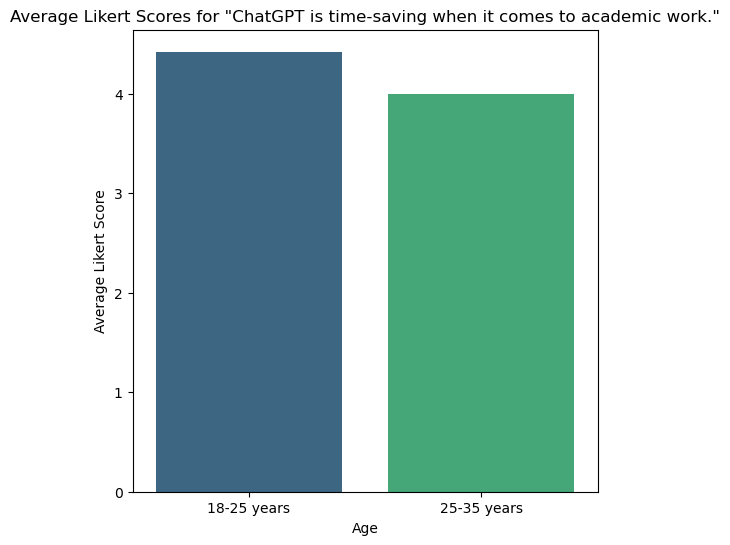

           Age  Likert_Score
0  18-25 years      4.422535
1  25-35 years      4.000000


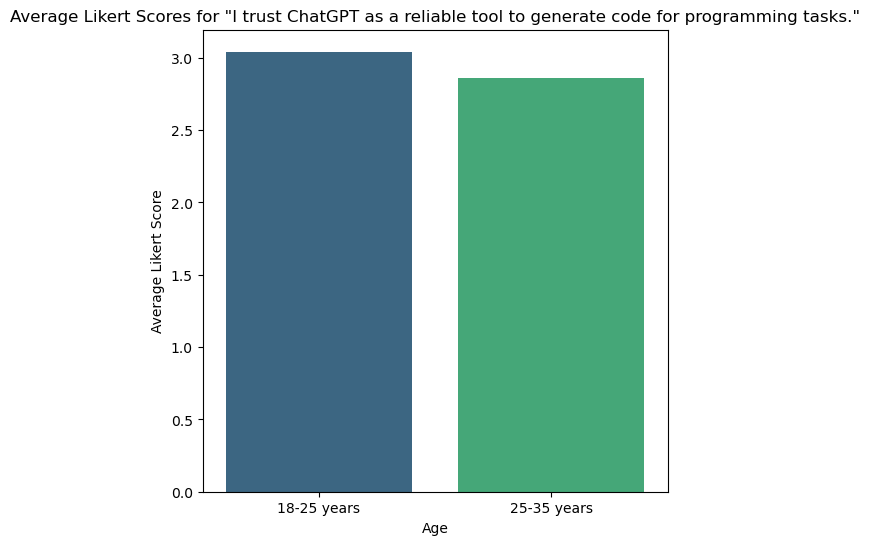

           Age  Likert_Score
0  18-25 years      3.042254
1  25-35 years      2.857143


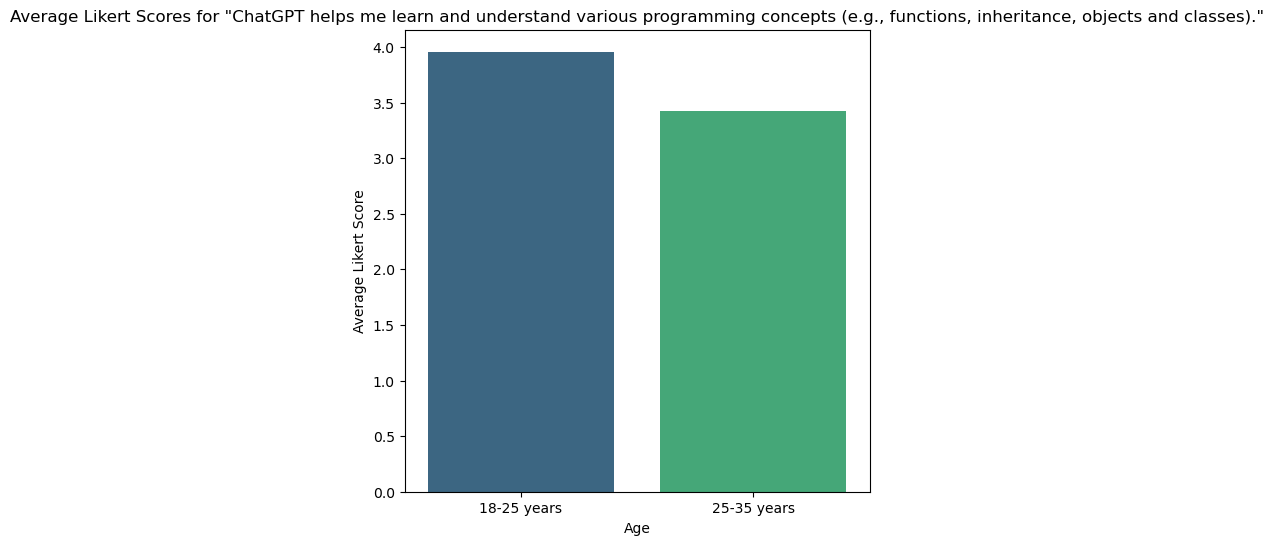

           Age  Likert_Score
0  18-25 years      3.957746
1  25-35 years      3.428571


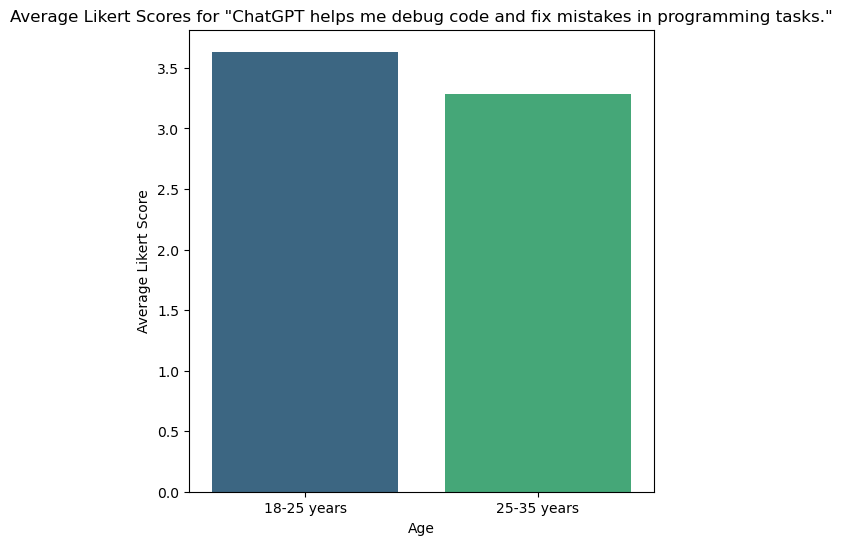

           Age  Likert_Score
0  18-25 years      3.633803
1  25-35 years      3.285714


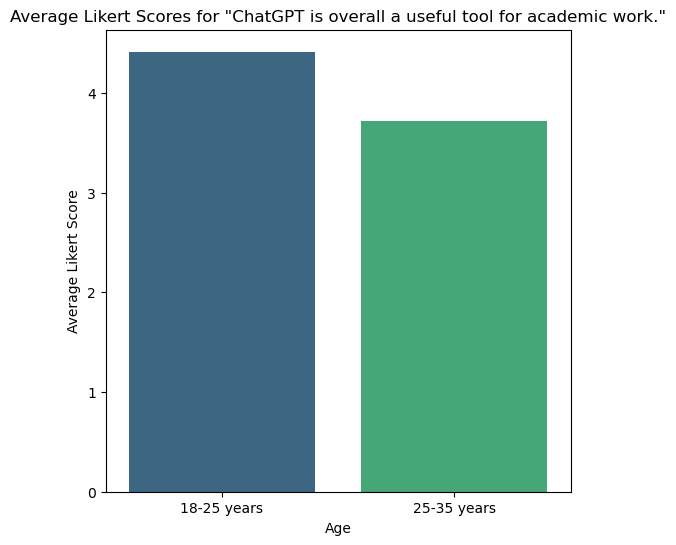

           Age  Likert_Score
0  18-25 years      4.414286
1  25-35 years      3.714286


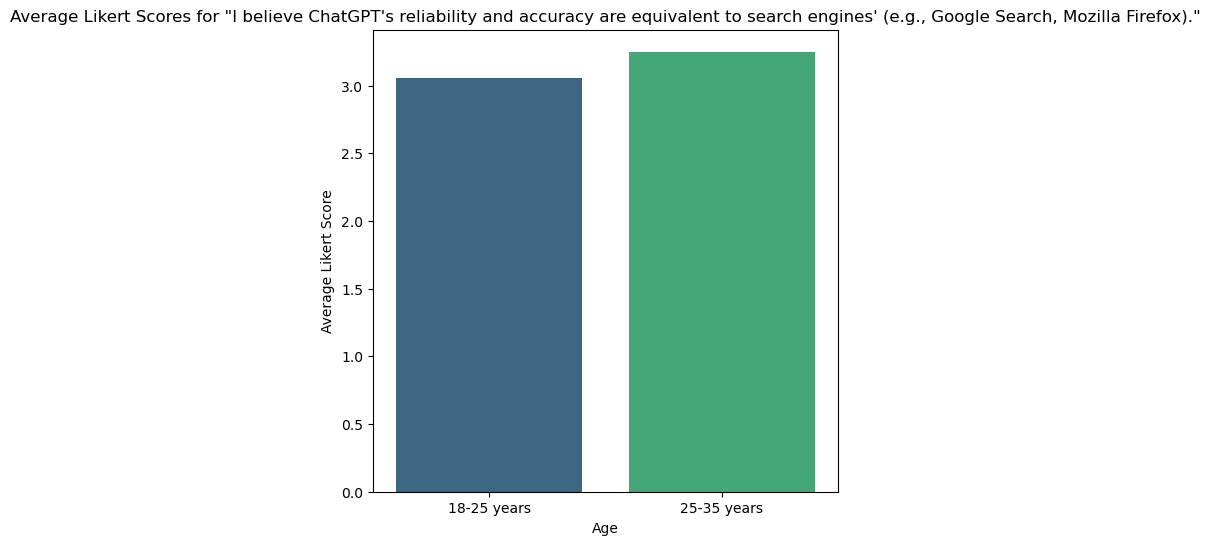

           Age  Likert_Score
0  18-25 years      3.053571
1  25-35 years      3.250000


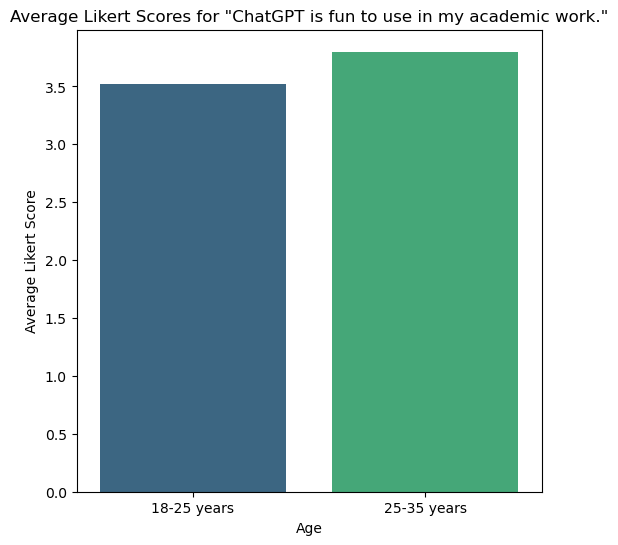

           Age  Likert_Score
0  18-25 years      3.517857
1  25-35 years      3.800000


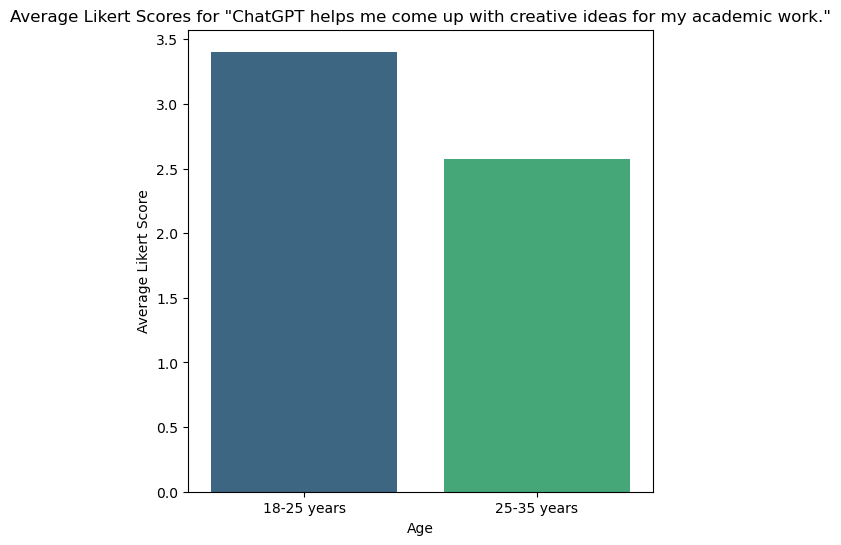

           Age  Likert_Score
0  18-25 years      3.403846
1  25-35 years      2.571429


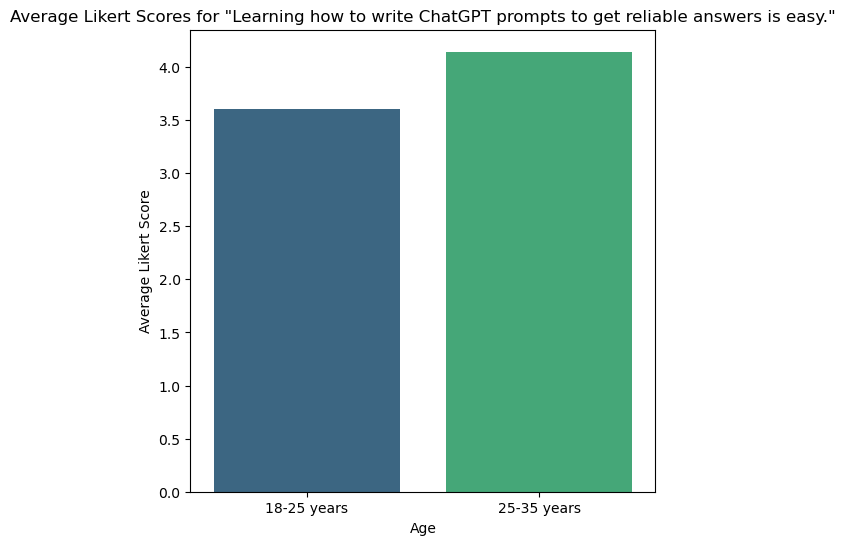

           Age  Likert_Score
0  18-25 years      3.600000
1  25-35 years      4.142857


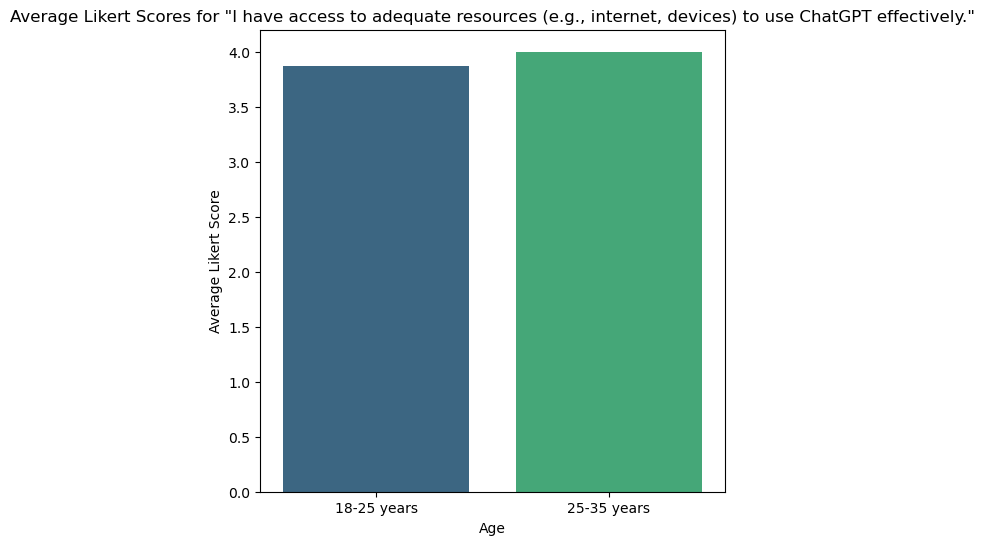

           Age  Likert_Score
0  18-25 years      3.866667
1  25-35 years      4.000000


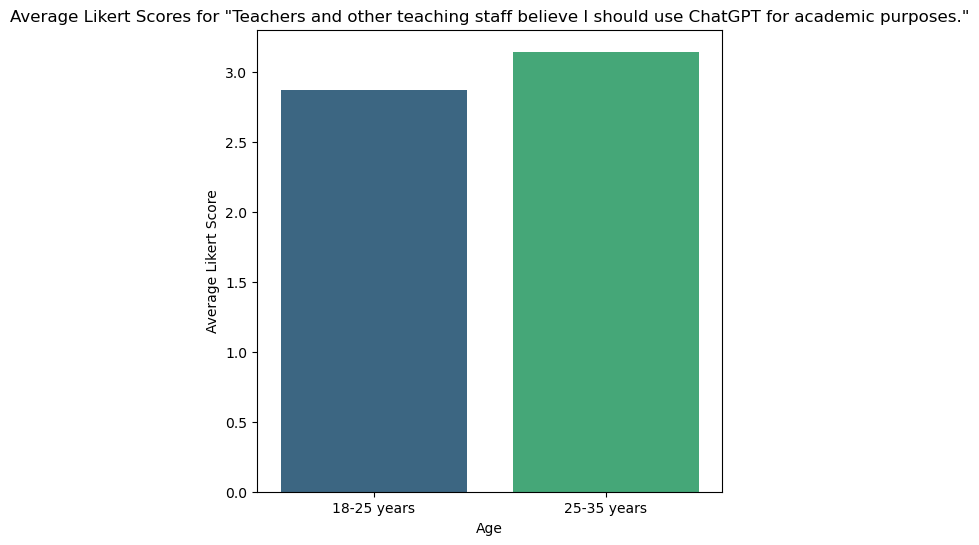

           Age  Likert_Score
0  18-25 years      2.866667
1  25-35 years      3.142857


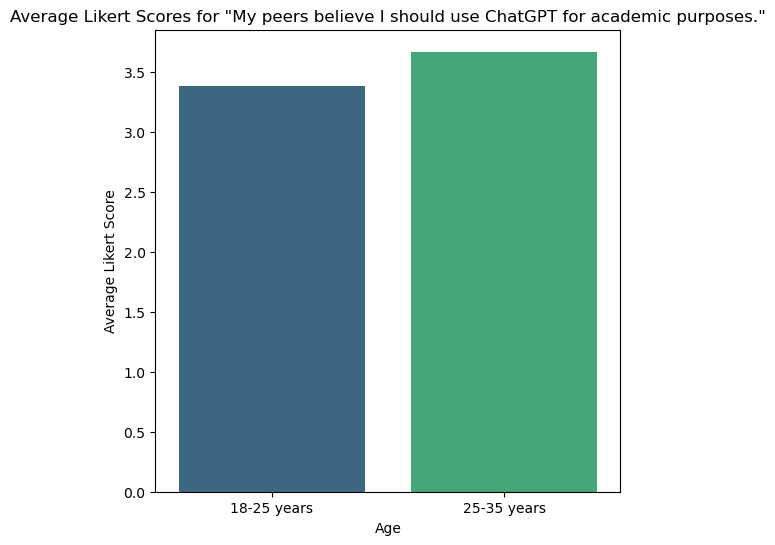

           Age  Likert_Score
0  18-25 years      3.384615
1  25-35 years      3.666667


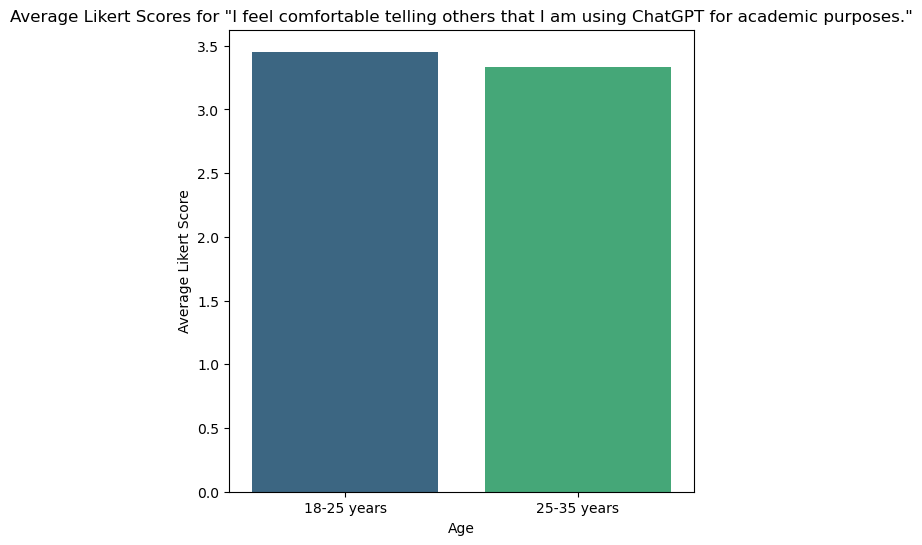

           Age  Likert_Score
0  18-25 years      3.452830
1  25-35 years      3.333333


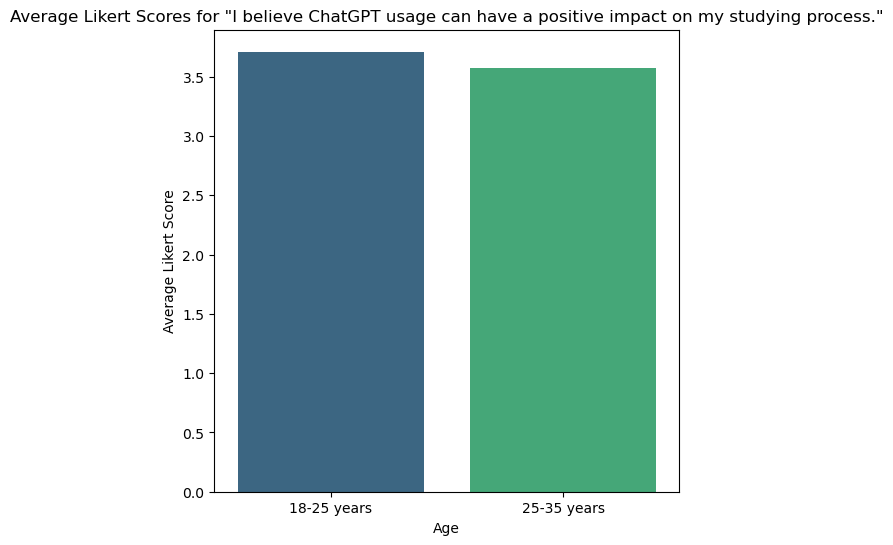

           Age  Likert_Score
0  18-25 years      3.710526
1  25-35 years      3.571429


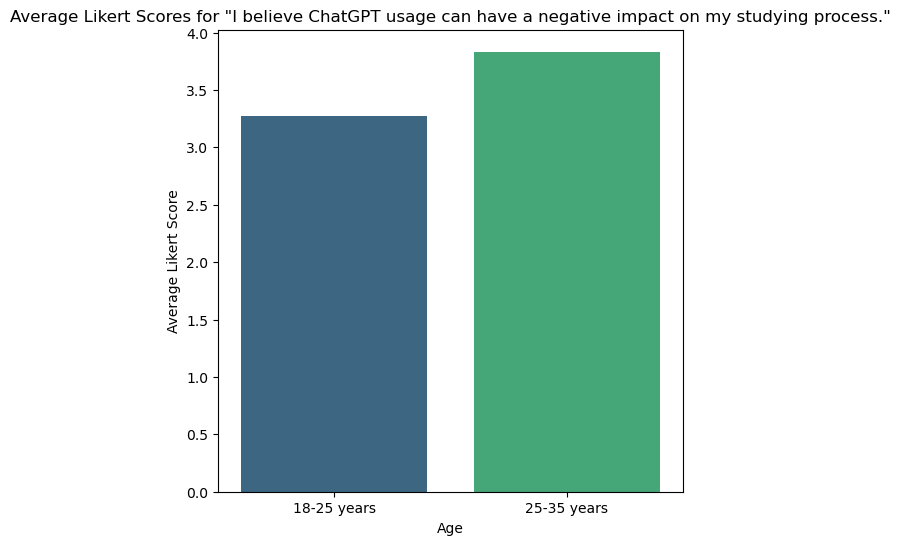

           Age  Likert_Score
0  18-25 years      3.271186
1  25-35 years      3.833333


In [8]:
data['Age'] = data['What is your age?'].map({'18-25 years': '18-25 years', '25-35 years': '25-35 years'})

for question in questions:
    data['Likert_Score'] = data[question].map(likert_scale)

    data_clean = data.dropna(subset=['Age', 'Likert_Score'])

    average_scores = data_clean.groupby('Age')['Likert_Score'].mean().reset_index()

    plt.figure(figsize=(6, 6))
    sns.barplot(x='Age', y='Likert_Score', data=average_scores, palette='viridis')
    plt.title(f'Average Likert Scores for "{question}"')
    plt.xlabel('Age')
    plt.ylabel('Average Likert Score')

    plt.show()
    print(average_scores)

Barplots of average likert scores depending on country

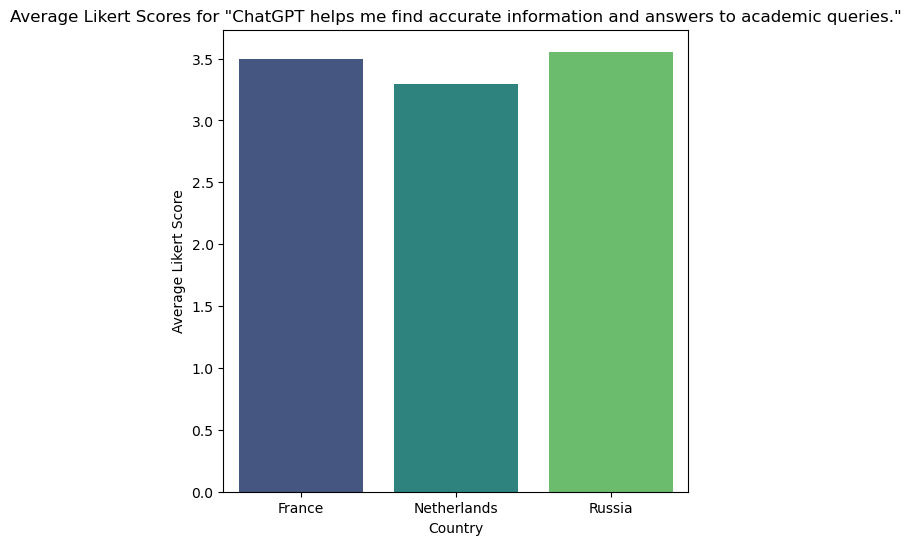

       Country  Likert_Score
0       France      3.500000
1  Netherlands      3.294118
2       Russia      3.555556


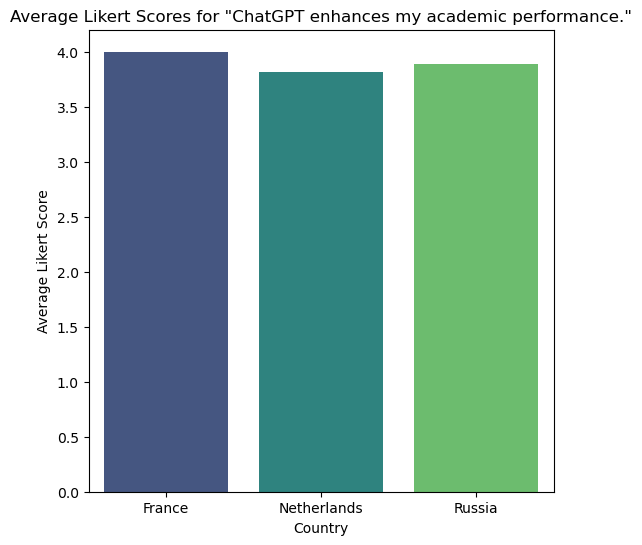

       Country  Likert_Score
0       France      4.000000
1  Netherlands      3.818182
2       Russia      3.888889


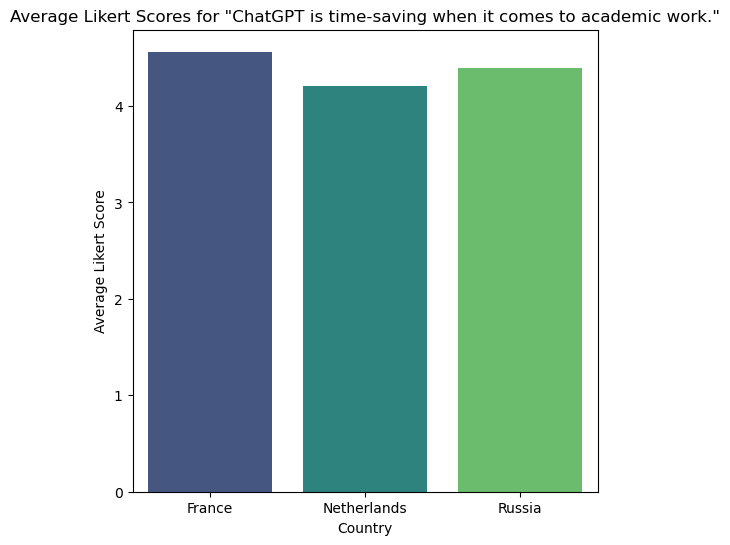

       Country  Likert_Score
0       France      4.562500
1  Netherlands      4.205882
2       Russia      4.388889


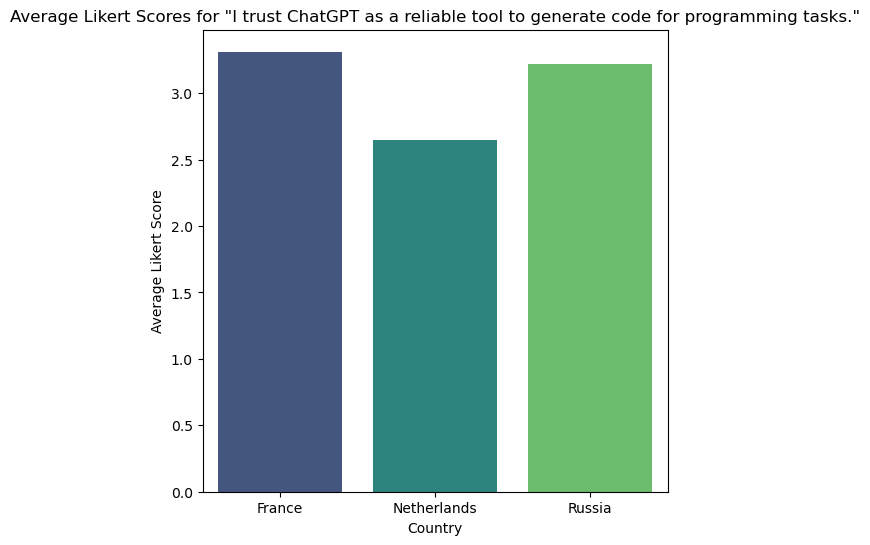

       Country  Likert_Score
0       France      3.312500
1  Netherlands      2.647059
2       Russia      3.222222


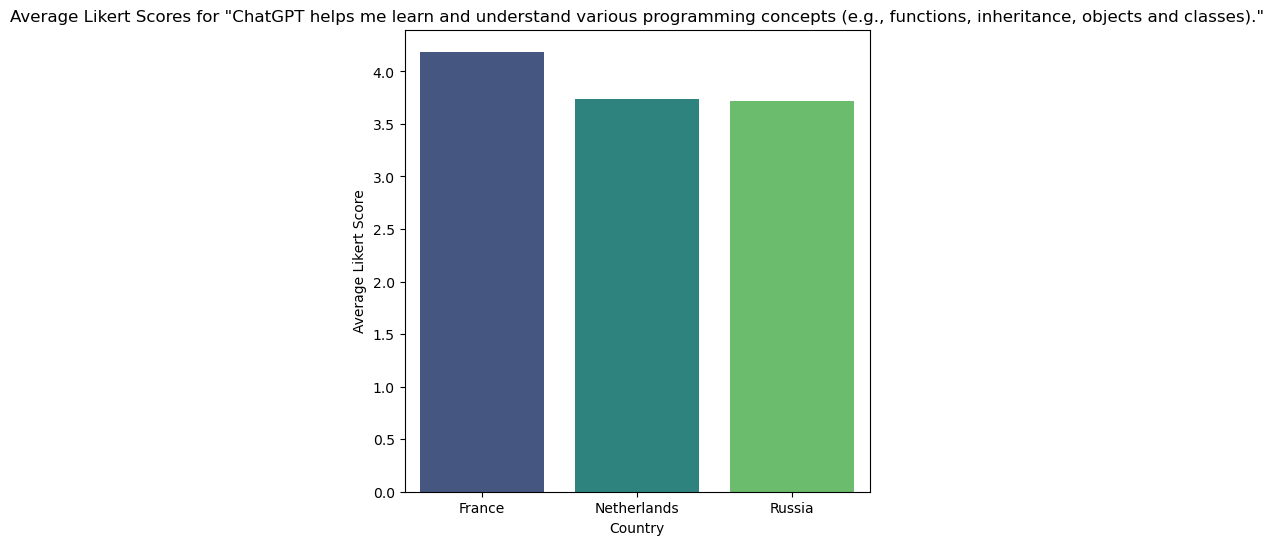

       Country  Likert_Score
0       France      4.187500
1  Netherlands      3.735294
2       Russia      3.722222


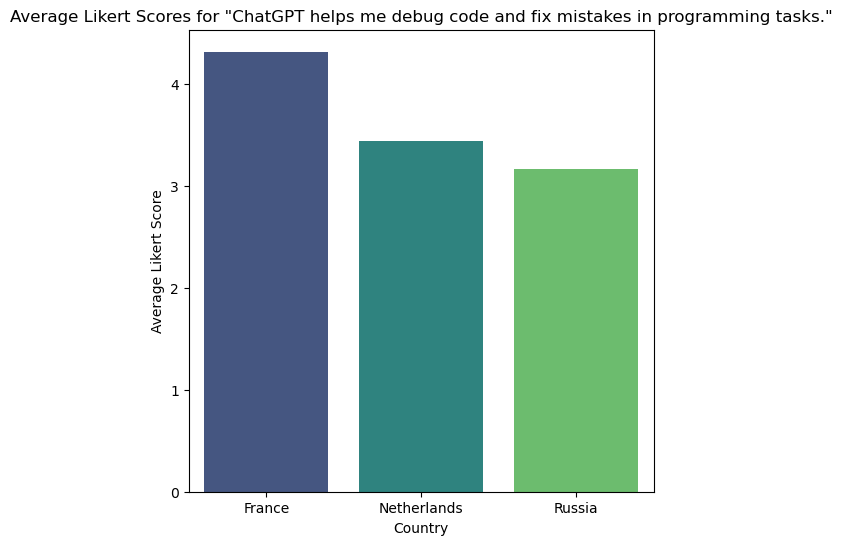

       Country  Likert_Score
0       France      4.312500
1  Netherlands      3.441176
2       Russia      3.166667


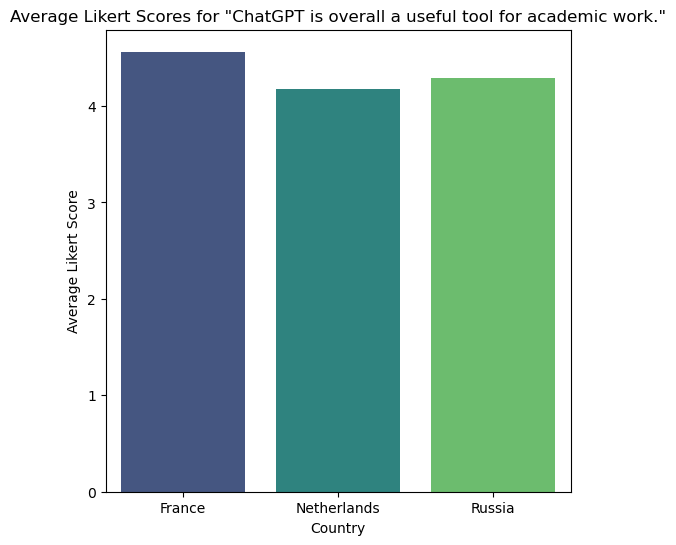

       Country  Likert_Score
0       France      4.562500
1  Netherlands      4.176471
2       Russia      4.294118


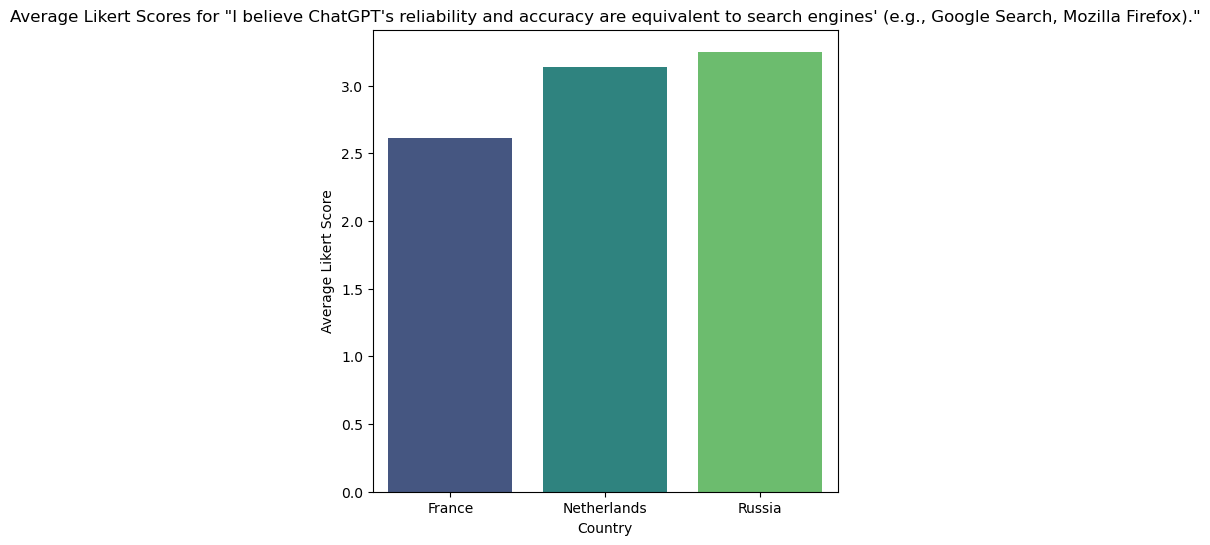

       Country  Likert_Score
0       France      2.615385
1  Netherlands      3.136364
2       Russia      3.250000


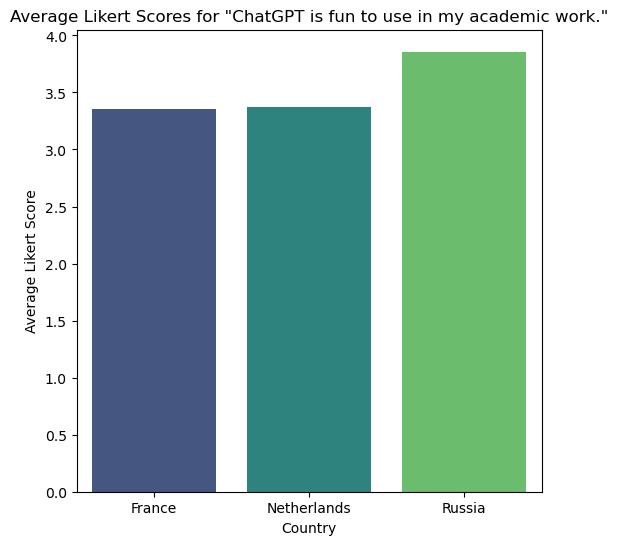

       Country  Likert_Score
0       France      3.357143
1  Netherlands      3.370370
2       Russia      3.857143


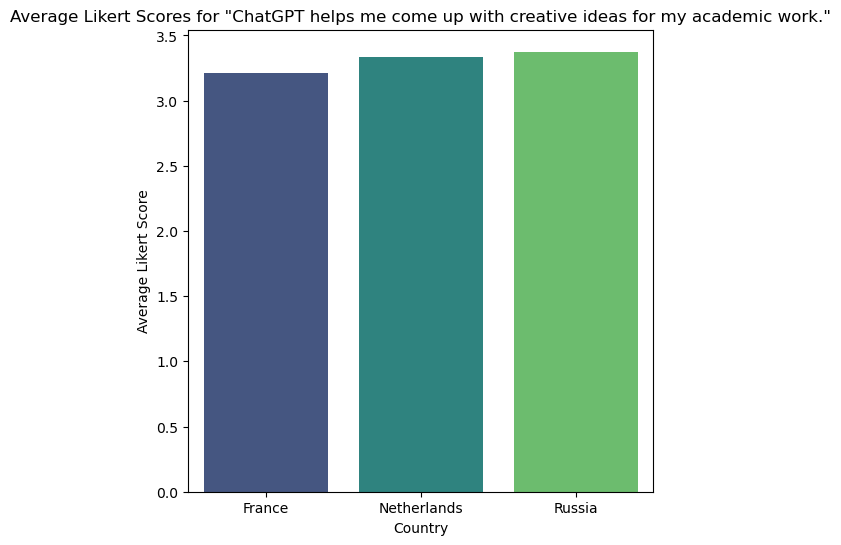

       Country  Likert_Score
0       France      3.214286
1  Netherlands      3.333333
2       Russia      3.375000


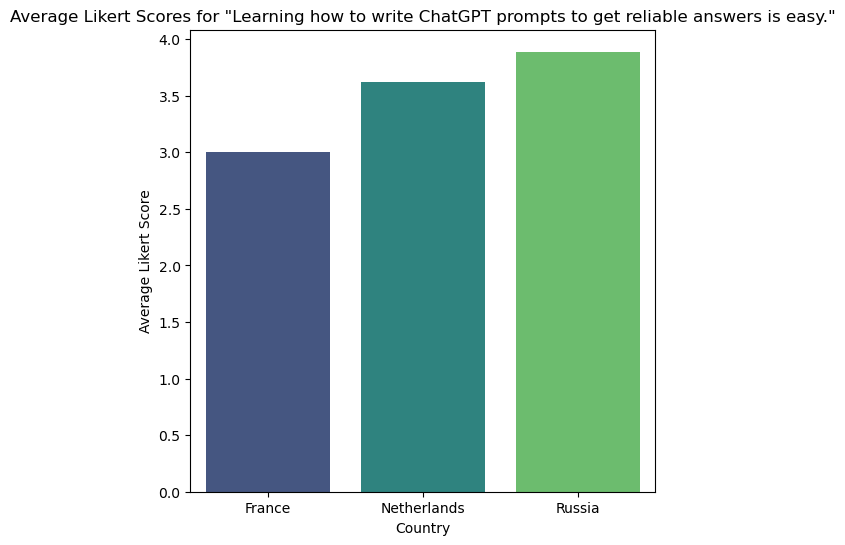

       Country  Likert_Score
0       France      3.000000
1  Netherlands      3.617647
2       Russia      3.888889


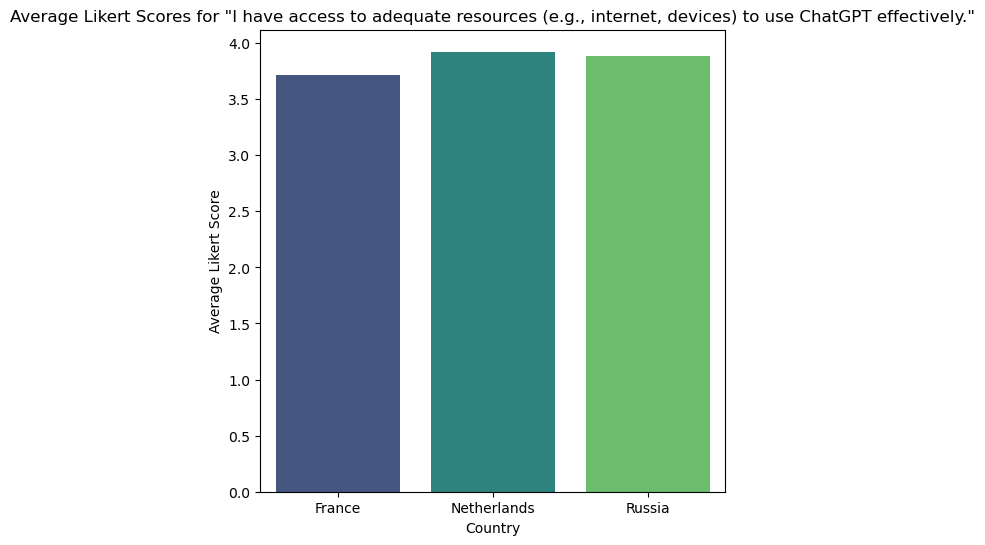

       Country  Likert_Score
0       France      3.714286
1  Netherlands      3.923077
2       Russia      3.888889


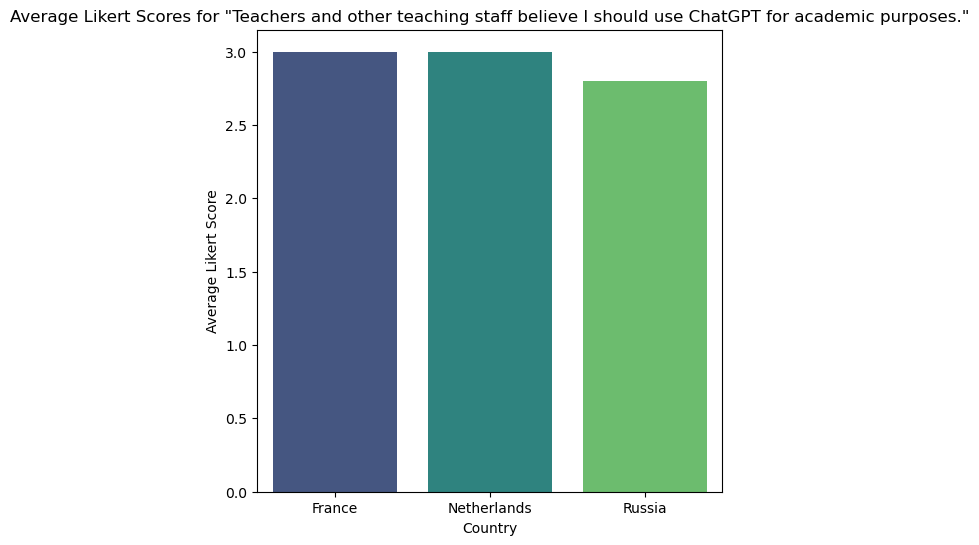

       Country  Likert_Score
0       France           3.0
1  Netherlands           3.0
2       Russia           2.8


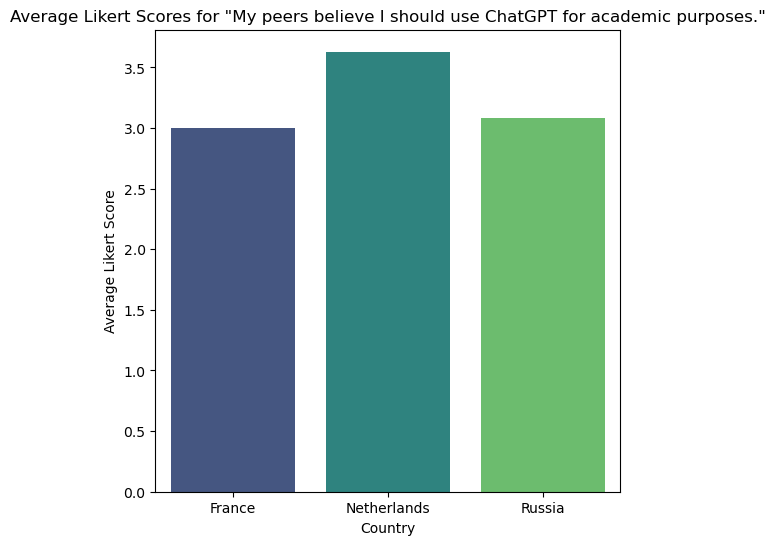

       Country  Likert_Score
0       France      3.000000
1  Netherlands      3.629630
2       Russia      3.083333


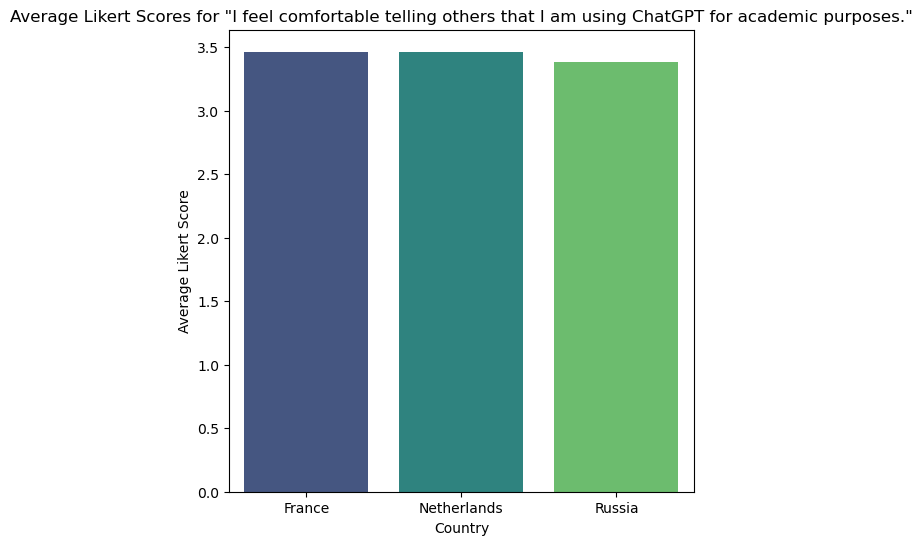

       Country  Likert_Score
0       France      3.461538
1  Netherlands      3.464286
2       Russia      3.384615


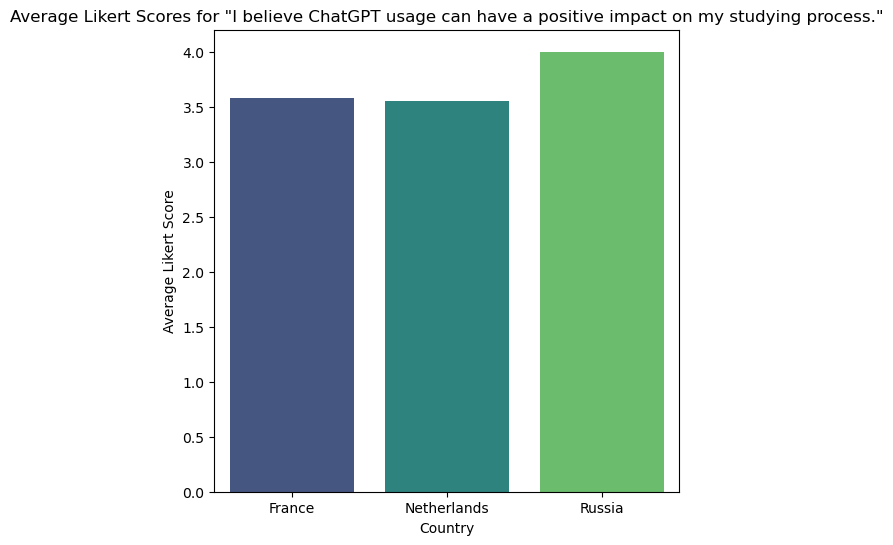

       Country  Likert_Score
0       France      3.583333
1  Netherlands      3.550000
2       Russia      4.000000


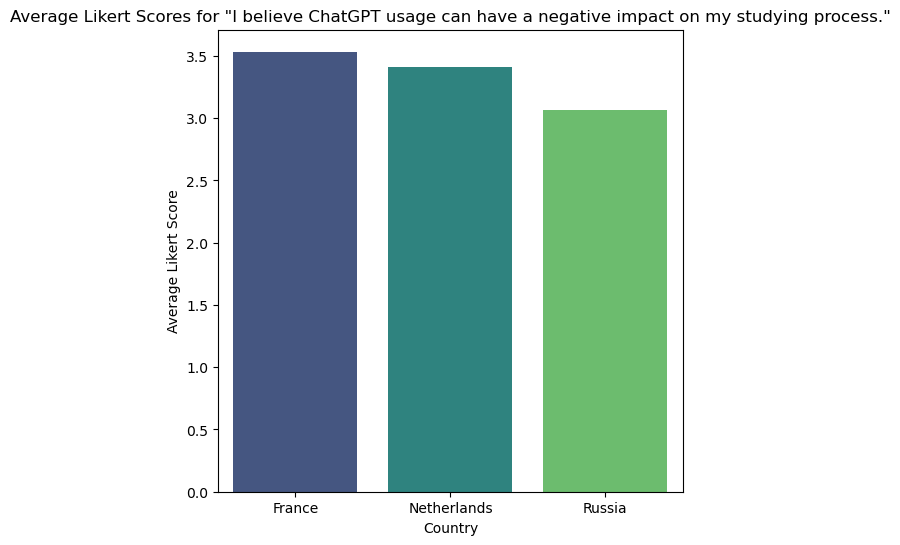

       Country  Likert_Score
0       France      3.533333
1  Netherlands      3.407407
2       Russia      3.066667


In [9]:
data['Country'] = data['In which country is the university where you are currently studying?'].map({'France, Metropolitan': 'France','Netherlands': 'Netherlands', 'Russia': 'Russia', 'France': 'France'})

for question in questions:
    data['Likert_Score'] = data[question].map(likert_scale)

    data_clean = data.dropna(subset=['Country', 'Likert_Score'])

    average_scores = data_clean.groupby('Country')['Likert_Score'].mean().reset_index()

    plt.figure(figsize=(6, 6))
    sns.barplot(x='Country', y='Likert_Score', data=average_scores, palette='viridis')
    plt.title(f'Average Likert Scores for "{question}"')
    plt.xlabel('Country')
    plt.ylabel('Average Likert Score')
    
    plt.show()
    print(average_scores)

Barplots of average likert scores depending on region

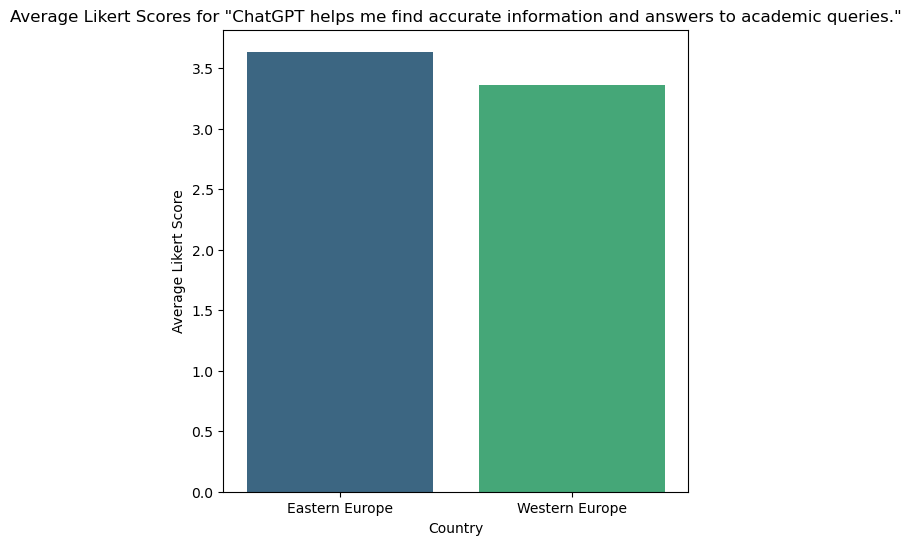

           Region  Likert_Score
0  Eastern Europe      3.636364
1  Western Europe      3.360000


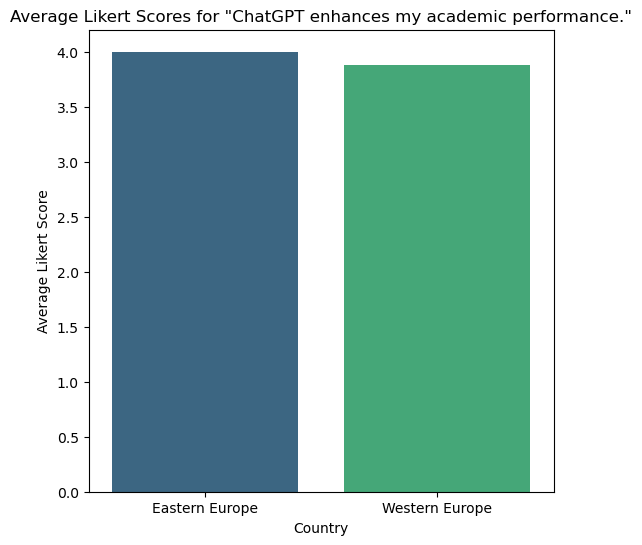

           Region  Likert_Score
0  Eastern Europe      4.000000
1  Western Europe      3.877551


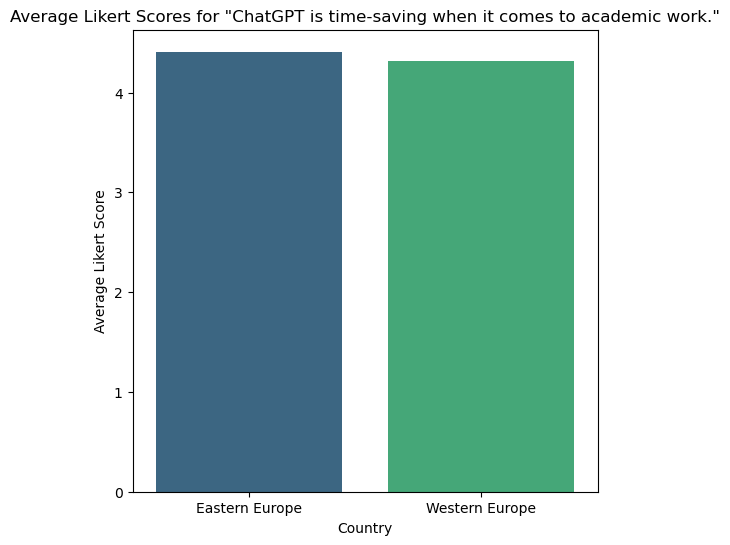

           Region  Likert_Score
0  Eastern Europe      4.409091
1  Western Europe      4.320000


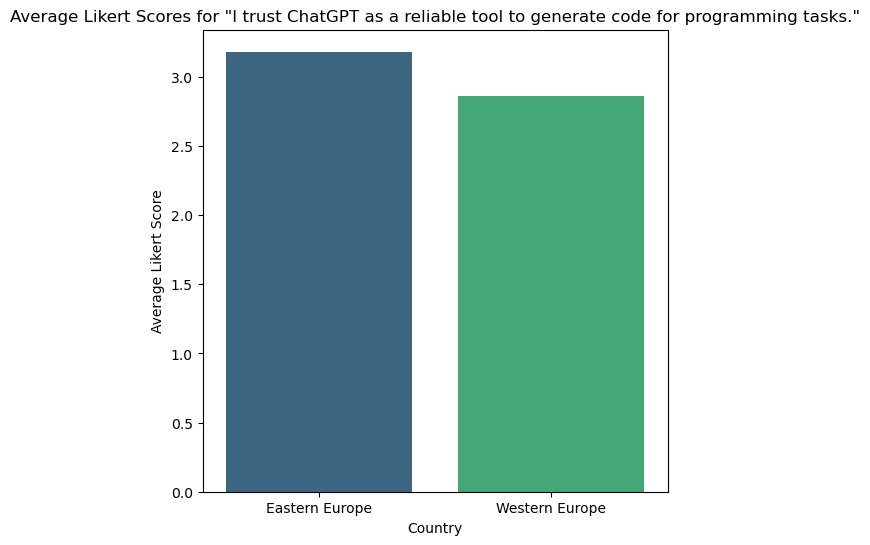

           Region  Likert_Score
0  Eastern Europe      3.181818
1  Western Europe      2.860000


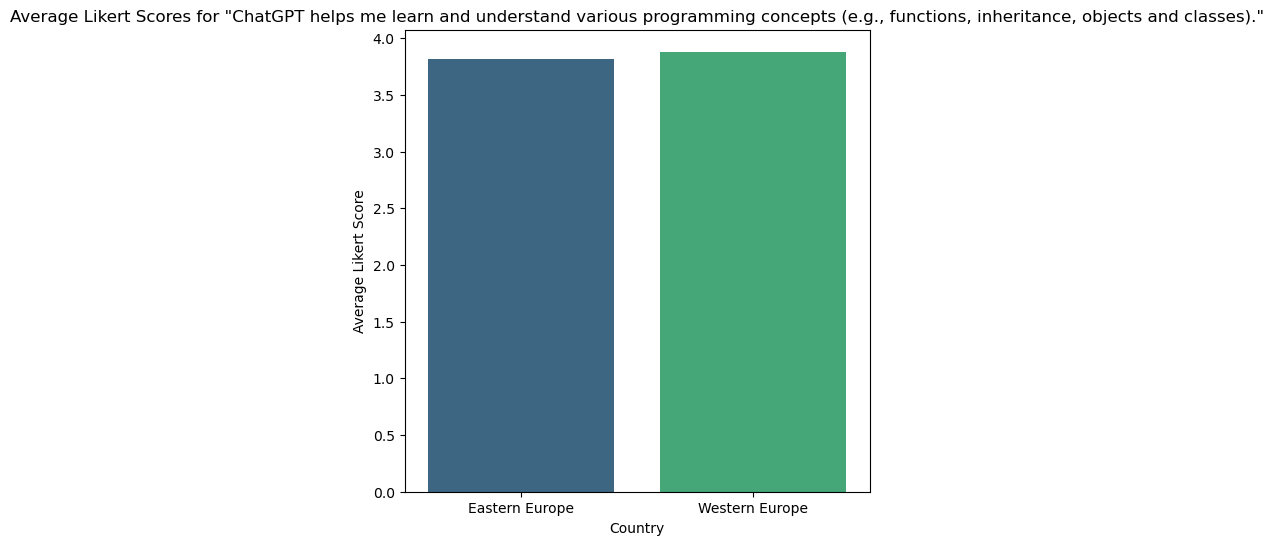

           Region  Likert_Score
0  Eastern Europe      3.818182
1  Western Europe      3.880000


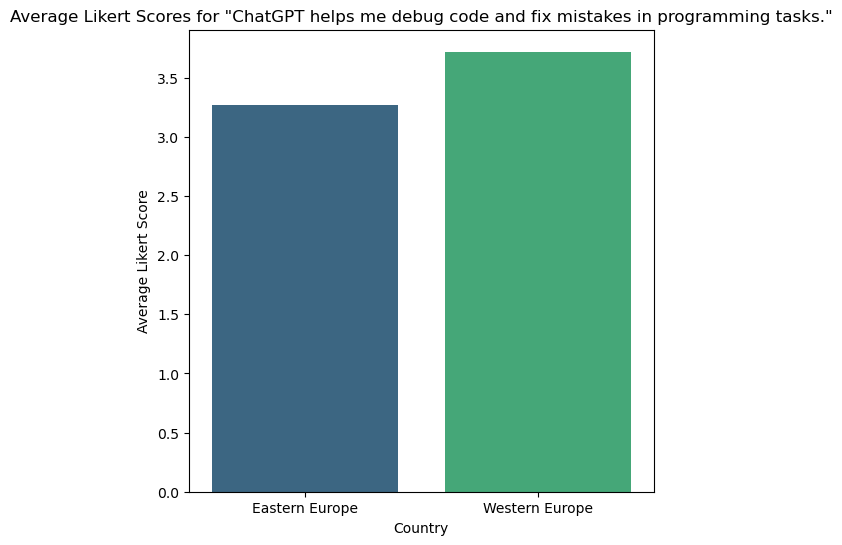

           Region  Likert_Score
0  Eastern Europe      3.272727
1  Western Europe      3.720000


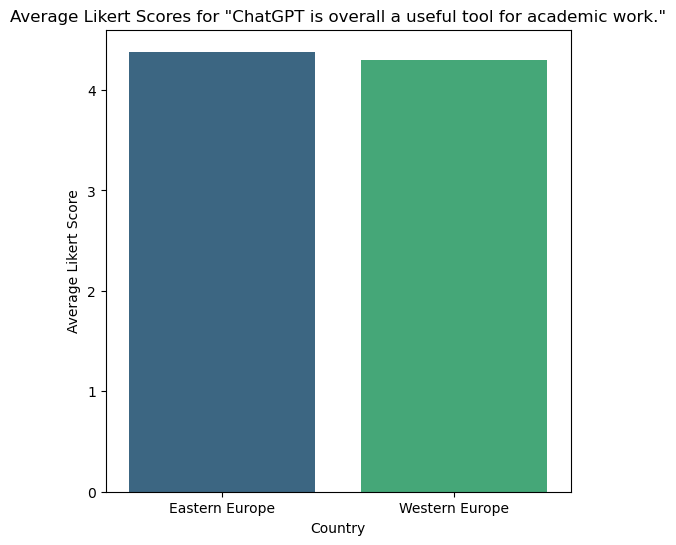

           Region  Likert_Score
0  Eastern Europe      4.380952
1  Western Europe      4.300000


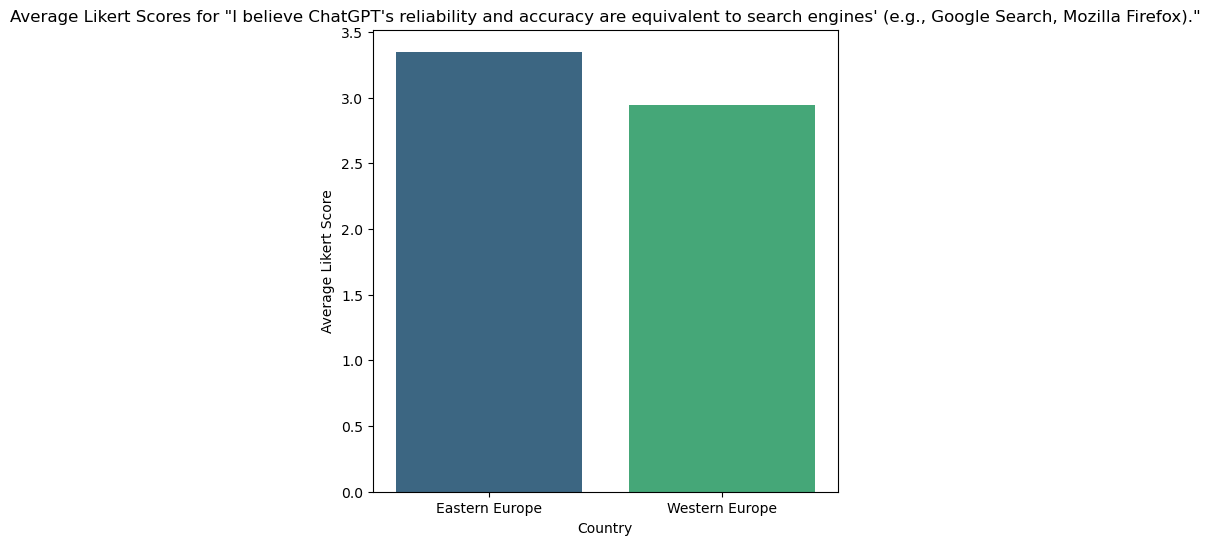

           Region  Likert_Score
0  Eastern Europe      3.350000
1  Western Europe      2.942857


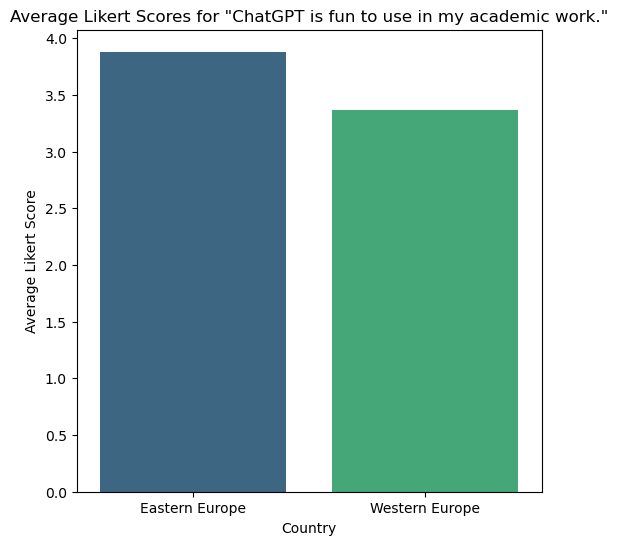

           Region  Likert_Score
0  Eastern Europe      3.882353
1  Western Europe      3.365854


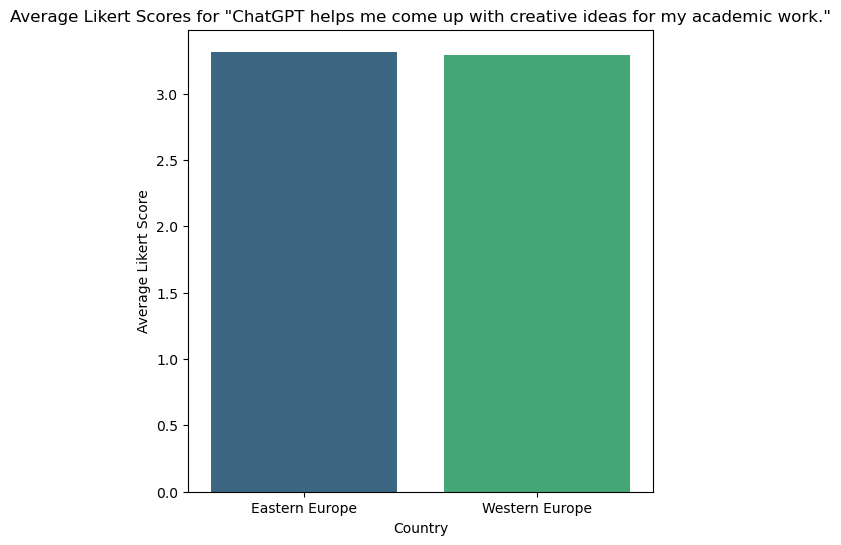

           Region  Likert_Score
0  Eastern Europe      3.315789
1  Western Europe      3.289474


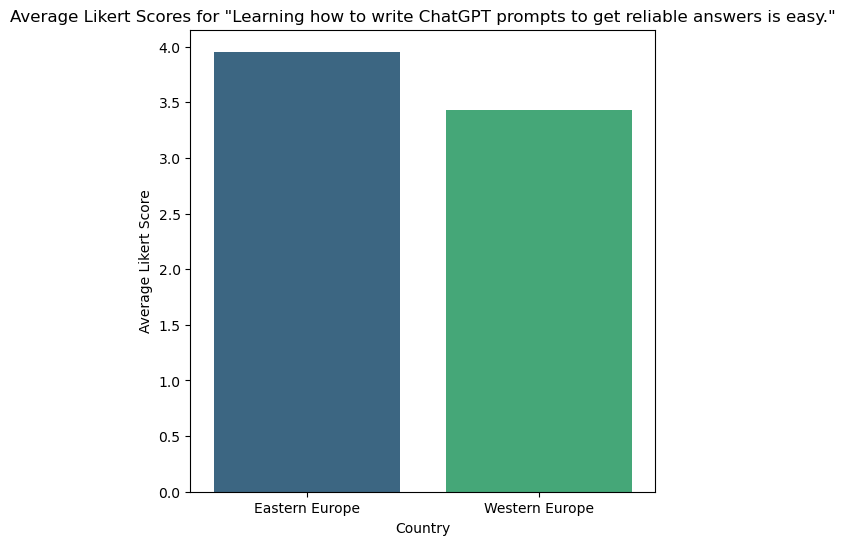

           Region  Likert_Score
0  Eastern Europe      3.954545
1  Western Europe      3.428571


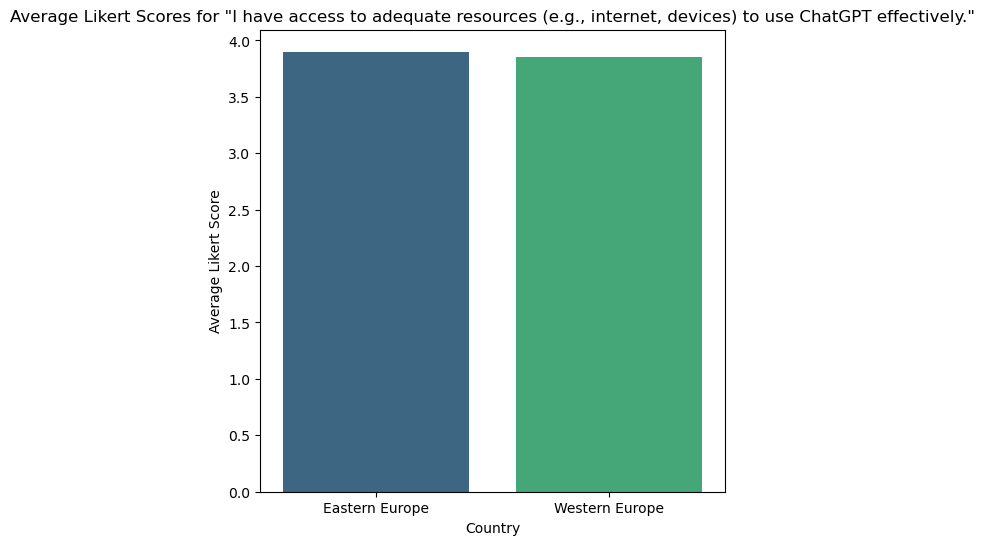

           Region  Likert_Score
0  Eastern Europe          3.90
1  Western Europe          3.85


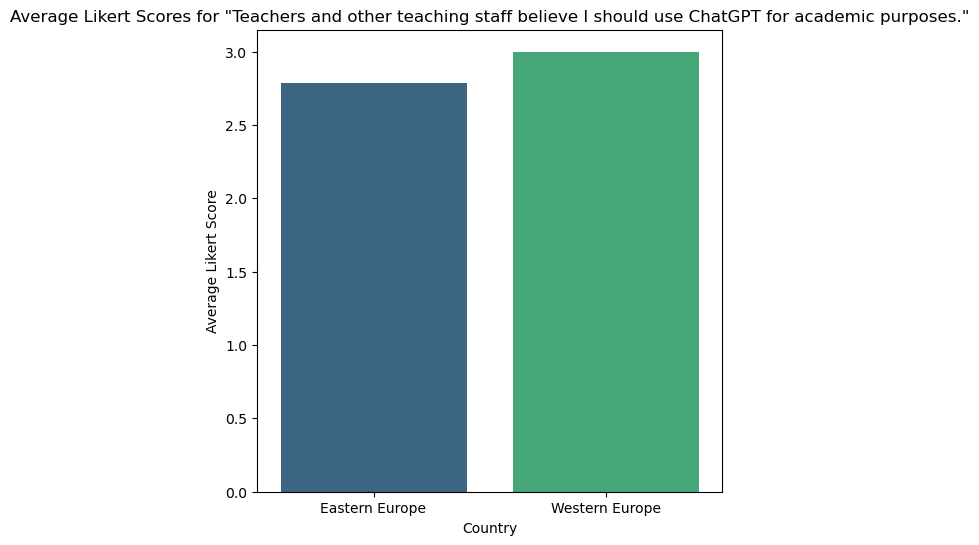

           Region  Likert_Score
0  Eastern Europe      2.789474
1  Western Europe      3.000000


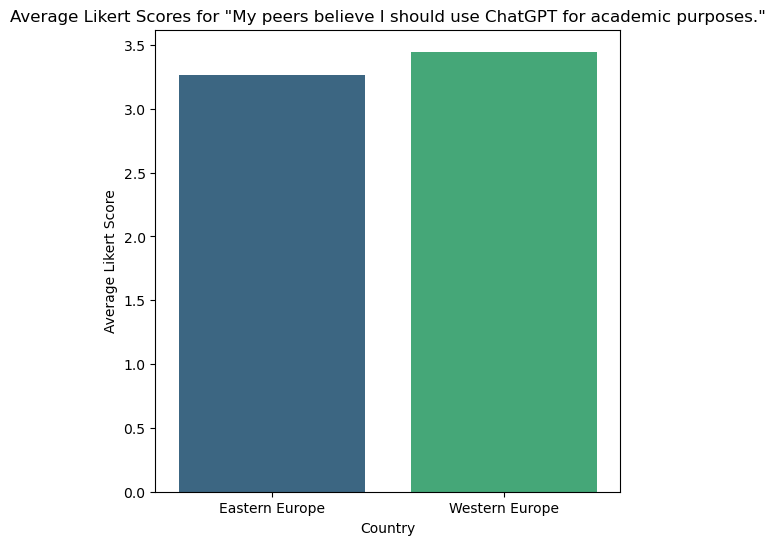

           Region  Likert_Score
0  Eastern Europe      3.266667
1  Western Europe      3.447368


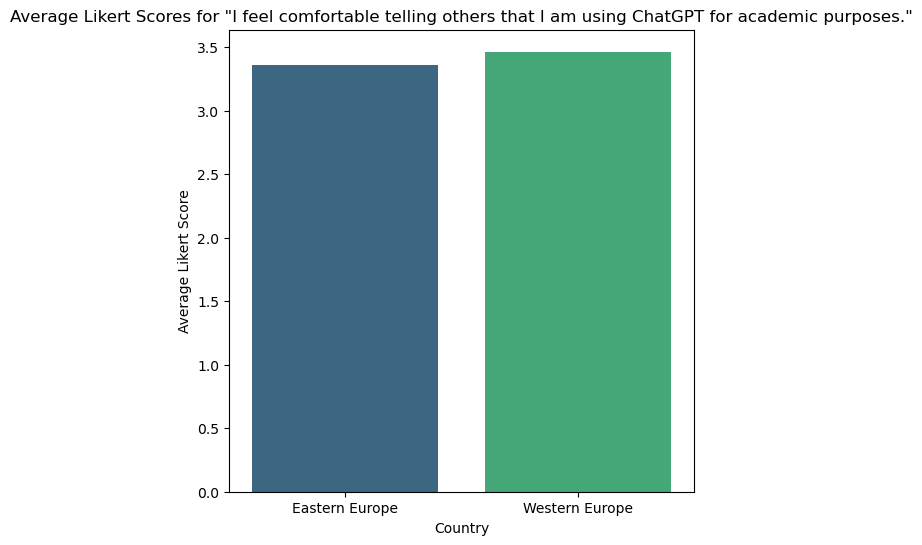

           Region  Likert_Score
0  Eastern Europe      3.357143
1  Western Europe      3.463415


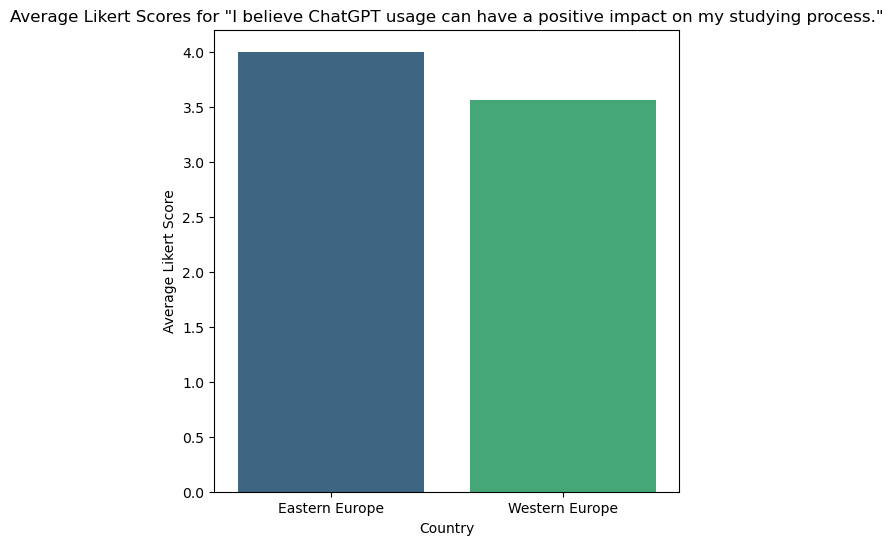

           Region  Likert_Score
0  Eastern Europe        4.0000
1  Western Europe        3.5625


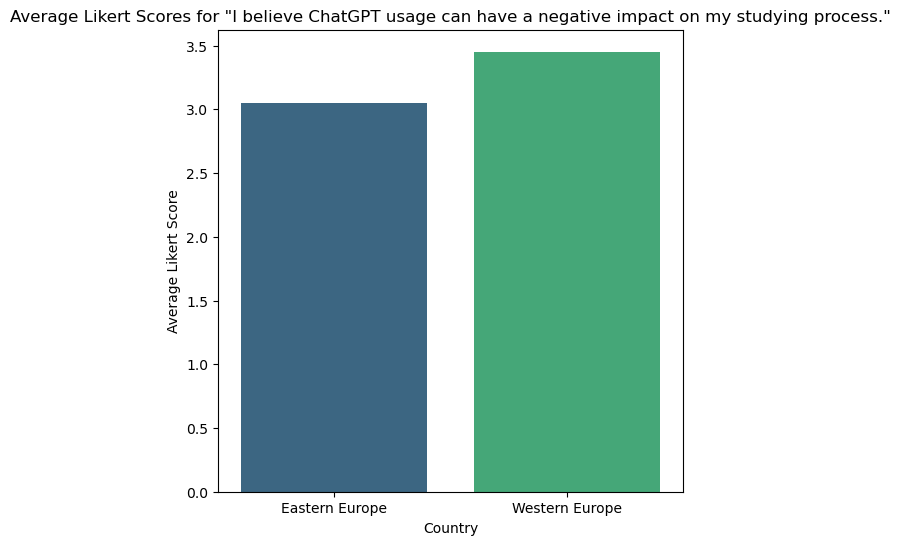

           Region  Likert_Score
0  Eastern Europe      3.052632
1  Western Europe      3.452381


In [10]:
data['Region'] = data['In which country is the university where you are currently studying?'].map({'Ukraine': 'Eastern Europe','Poland': 'Eastern Europe','Netherlands': 'Western Europe', 'Russia': 'Eastern Europe', 'France': 'Western Europe', 'France, Metropolitan': 'Western Europe'})

for question in questions:
    data['Likert_Score'] = data[question].map(likert_scale)

    data_clean = data.dropna(subset=['Region', 'Likert_Score'])

    average_scores = data_clean.groupby('Region')['Likert_Score'].mean().reset_index()

    plt.figure(figsize=(6, 6))
    sns.barplot(x='Region', y='Likert_Score', data=average_scores, palette='viridis')
    plt.title(f'Average Likert Scores for "{question}"')
    plt.xlabel('Country')
    plt.ylabel('Average Likert Score')

    plt.show()
    print(average_scores)

Barplots of average likert scores depending on frequency of usage and rewriting prompts frequency 

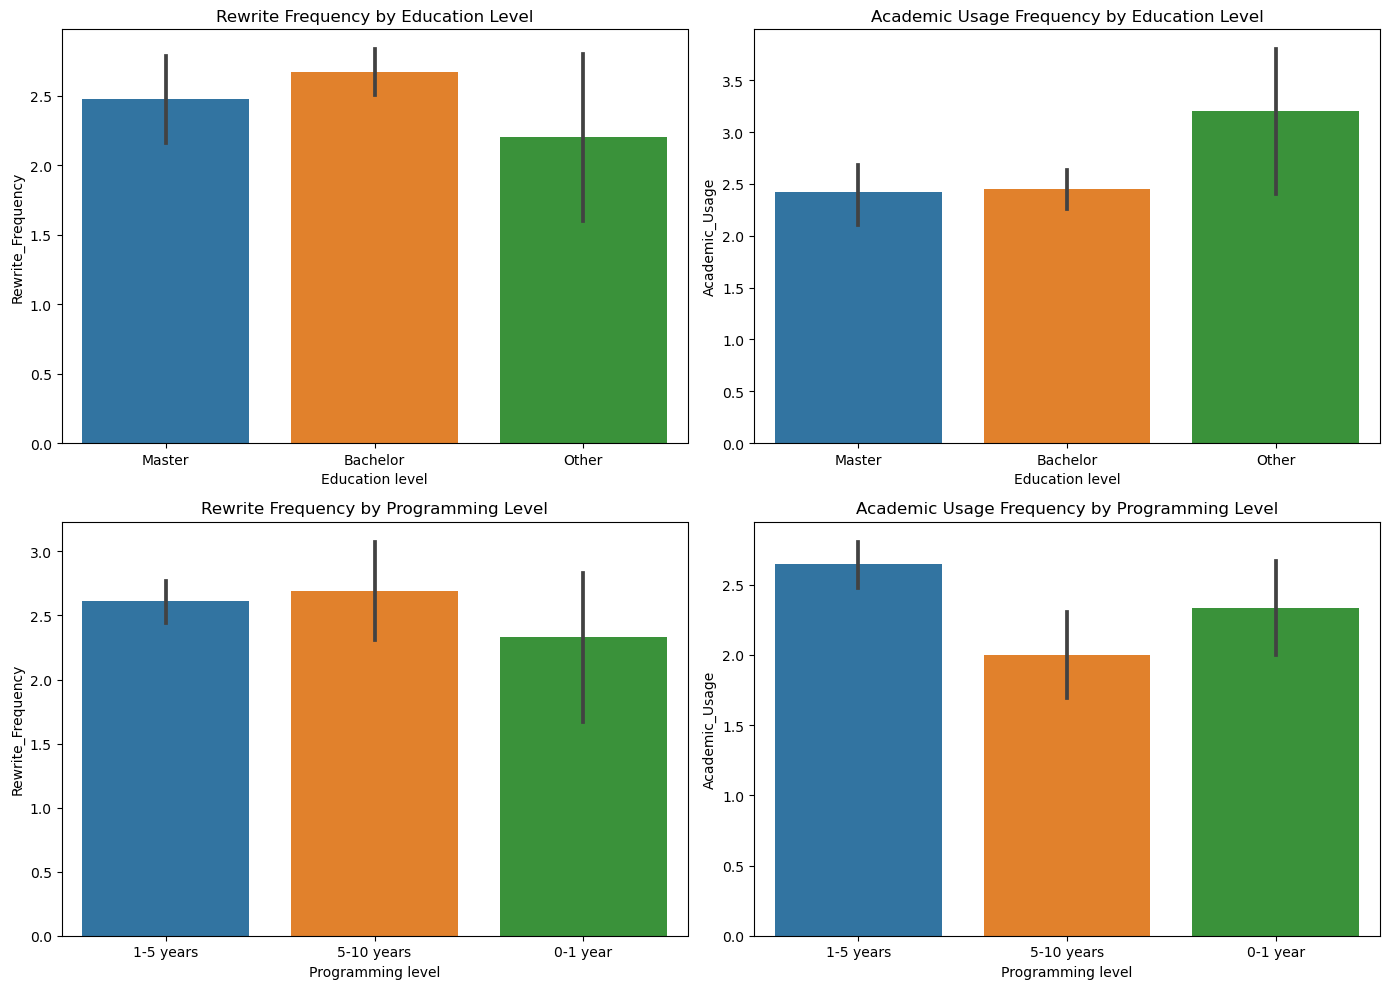

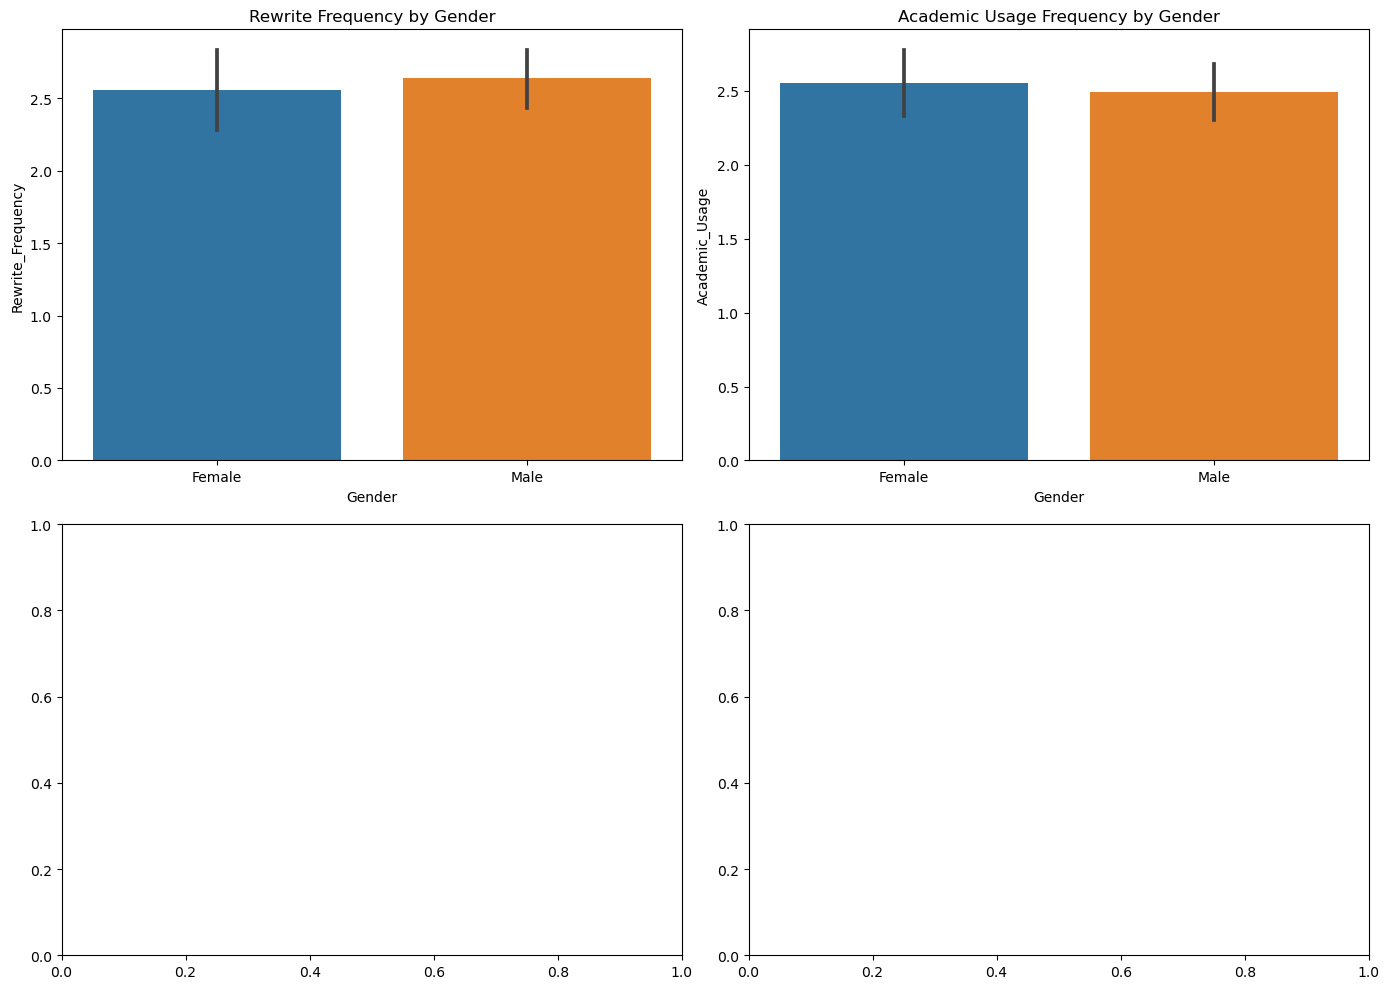

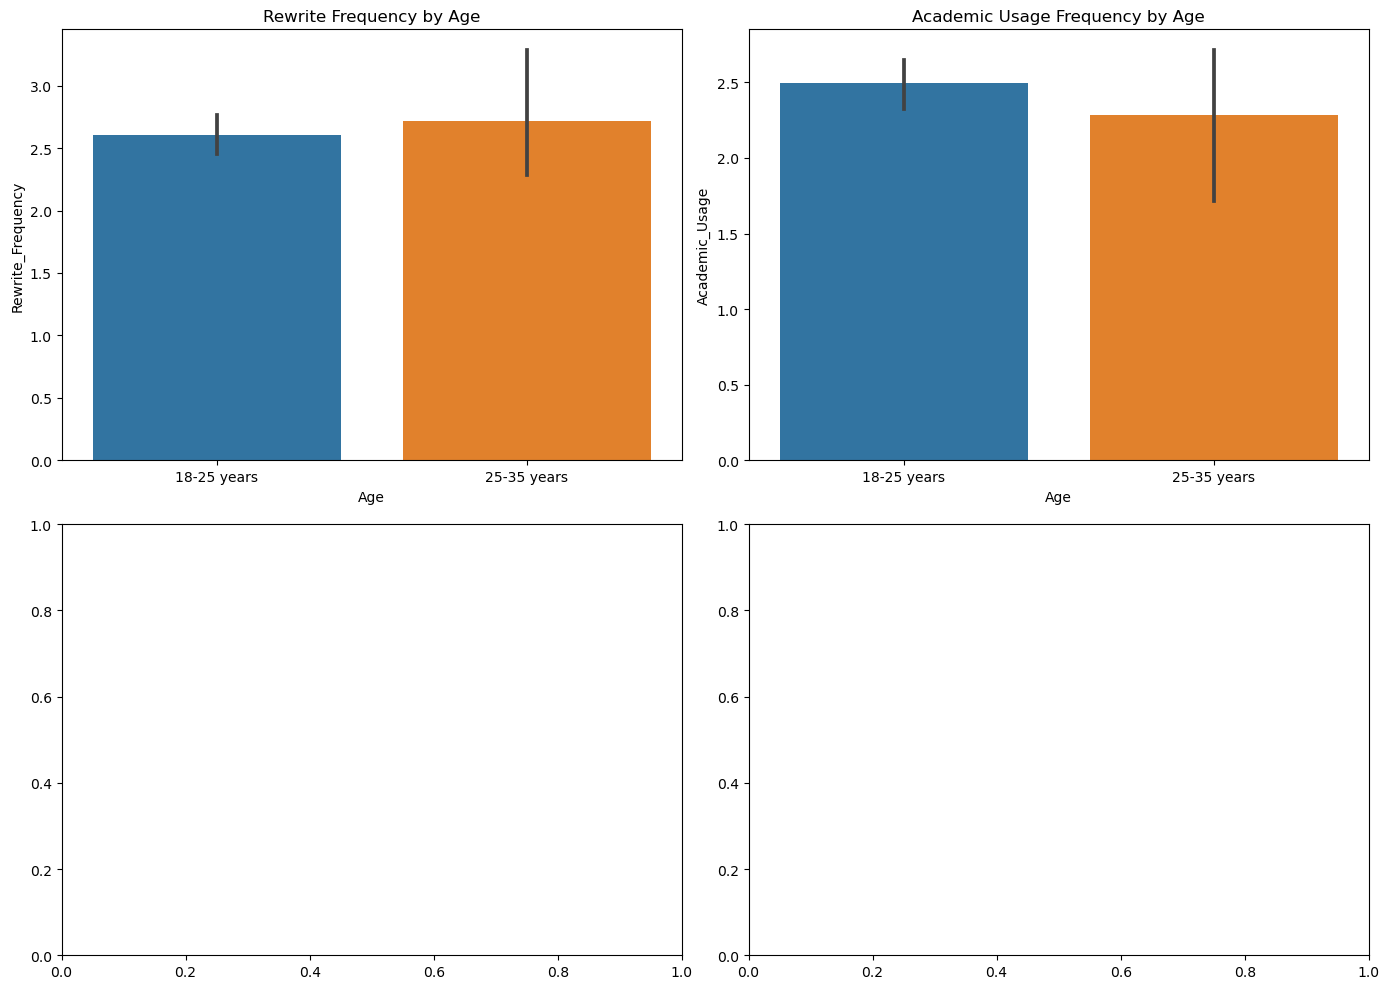

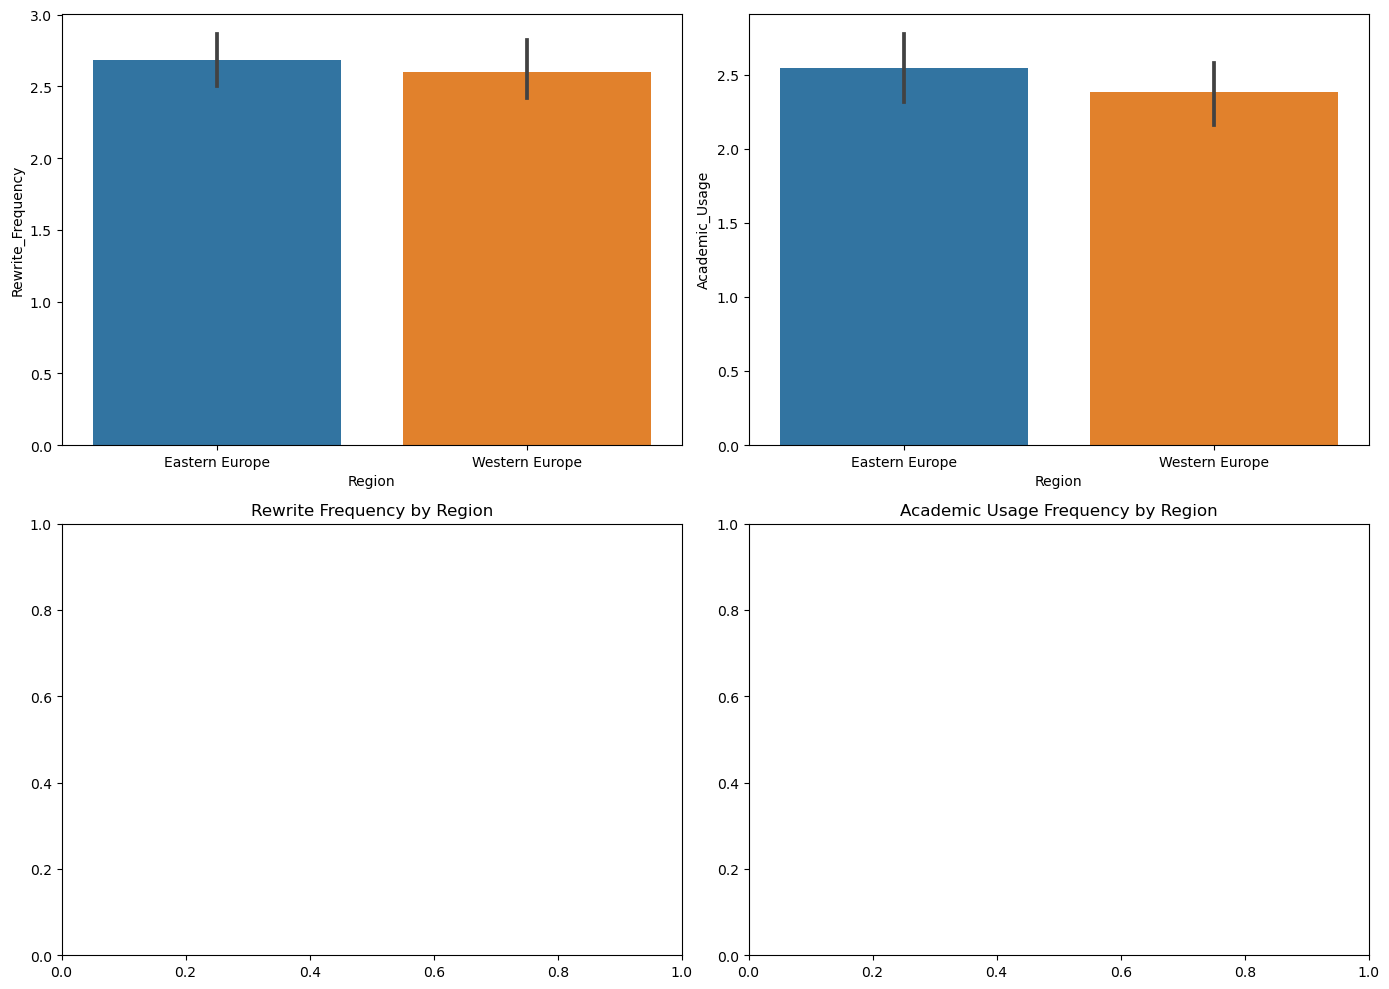

In [11]:

data['Gender'] = data['What is your gender?'].map({'Female': 'Female', 'Male': 'Male'})
data['Education level'] = data["What degree are you pursuing? "].map({'Bachelor': 'Bachelor', 'Master': 'Master', 'Other': 'Other'})
data['Programming level'] = data['What is your programming experience?'].map({'0-1 year': '0-1 year', '1-5 years': '1-5 years', '5-10 years': '5-10 years'})
data['Region'] = data['In which country is the university where you are currently studying?'].map({'Ukraine': 'Eastern Europe','Poland': 'Eastern Europe','Netherlands': 'Western Europe', 'Russia': 'Eastern Europe', 'France': 'Western Europe', 'France, Metropolitan': 'Western Europe'})
data['Rewrite_Frequency'] = data['How often do you need to rewrite ChatGPT prompts to get satisfactory results?'].map(likert_scale2)
data['Academic_Usage'] = data['How often do you use ChatGPT for academic purposes?'].map(likert_scale2)

# Plotting average Likert scores by demographics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot for Education level
sns.barplot(x='Education level', y='Rewrite_Frequency', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Rewrite Frequency by Education Level')

sns.barplot(x='Education level', y='Academic_Usage', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Academic Usage Frequency by Education Level')

# Bar plot for Programming level
sns.barplot(x='Programming level', y='Rewrite_Frequency', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Rewrite Frequency by Programming Level')

sns.barplot(x='Programming level', y='Academic_Usage', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Academic Usage Frequency by Programming Level')

# Adjust layout
plt.tight_layout()
plt.show()

# Plotting average Likert scores by demographics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot for Gender
sns.barplot(x='Gender', y='Rewrite_Frequency', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Rewrite Frequency by Gender')

sns.barplot(x='Gender', y='Academic_Usage', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Academic Usage Frequency by Gender')

# Adjust layout
plt.tight_layout()
plt.show()

# Plotting average Likert scores by demographics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# Bar plot for Age
sns.barplot(x='Age', y='Rewrite_Frequency', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Rewrite Frequency by Age')

sns.barplot(x='Age', y='Academic_Usage', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Academic Usage Frequency by Age')

# Adjust layout
plt.tight_layout()
plt.show()

# Plotting average Likert scores by demographics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# Bar plot for Age
sns.barplot(x='Region', y='Rewrite_Frequency', data=data, ax=axes[0, 0])
axes[1, 0].set_title('Rewrite Frequency by Region')

sns.barplot(x='Region', y='Academic_Usage', data=data, ax=axes[0, 1])
axes[1, 1].set_title('Academic Usage Frequency by Region')

# Adjust layout
plt.tight_layout()
plt.show()

Barplots of average likert scores depending on version of chatgpt used

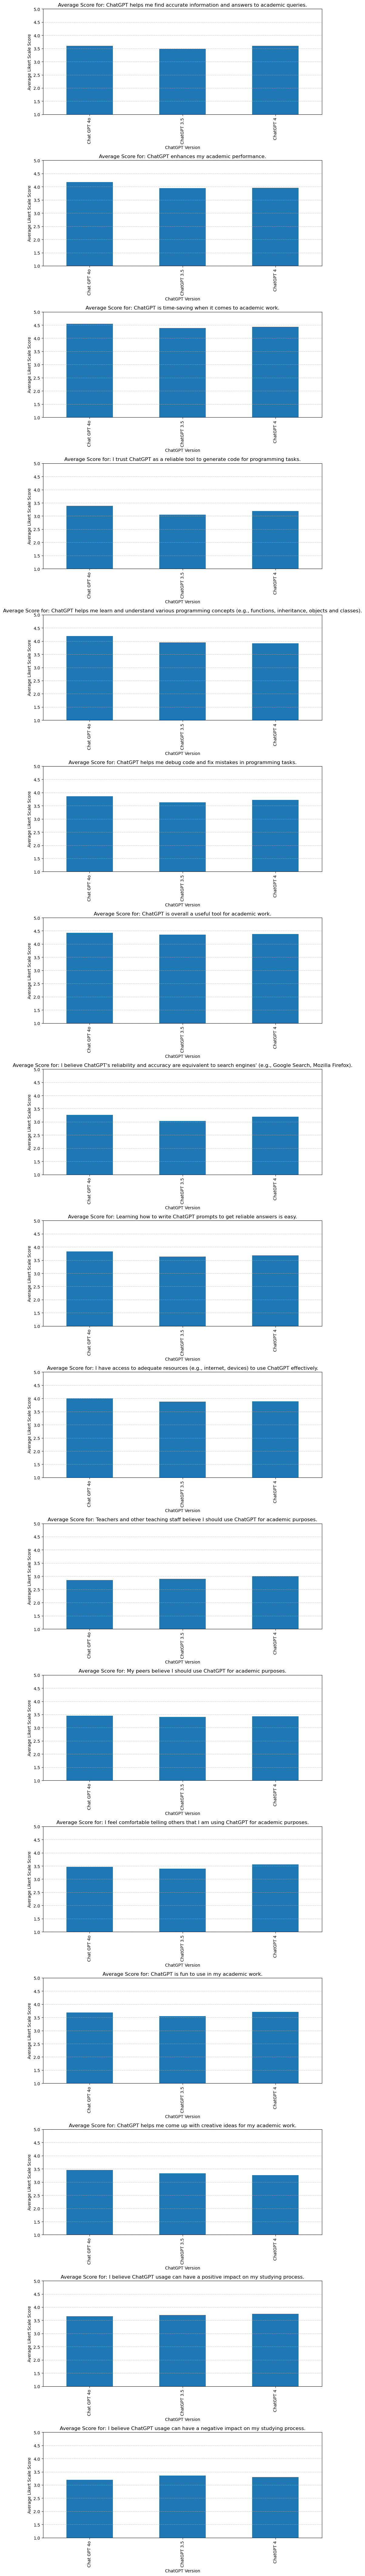

In [12]:
# Explode the versions column
# Apply the Likert scale mapping
for col in question5:
    if col in data.columns:
        data[col] = data[col].map(likert_scale)
    else:
        print(f"Column {col} not found in data")

# Explode the versions column
data['Which version(s) of ChatGPT have you used?'] = data['Which version(s) of ChatGPT have you used?'].str.split(';')
data = data.explode('Which version(s) of ChatGPT have you used?')

# Convert to DataFrame
summary = pd.DataFrame(summary_data)
summary.set_index('Which version(s) of ChatGPT have you used?', inplace=True)

# Plotting bar plots
num_questions = len(summary.columns)
fig, axes = plt.subplots(num_questions, 1, figsize=(10, 5 * num_questions))

for i, question in enumerate(summary.columns):
    ax = axes[i] if num_questions > 1 else axes
    summary[question].plot(kind='bar', ax=ax)
    ax.set_title(f'Average Score for: {question}')
    ax.set_ylabel('Average Likert Scale Score')
    ax.set_xlabel('ChatGPT Version')
    ax.set_ylim(1, 5)  # Assuming Likert scale ranges from 1 to 5
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Thematic analysis

Most common words:
[('concepts', 28), ('information', 27), ('tasks', 20), ('learning', 20), ('helps', 18), ('explain', 17), ('using', 15), ('understanding', 15), ('ideas', 13), ('something', 13), ('provide', 13), ('process', 12), ('gives', 11), ('quickly', 11), ('resources', 11), ('things', 11), ('faster', 11), ('questions', 10), ('provides', 10), ('helping', 10), ('understand', 10), ('debug', 10), ('providing', 10), ('projects', 9), ('explains', 9), ('impact', 9), ('science', 9)]


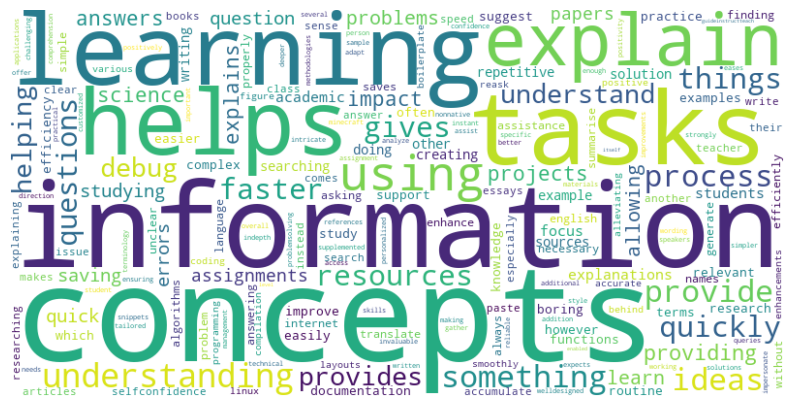

In [13]:

# Extract responses from the open-ended question
responses = data['Please specify in which way ChatGPT usage can have a positive impact on your studying process:']

# Join all responses into a single string
all_responses = ' '.join(responses.dropna())

# Clean the text
cleaned_text = re.sub(r'[^\w\s]', '', all_responses)  # Remove punctuation
cleaned_text = cleaned_text.lower()  # Convert to lowercase

# split into words
tokens = cleaned_text.split()

# Filter out words less than or equal to 4 letters long
tokens = [word for word in tokens if len(word) > 4]

stopwords = set(['the', 'and', 'to', 'when','some','with','more','that','yours','chatgpt'])

tokens = [word for word in tokens if word not in stopwords]

word_counts = Counter(tokens)

print("Most common words:")
print(word_counts.most_common(27))

# Create a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Find frequencies for each category

Category counts:
Counter({'Task Assistance': 99, 'Information & Explanation': 94, 'Concepts & Learning': 87})


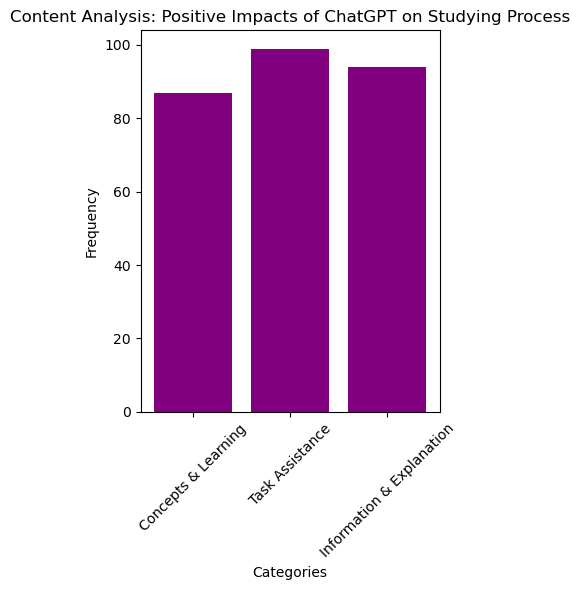

In [14]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

cleaned_text = preprocess_text(all_responses)

# Define categories based on common themes observed in most common words
categories = {
    'Concepts & Learning': ['concepts', 'learning', 'ideas', 'learn', 'understanding','understand'],
    'Information & Explanation': ['information', 'explain', 'provide', 'answers','understand', 'understanding'],
    'Task Assistance': ['tasks', 'helps', 'debug', 'faster', 'quickly', 'saves', 'saving', 'process','helping']
}

def categorize_response(response, categories):
    category_counts = Counter()
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in response:
                category_counts[category] += 1
    return category_counts

# Apply categorization to each response
all_category_counts = Counter()
for response in responses.dropna():
    category_counts = categorize_response(response, categories)
    all_category_counts += category_counts

print("Category counts:")
print(all_category_counts)

plt.figure(figsize=(4, 6))
plt.bar(all_category_counts.keys(), all_category_counts.values(), color = 'purple')
plt.title('Content Analysis: Positive Impacts of ChatGPT on Studying Process')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Find most frequent combinations of words

In [15]:
# clean and tokenize text
def clean_and_tokenize(text):
    # Convert to lowercase and remove non-alphanumeric characters except spaces
    text = str(text)
    words = re.findall(r'\b(?!chatgpt)\w{5,}\b', text.lower())
    # Join the words into a single string
    text = ' '.join(words)
    # Tokenize by splitting on spaces
    tokens = text.split()
    return tokens

def analyze_responses(responses):
    # Initialize a Counter for combinations
    combination_counter = Counter()
    
    # Iterate over each response
    for response in responses:
        # Clean and tokenize the response
        tokens = clean_and_tokenize(response)
        
        # Generate combinations of length 2 or more
        for length in range(2, len(tokens) + 1):
            for i in range(len(tokens) - length + 1):
                combination = tuple(tokens[i:i+length])
                combination_counter[combination] += 1
    
    # Get top 20 most common combinations
    most_common = combination_counter.most_common(20) 
    
    for combination, count in most_common:
        print(f"Combination: {' '.join(combination)}, Count: {count}")

# Analyze responses
analyze_responses(responses)

Combination: understand concepts, Count: 7
Combination: concepts explain, Count: 7
Combination: explains concepts, Count: 6
Combination: repetitive tasks, Count: 6
Combination: learning process, Count: 6
Combination: assignments projects, Count: 6
Combination: practice problems, Count: 6
Combination: quick answers, Count: 5
Combination: provide examples, Count: 4
Combination: explain things, Count: 4
Combination: accumulate information, Count: 4
Combination: writing essays, Count: 3
Combination: essays easily, Count: 3
Combination: easily smoothly, Count: 3
Combination: smoothly helps, Count: 3
Combination: helps layouts, Count: 3
Combination: layouts coding, Count: 3
Combination: coding tasks, Count: 3
Combination: tasks gives, Count: 3
Combination: gives ideas, Count: 3


Perform T-tests on all results

In [16]:
data = pd.read_csv('data.csv')
data['Gender'] = data['What is your gender?'].map({'Female': 'Female', 'Male': 'Male'})

# Function to perform t-test for two independent groups (Gender)
def perform_ttest(data, question):
    # Map the Likert scale responses to numeric values
    data['Likert_Score'] = data[question].map(likert_scale)
    
    # Drop rows with NaN values in 'Gender' or 'Likert_Score'
    data_clean = data.dropna(subset=['Gender', 'Likert_Score'])
    
    # Separate data by gender
    scores_female = data_clean[data_clean['Gender'] == 'Female']['Likert_Score']
    scores_male = data_clean[data_clean['Gender'] == 'Male']['Likert_Score']
    
    # Perform independent t-test
    t_statistic, p_value = stats.ttest_ind(scores_female, scores_male)
    
    return t_statistic, p_value

# Loop through each question and perform t-test
for question in questions:
    t_stat, p_val = perform_ttest(data, question)
    print(f"T-test results for '{question}':")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    alpha = 0.05
    if p_val < alpha:
        print("Result is statistically significant; reject null hypothesis.")
    else:
        print("Result is not statistically significant; fail to reject null hypothesis.")
    print("\n")
    

T-test results for 'ChatGPT helps me find accurate information and answers to academic queries.':
T-statistic: 0.559879194748627
P-value: 0.5773749869479101
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT enhances my academic performance.':
T-statistic: -0.37022689228560185
P-value: 0.7123474831672449
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT is time-saving when it comes to academic work.':
T-statistic: 0.7756126230399777
P-value: 0.4406280235647525
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'I trust ChatGPT as a reliable tool to generate code for programming tasks.':
T-statistic: 0.18962149233156878
P-value: 0.8501624560473572
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, obje

In [17]:
data['Education level'] = data["What degree are you pursuing? "].map({'Bachelor': 'Bachelor', 'Master': 'Master'})

def perform_ttest(data, question):
    data['Likert_Score'] = data[question].map(likert_scale)
    data_clean = data.dropna(subset=['Education level', 'Likert_Score'])
    scores_female = data_clean[data_clean['Education level'] == 'Bachelor']['Likert_Score']
    scores_male = data_clean[data_clean['Education level'] == 'Master']['Likert_Score']
    
    t_statistic, p_value = stats.ttest_ind(scores_female, scores_male)
    
    return t_statistic, p_value

# Loop through each question and perform t-test
for question in questions:
    t_stat, p_val = perform_ttest(data, question)
    print(f"T-test results for '{question}':")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    alpha = 0.05
    if p_val < alpha:
        print("Result is statistically significant; reject null hypothesis.")
    else:
        print("Result is not statistically significant; fail to reject null hypothesis.")
    print("\n")
    

T-test results for 'ChatGPT helps me find accurate information and answers to academic queries.':
T-statistic: -0.07274758342793392
P-value: 0.9422086980731141
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT enhances my academic performance.':
T-statistic: 1.0584920452093252
P-value: 0.2934191270066147
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT is time-saving when it comes to academic work.':
T-statistic: -0.10379174060549926
P-value: 0.9176231912959496
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'I trust ChatGPT as a reliable tool to generate code for programming tasks.':
T-statistic: -0.7828667351215016
P-value: 0.4362727908731875
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, o

In [18]:
data['Region'] = data['In which country is the university where you are currently studying?'].map({'Ukraine': 'Eastern Europe','Poland': 'Eastern Europe','Netherlands': 'Western Europe', 'Russia': 'Eastern Europe', 'France': 'Western Europe', 'France, Metropolitan': 'Western Europe'})

def perform_ttest(data, question):
    data['Likert_Score'] = data[question].map(likert_scale)
    data_clean = data.dropna(subset=['Region', 'Likert_Score'])
    scores_female = data_clean[data_clean['Region'] == 'Eastern Europe']['Likert_Score']
    scores_male = data_clean[data_clean['Region'] == 'Western Europe']['Likert_Score']
    t_statistic, p_value = stats.ttest_ind(scores_female, scores_male)
    
    return t_statistic, p_value

# Loop through each question and perform t-test
for question in questions:
    t_stat, p_val = perform_ttest(data, question)
    print(f"T-test results for '{question}':")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    alpha = 0.05
    if p_val < alpha:
        print("Result is statistically significant; reject null hypothesis.")
    else:
        print("Result is not statistically significant; fail to reject null hypothesis.")
    print("\n")
    

T-test results for 'ChatGPT helps me find accurate information and answers to academic queries.':
T-statistic: 1.1243644015260714
P-value: 0.2646993544737768
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT enhances my academic performance.':
T-statistic: 0.4762138727259288
P-value: 0.6354265060810107
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT is time-saving when it comes to academic work.':
T-statistic: 0.4286472709172145
P-value: 0.6694961436800049
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'I trust ChatGPT as a reliable tool to generate code for programming tasks.':
T-statistic: 1.1395508005107273
P-value: 0.2583579520154148
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, object

/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [19]:
data['Age'] = data['What is your age?'].map({'18-25 years': '18-25 years', '25-35 years': '25-35 years'})


def perform_ttest(data, question):
    data['Likert_Score'] = data[question].map(likert_scale)
    data_clean = data.dropna(subset=['Age', 'Likert_Score'])
    scores_female = data_clean[data_clean['Age'] == '18-25 years']['Likert_Score']
    scores_male = data_clean[data_clean['Age'] == '25-35 years']['Likert_Score']
    t_statistic, p_value = stats.ttest_ind(scores_female, scores_male)
    
    return t_statistic, p_value

for question in questions:
    t_stat, p_val = perform_ttest(data, question)
    print(f"T-test results for '{question}':")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    alpha = 0.05
    if p_val < alpha:
        print("Result is statistically significant; reject null hypothesis.")
    else:
        print("Result is not statistically significant; fail to reject null hypothesis.")
    print("\n")
    

T-test results for 'ChatGPT helps me find accurate information and answers to academic queries.':
T-statistic: 0.09433588303919506
P-value: 0.9250906185375247
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT enhances my academic performance.':
T-statistic: 1.5007277750011105
P-value: 0.1376243052640364
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT is time-saving when it comes to academic work.':
T-statistic: 1.3516371839081227
P-value: 0.18050075017709277
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'I trust ChatGPT as a reliable tool to generate code for programming tasks.':
T-statistic: 0.42531678860918565
P-value: 0.6718076572495902
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, obj

/Users/bzzikushka/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [20]:
# Example for Education Level (assuming data_clean is already defined)
data['Programming level'] = data['What is your programming experience?'].map({'0-1 year': '0-1 year', '1-5 years': '1-5 years', '5-10 years': '5-10 years'})


def perform_ttest(data, question):
    data['Likert_Score'] = data[question].map(likert_scale)
    data_clean = data.dropna(subset=['Programming level', 'Likert_Score'])
    scores_female = data_clean[data_clean['Programming level'] == '5-10 years']['Likert_Score']
    scores_male = data_clean[data_clean['Programming level'] == '1-5 years']['Likert_Score']
    t_statistic, p_value = stats.ttest_ind(scores_female, scores_male)
    
    return t_statistic, p_value

for question in questions:
    t_stat, p_val = perform_ttest(data, question)
    print(f"T-test results for '{question}':")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")
    alpha = 0.05
    if p_val < alpha:
        print("Result is statistically significant; reject null hypothesis.")
    else:
        print("Result is not statistically significant; fail to reject null hypothesis.")
    print("\n")
    

T-test results for 'ChatGPT helps me find accurate information and answers to academic queries.':
T-statistic: -1.4775118185898093
P-value: 0.14415531945683427
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT enhances my academic performance.':
T-statistic: -2.6073701770236535
P-value: 0.01123725334119081
Result is statistically significant; reject null hypothesis.


T-test results for 'ChatGPT is time-saving when it comes to academic work.':
T-statistic: -1.805771447251954
P-value: 0.07538006892402348
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'I trust ChatGPT as a reliable tool to generate code for programming tasks.':
T-statistic: -0.37759852378060244
P-value: 0.7069048889978814
Result is not statistically significant; fail to reject null hypothesis.


T-test results for 'ChatGPT helps me learn and understand various programming concepts (e.g., functions, inheritance, objects and